In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import polars as pl
import warnings
import os

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set(style="whitegrid")
%matplotlib inline

## Data Preview

In [2]:
train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')
data_dictionary = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv')

In [3]:
print(f"Train shape: {train.shape}")
train.head()

Train shape: (3960, 82)


id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT-PCIAT_20  \
0             50.8  ...             4.0             2.0             4.0   
1             46.0  ...             0.0             0.0             0.0   
2             75.6  ...             2.0             1.0             1.0   
3             81.6  ...             3.0             4.0             1.0   
4              NaN  ...             NaN             NaN             NaN   

   PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
0               55.0        NaN                NaN              NaN   
1                0.0       Fall               46.0             64.0   
2               28.0       Fall               38.0             54.0   
3               44.0     Summer               31.0             45.0   
4                NaN        NaN                NaN              NaN   

   PreInt_EduHx-Season PreInt_EduHx-computerinternet_hoursday  sii  
0                 Fall                                    3.0  2.0  
1               Summer                                    0.0  0.0  
2               Summer                                    2.0  0.0  
3               Winter                                    0.0  1.0  
4                  NaN                                    NaN  NaN  

[5 rows x 82 columns]

In [4]:
print(f"Test shape: {test.shape}")
test.head()

Test shape: (20, 59)


id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  BIA-BIA_TBW  PAQ_A-Season  PAQ_A-PAQ_A_Total  \
0             50.8  ...      32.6909           NaN                NaN   
1             46.0  ...      27.0552           NaN                NaN   
2             75.6  ...          NaN           NaN                NaN   
3             81.6  ...      45.9966           NaN                NaN   
4              NaN  ...          NaN        Summer               1.04   

   PAQ_C-Season PAQ_C-PAQ_C_Total  SDS-Season  SDS-SDS_Total_Raw  \
0           NaN               NaN         NaN                NaN   
1          Fall             2.340        Fall               46.0   
2        Summer             2.170        Fall               38.0   
3        Winter             2.451      Summer               31.0   
4           NaN               NaN         NaN                NaN   

   SDS-SDS_Total_T PreInt_EduHx-Season  PreInt_EduHx-computerinternet_hoursday  
0              NaN                Fall                                     3.0  
1             64.0              Summer                                     0.0  
2             54.0              Summer                                     2.0  
3             45.0              Winter                                     0.0  
4              NaN                 NaN                                     NaN  

[5 rows x 59 columns]

In [5]:
data_dictionary

Instrument  \
0                           Identifier   
1                         Demographics   
2                         Demographics   
3                         Demographics   
4   Children's Global Assessment Scale   
..                                 ...   
76             Sleep Disturbance Scale   
77             Sleep Disturbance Scale   
78             Sleep Disturbance Scale   
79                        Internet Use   
80                        Internet Use   

                                     Field                       Description  \
0                                       id                  Participant's ID   
1                Basic_Demos-Enroll_Season              Season of enrollment   
2                          Basic_Demos-Age                Age of participant   
3                          Basic_Demos-Sex                Sex of participant   
4                              CGAS-Season           Season of participation   
..                                     ...                               ...   
76                              SDS-Season           Season of participation   
77                       SDS-SDS_Total_Raw                   Total Raw Score   
78                         SDS-SDS_Total_T                     Total T-Score   
79                     PreInt_EduHx-Season           Season of participation   
80  PreInt_EduHx-computerinternet_hoursday  Hours of using computer/internet   

               Type                        Values  \
0               str                           NaN   
1               str  Spring, Summer, Fall, Winter   
2             float                           NaN   
3   categorical int                           0,1   
4               str  Spring, Summer, Fall, Winter   
..              ...                           ...   
76              str  Spring, Summer, Fall, Winter   
77              int                           NaN   
78              int                           NaN   
79              str  Spring, Summer, Fall, Winter   
80  categorical int                       0,1,2,3   

                                         Value Labels  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                    0=Male, 1=Female  
4                                                 NaN  
..                                                ...  
76                                                NaN  
77                                                NaN  
78                                                NaN  
79                                                NaN  
80  0=Less than 1h/day, 1=Around 1h/day, 2=Around ...  

[81 rows x 6 columns]

In [6]:
train_cols = set(train.columns)
test_cols = set(test.columns)

columns_not_in_test = sorted(list(train_cols - test_cols ))
data_dictionary[data_dictionary['Field'].isin(columns_not_in_test)]

Instrument              Field  \
54  Parent-Child Internet Addiction Test       PCIAT-Season   
55  Parent-Child Internet Addiction Test     PCIAT-PCIAT_01   
56  Parent-Child Internet Addiction Test     PCIAT-PCIAT_02   
57  Parent-Child Internet Addiction Test     PCIAT-PCIAT_03   
58  Parent-Child Internet Addiction Test     PCIAT-PCIAT_04   
59  Parent-Child Internet Addiction Test     PCIAT-PCIAT_05   
60  Parent-Child Internet Addiction Test     PCIAT-PCIAT_06   
61  Parent-Child Internet Addiction Test     PCIAT-PCIAT_07   
62  Parent-Child Internet Addiction Test     PCIAT-PCIAT_08   
63  Parent-Child Internet Addiction Test     PCIAT-PCIAT_09   
64  Parent-Child Internet Addiction Test     PCIAT-PCIAT_10   
65  Parent-Child Internet Addiction Test     PCIAT-PCIAT_11   
66  Parent-Child Internet Addiction Test     PCIAT-PCIAT_12   
67  Parent-Child Internet Addiction Test     PCIAT-PCIAT_13   
68  Parent-Child Internet Addiction Test     PCIAT-PCIAT_14   
69  Parent-Child Internet Addiction Test     PCIAT-PCIAT_15   
70  Parent-Child Internet Addiction Test     PCIAT-PCIAT_16   
71  Parent-Child Internet Addiction Test     PCIAT-PCIAT_17   
72  Parent-Child Internet Addiction Test     PCIAT-PCIAT_18   
73  Parent-Child Internet Addiction Test     PCIAT-PCIAT_19   
74  Parent-Child Internet Addiction Test     PCIAT-PCIAT_20   
75  Parent-Child Internet Addiction Test  PCIAT-PCIAT_Total   

                                          Description             Type  \
54                            Season of participation              str   
55  How often does your child disobey time limits ...  categorical int   
56  How often does your child neglect household ch...  categorical int   
57  How often does your child prefer to spend time...  categorical int   
58  How often does your child form new relationshi...  categorical int   
59  How often do you complain about the amount of ...  categorical int   
60  How often do your child's grades suffer becaus...  categorical int   
61  How often does your child check his or her e-m...  categorical int   
62  How often does your child seem withdrawn from ...  categorical int   
63  How often does your child become defensive or ...  categorical int   
64  How often have you caught your child sneaking ...  categorical int   
65  How often does your child spend time along in ...  categorical int   
66  How often does your child receive strange phon...  categorical int   
67  How often does your child snap, yell, or act a...  categorical int   
68  How often does your child seem more tired and ...  categorical int   
69  How often does your child seem preoccupied wit...  categorical int   
70  How often does your child throw tantrums with ...  categorical int   
71  How often does your child choose to spend time...  categorical int   
72  How often does your child become angry or bell...  categorical int   
73  How often does your child choose to spend more...  categorical int   
74  How often does your child feel depressed, mood...  categorical int   
75                                        Total Score              int   

                          Values  \
54  Spring, Summer, Fall, Winter   
55                   0,1,2,3,4,5   
56                   0,1,2,3,4,5   
57                   0,1,2,3,4,5   
58                   0,1,2,3,4,5   
59                   0,1,2,3,4,5   
60                   0,1,2,3,4,5   
61                   0,1,2,3,4,5   
62                   0,1,2,3,4,5   
63                   0,1,2,3,4,5   
64                   0,1,2,3,4,5   
65                   0,1,2,3,4,5   
66                   0,1,2,3,4,5   
67                   0,1,2,3,4,5   
68                   0,1,2,3,4,5   
69                   0,1,2,3,4,5   
70                   0,1,2,3,4,5   
71                   0,1,2,3,4,5   
72                   0,1,2,3,4,5   
73                   0,1,2,3,4,5   
74                   0,1,2,3,4,5   
75                           NaN   

                                         Value L

In [7]:
def calculate_stats(data, columns):
    if isinstance(columns, str):
        columns = [columns]

    stats = []
    for col in columns:
        if data[col].dtype in ['object', 'category']:
            counts = data[col].value_counts(dropna=False, sort=False)
            percents = data[col].value_counts(normalize=True, dropna=False, sort=False) * 100
            formatted = counts.astype(str) + ' (' + percents.round(2).astype(str) + '%)'
            stats_col = pd.DataFrame({'count (%)': formatted})
            stats.append(stats_col)
        else:
            stats_col = data[col].describe().to_frame().transpose()
            stats_col['missing'] = data[col].isnull().sum()
            stats_col.index.name = col
            stats.append(stats_col)

    return pd.concat(stats, axis=0)

## Target variables: Parent-Child Internet Addiction Test (PCIAT)
20 bài test dành cho phụ huynh để trả lời về con cái của họ (đánh giá tần suất tăng dần từ 0-5) 
(mức độ thường xuyên)
PCIAT-Season  
PCIAT-PCIAT_01: k tuân theo thời gian giới hạn đặt ra k?  
PCIAT-PCIAT_02: bỏ việc nhà để dành thêm thời gian online k?  
PCIAT-PCIAT_03: thích online hơn là chơi với gia đình k?  
PCIAT-PCIAT_04: tạo mối quan hệ online k?  
PCIAT-PCIAT_05: phụ huynh có hay phàn nàn về lượng thời gian trẻ online k?  
PCIAT-PCIAT_06: bị điểm thấp vì online k?  
PCIAT-PCIAT_07: check email trước khi làm gì khác k?  
PCIAT-PCIAT_08: từ bỏ những thứ khác từ khi phát hiện ra internet k?  
PCIAT-PCIAT_09: trở nên chống đối khi hỏi về việc làm gì trên internet k?  
PCIAT-PCIAT_10: bắt gặp lén dùng internet k như theo ý phụ huynh muốn k?  
PCIAT-PCIAT_11: chơi máy tính một mình trong phòng k?  
PCIAT-PCIAT_12: gọi điện với bạn trên mạng k?  
PCIAT-PCIAT_13: hành xử thô lỗ khi bị làm phiền lúc đang online k?  
PCIAT-PCIAT_14: cảm thấy mệt mỏi hơn kể từ khi bắt đầu sử dụng internet k?  
PCIAT-PCIAT_15: cảm thấy lo lắng khi k được dùng internet và chỉ muốn quay lại khi offline k?  
PCIAT-PCIAT_16: tức giận khi phụ huynh can thiệp vào thời gian sử dụng internet k?  
PCIAT-PCIAT_17: chọn dành thời gian online thay vì tham gia vào các sở thích hoặc hoạt động ngoài trời trước đây k?  
PCIAT-PCIAT_18: tức giận hoặc khó chịu khi phụ huynh đặt giới hạn về thời gian sử dụng internet k?  
PCIAT-PCIAT_19: dành nhiều thời gian online hơn là đi chơi với bạn bè k?  
PCIAT-PCIAT_20: cảm thấy buồn bã, lo lắng khi offline và cảm thấy dễ chịu khi quay lại online k?  

In [8]:
# Các miền giá trị của PCIAT-PCIAT_Total để xác định sii
data_dictionary[data_dictionary['Field'] == 'PCIAT-PCIAT_Total']['Value Labels'].iloc[0]

'Severity Impairment Index: 0-30=None; 31-49=Mild; 50-79=Moderate; 80-100=Severe'

In [9]:
# Có một số dữ liệu thiếu đi ở các cột PCIAT nhưng vẫn tính được Total (cho nan = 0)
train_with_sii = train[train['sii'].notna()][columns_not_in_test]
train_with_sii[train_with_sii.isna().any(axis=1)].head().style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

In [10]:
# Kiểm tra xem liệu PCIAT_total có phải tổng của 20 cột thành phần không?
PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]
recalc_total_score = train_with_sii[PCIAT_cols].sum(
    axis=1, skipna=True
)
(recalc_total_score == train_with_sii['PCIAT-PCIAT_Total']).all()

True

In [11]:
# Ta sẽ lọc các dữ liệu mà có PCIAT_Total không chắc chắn (do sự thiếu hụt câu trả lời của phụ huynh làm cho nhãn có thể bị lệch) => chỉ sử dụng các dữ liệu mà có đầy đủ câu trả lời
def recalculate_sii(row):
    if pd.isna(row['PCIAT-PCIAT_Total']):
        return np.nan
    max_possible = row['PCIAT-PCIAT_Total'] + row[PCIAT_cols].isna().sum() * 5
    if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:
        return 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:
        return 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:
        return 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:
        return 3
    return np.nan

train['recalc_sii'] = train.apply(recalculate_sii, axis=1)

train['sii'] = train['recalc_sii']
train['complete_resp_total'] = train['PCIAT-PCIAT_Total'].where(
    train[PCIAT_cols].notna().all(axis=1), np.nan
)

sii_map = {0: '0 (None)', 1: '1 (Mild)', 2: '2 (Moderate)', 3: '3 (Severe)'}
train['sii'] = train['sii'].map(sii_map).fillna('Missing')

sii_order = ['Missing', '0 (None)', '1 (Mild)', '2 (Moderate)', '3 (Severe)']
train['sii'] = pd.Categorical(train['sii'], categories=sii_order, ordered=True)

train.drop(columns='recalc_sii', inplace=True)

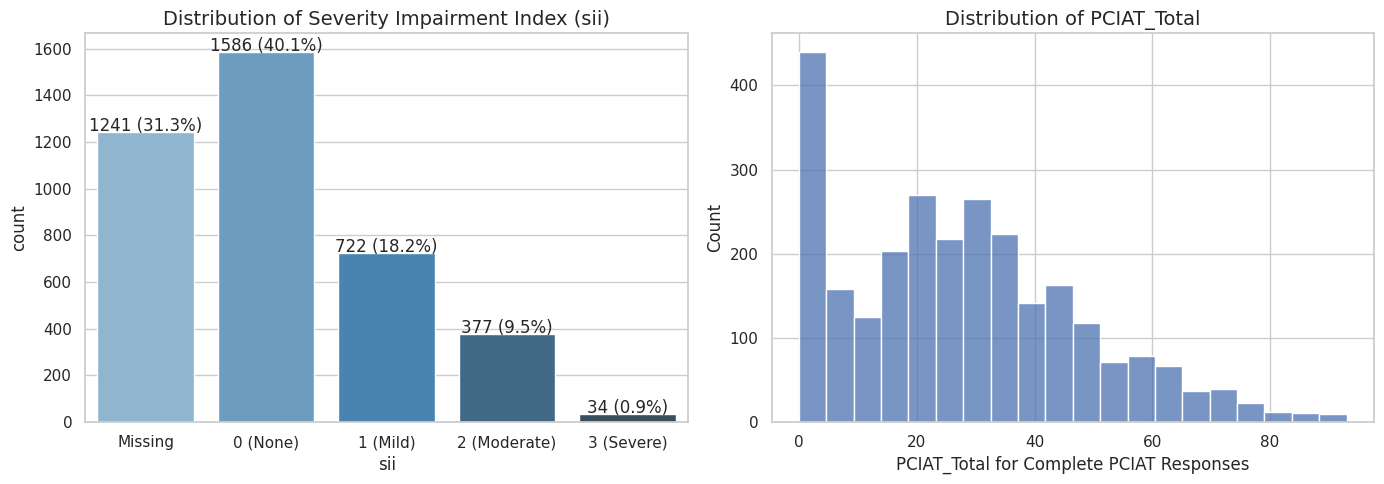

In [12]:
# Vẽ phân phối của SII và PCIAT_Total
sii_counts = train['sii'].value_counts().reset_index()
total = sii_counts['count'].sum()
sii_counts['percentage'] = (sii_counts['count'] / total) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SII
sns.barplot(x='sii', y='count', data=sii_counts, palette='Blues_d', ax=axes[0])
axes[0].set_title('Distribution of Severity Impairment Index (sii)', fontsize=14)
for p in axes[0].patches:
    height = p.get_height()
    percentage = sii_counts.loc[sii_counts['count'] == height, 'percentage'].values[0]
    axes[0].text(
        p.get_x() + p.get_width() / 2,
        height + 5, f'{int(height)} ({percentage:.1f}%)',
        ha="center", fontsize=12
    )

# PCIAT_Total for complete responses
sns.histplot(train['complete_resp_total'].dropna(), bins=20, ax=axes[1])
axes[1].set_title('Distribution of PCIAT_Total', fontsize=14)
axes[1].set_xlabel('PCIAT_Total for Complete PCIAT Responses')

plt.tight_layout()
plt.show()

In [13]:
# Số trẻ đạt điểm 0 của trong tất cả các câu hỏi PCIAT
len(train[train['complete_resp_total'] == 0])

307

In [14]:
# Số lượng theo nhóm tuổi
train['Age Group'] = pd.cut(
    train['Basic_Demos-Age'],
    bins=[4, 12, 18, 22],
    labels=['Children (5-12)', 'Adolescents (13-18)', 'Adults (19-22)']
)
calculate_stats(train, 'Age Group')

count (%)
Age Group                         
Children (5-12)      2919 (73.71%)
Adolescents (13-18)   953 (24.07%)
Adults (19-22)          88 (2.22%)

In [15]:
# Số lượng theo giới tính
sex_map = {0: 'Male', 1: 'Female'}
train['Basic_Demos-Sex'] = train['Basic_Demos-Sex'].map(sex_map)
calculate_stats(train, 'Basic_Demos-Sex')

count (%)
Basic_Demos-Sex               
Male             2484 (62.73%)
Female           1476 (37.27%)

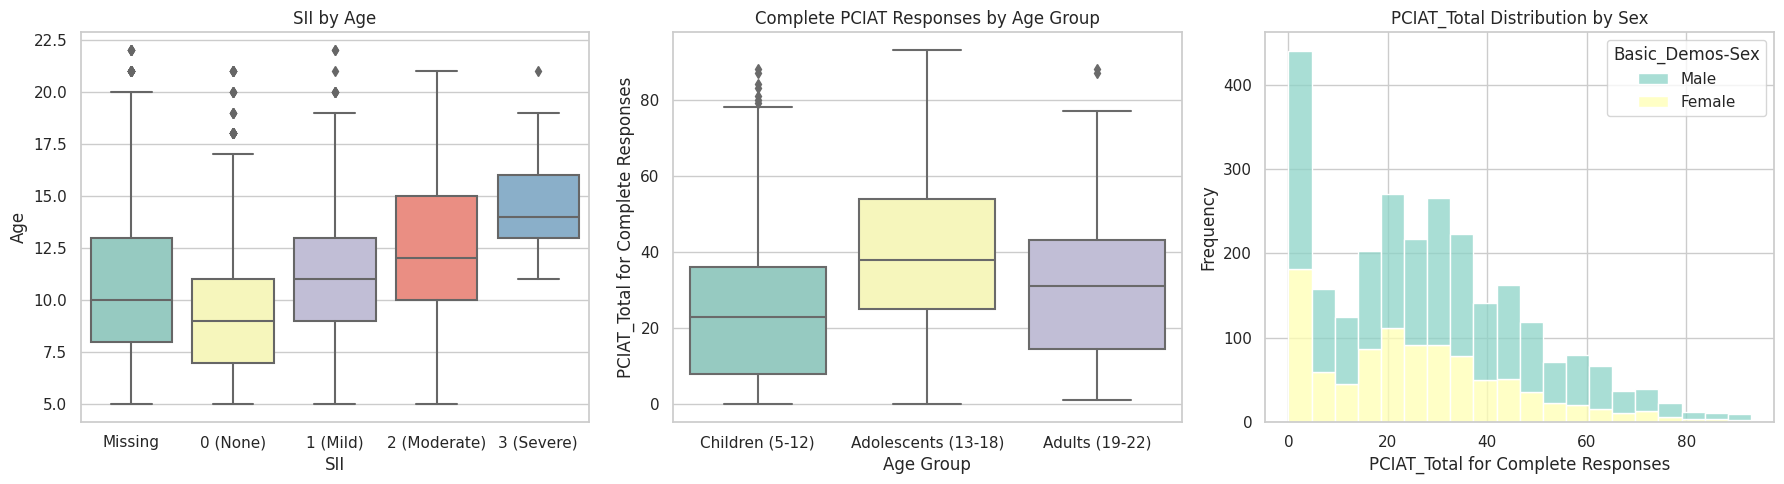

In [16]:
# SII by Age ; Complete PCIAT Responses by Age Group ; PCIAT_Total by Sex
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


sns.boxplot(y=train['Basic_Demos-Age'], x=train['sii'], ax=axes[0], palette="Set3")
axes[0].set_title('SII by Age')
axes[0].set_ylabel('Age')
axes[0].set_xlabel('SII')

# Complete PCIAT Responses by Age Group
sns.boxplot(
    x='Age Group', y='complete_resp_total',
    data=train, palette="Set3", ax=axes[1]
)
axes[1].set_title('Complete PCIAT Responses by Age Group')
axes[1].set_ylabel('PCIAT_Total for Complete Responses')
axes[1].set_xlabel('Age Group')

# PCIAT_Total by Sex
sns.histplot(
    data=train, x='complete_resp_total',
    hue='Basic_Demos-Sex', multiple='stack',
    palette="Set3", bins=20, ax=axes[2]
)
axes[2].set_title('PCIAT_Total Distribution by Sex')
axes[2].set_xlabel('PCIAT_Total for Complete Responses')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

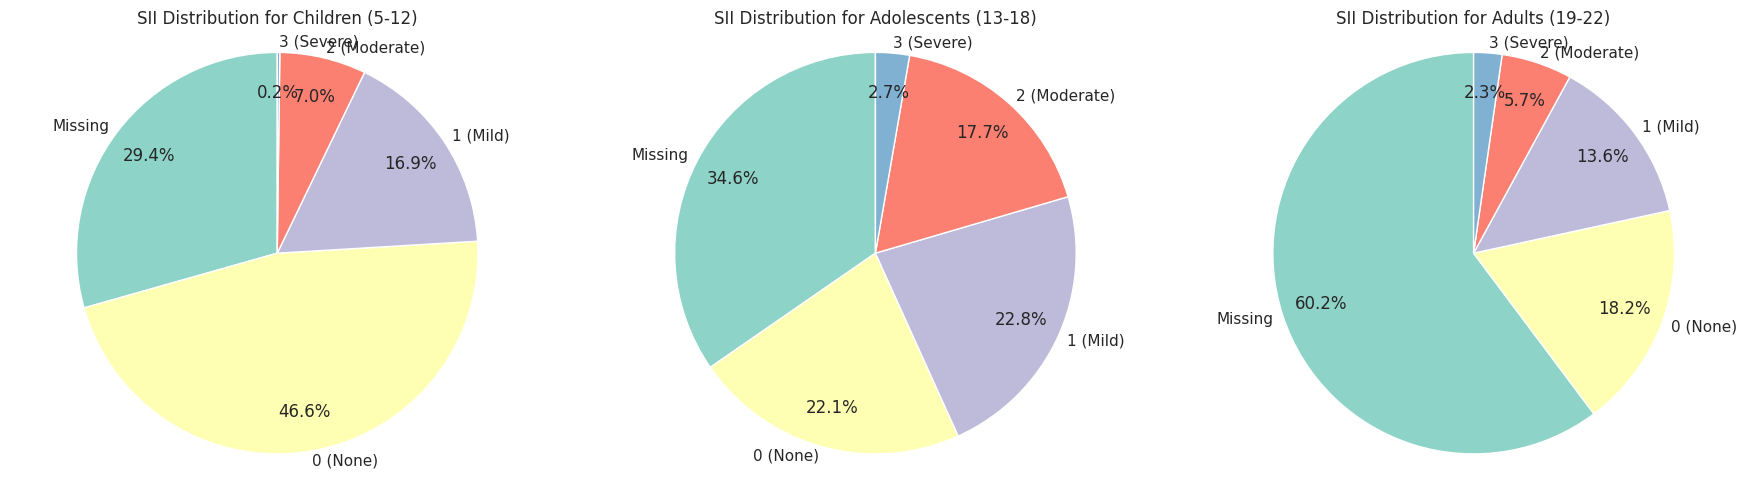

In [17]:
# SII distribution each age group
stats = train.groupby(['Age Group', 'sii']).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(stats), figsize=(18, 5))

for i, age_group in enumerate(stats.index):
    group_counts = stats.loc[age_group] / stats.loc[age_group].sum()
    axes[i].pie(
        group_counts, labels=group_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("Set3"),
        labeldistance=1.05, pctdistance=0.80
    )
    axes[i].set_title(f'SII Distribution for {age_group}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

**Rút ra:**  
Điểm SII cao hơn thường xuất hiện ở những nhóm tuổi lớn hơn, nhưng số lượng trường hợp nghiêm trọng rất ít  
Điểm PCIAT_Total trung bình cao nhất ở thanh thiếu niên  
--> Các vấn đề liên quan đến Internet (PIU) thường đạt đỉnh trong độ tuổi thanh thiếu niên, sau đó giảm ở người lớn  
Số lượng người lớn tham gia rất ít, khiến kết quả có thể không đại diện chính xác  

## Internet Use
PreInt_EduHx-Season  
PreInt_EduHx-computerinternet_hoursday: số giờ dùng internet/computer trong ngày  

In [18]:
data = train[train['PreInt_EduHx-computerinternet_hoursday'].notna()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for participants with measured PreInt_EduHx-computerinternet_hoursday data:"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for participants with measured PreInt_EduHx-computerinternet_hoursday data: 5 - 22 years


In [19]:
train['PreInt_EduHx-computerinternet_hoursday'].unique()

array([ 3.,  0.,  2., nan,  1.])

In [20]:
param_map = {0: '< 1h/day', 1: '~ 1h/day', 2: '~ 2hs/day', 3: '> 3hs/day'}
train['internet_use_encoded'] = train[
    'PreInt_EduHx-computerinternet_hoursday'
].map(param_map).fillna('Missing')

param_ord = ['Missing', '< 1h/day', '~ 1h/day', '~ 2hs/day', '> 3hs/day']
train['internet_use_encoded'] = pd.Categorical(
    train['internet_use_encoded'], categories=param_ord,
    ordered=True
)

In [21]:
# Số lượng theo mùa tham gia
calculate_stats(train, 'PreInt_EduHx-Season')

count (%)
PreInt_EduHx-Season              
Fall                 828 (20.91%)
Summer               821 (20.73%)
Winter               906 (22.88%)
NaN                  420 (10.61%)
Spring               985 (24.87%)

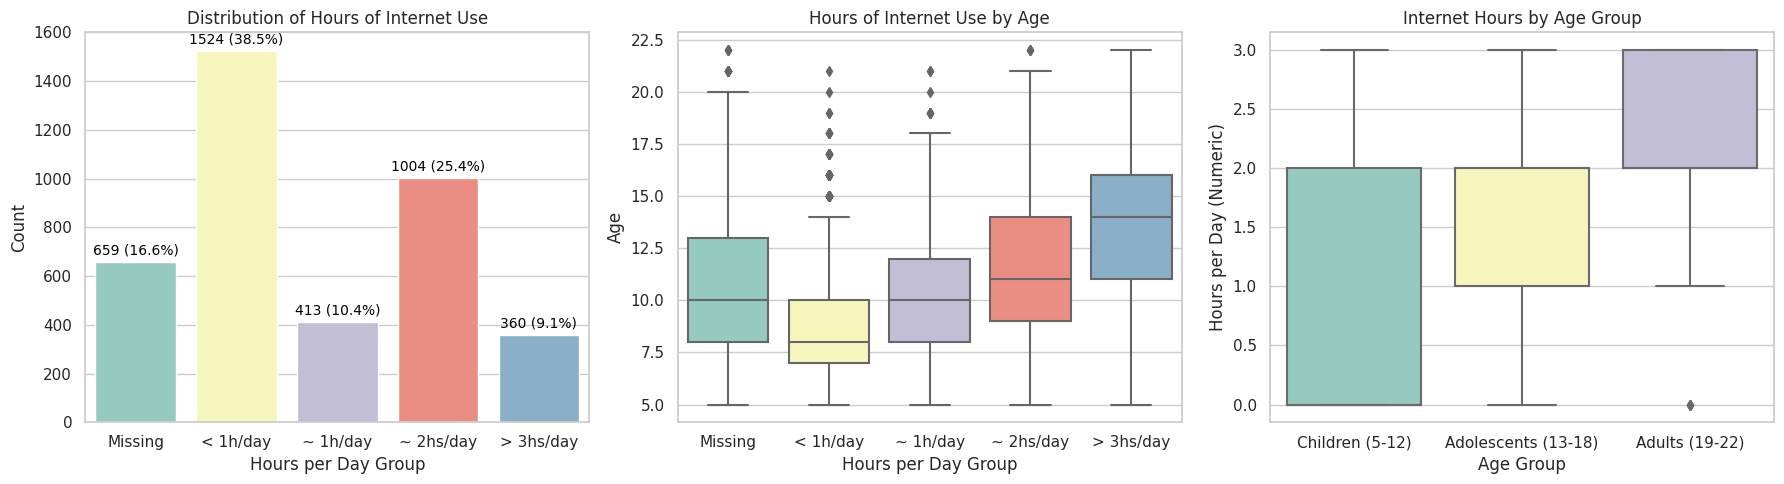

In [22]:
# Phân bố của thời gian sử dụng Internet
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Hours of Internet Use
ax1 = sns.countplot(x='internet_use_encoded', data=train, palette="Set3", ax=axes[0])
axes[0].set_title('Distribution of Hours of Internet Use')
axes[0].set_xlabel('Hours per Day Group')
axes[0].set_ylabel('Count')

total = len(train['internet_use_encoded'])
for p in ax1.patches:
    count = int(p.get_height())
    percentage = '{:.1f}%'.format(100 * count / total)
    ax1.annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                 textcoords='offset points')

# Hours of Internet Use by Age
sns.boxplot(y=train['Basic_Demos-Age'], x=train['internet_use_encoded'], ax=axes[1], palette="Set3")
axes[1].set_title('Hours of Internet Use by Age')
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Hours per Day Group')

# Hours of Internet Use (numeric) by Age Group
sns.boxplot(y='PreInt_EduHx-computerinternet_hoursday', x='Age Group', data=train, ax=axes[2], palette="Set3")
axes[2].set_title('Internet Hours by Age Group')
axes[2].set_ylabel('Hours per Day (Numeric)')
axes[2].set_xlabel('Age Group')

plt.tight_layout()
plt.show()

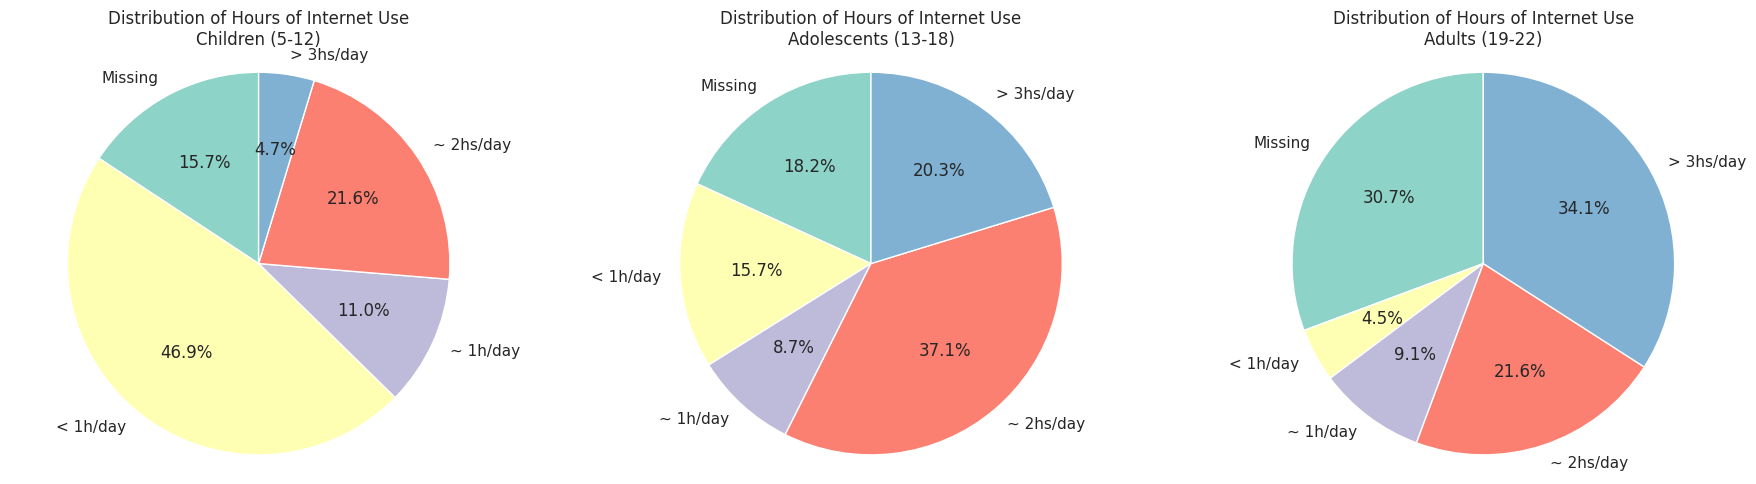

In [23]:
# Phân bố theo nhóm tuổi cụ thể
stats = train.groupby(
    ['Age Group', 'internet_use_encoded']
).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(stats), figsize=(18, 5))

for i, age_group in enumerate(stats.index):
    group_counts = stats.loc[age_group] / stats.loc[age_group].sum()
    axes[i].pie(group_counts, labels=group_counts.index, autopct='%1.1f%%',
                startangle=90, colors=sns.color_palette("Set3"), labeldistance=1.1)
    axes[i].set_title(f'Distribution of Hours of Internet Use\n{age_group}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

**Rút ra:**  
Những người dành nhiều thời gian online hơn mỗi ngày thường có xu hướng lớn tuổi hơn  
Tuy nhiên, các khoảng tuổi giữa các nhóm thời gian sử dụng Internet vẫn có sự đan xen

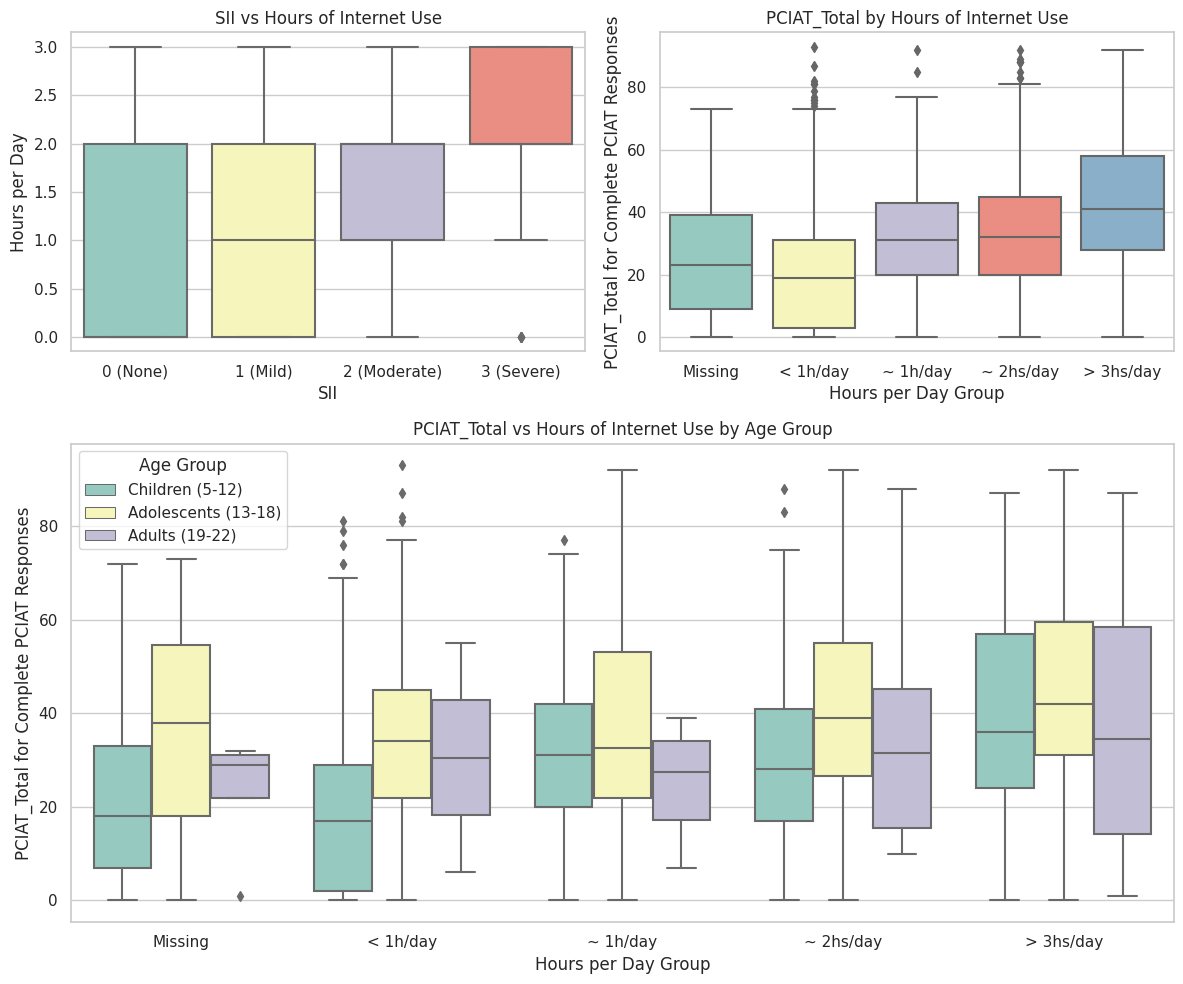

In [24]:
# Phân bố dựa trên SII

sii_reported = train[train['sii'] != "Missing"]
sii_reported.loc[:, 'sii'] = sii_reported['sii'].cat.remove_unused_categories()

fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.5])

# SII vs Hours of Internet Use
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(
    x='sii', y='PreInt_EduHx-computerinternet_hoursday',
    data=sii_reported,
    ax=ax1, palette="Set3"
)
ax1.set_title('SII vs Hours of Internet Use')
ax1.set_ylabel('Hours per Day')
ax1.set_xlabel('SII')

# PCIAT_Total for Complete PCIAT Responses by Hours of Internet Use
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(
    x='internet_use_encoded', y='complete_resp_total',
    data=sii_reported,
    palette="Set3", ax=ax2
)
ax2.set_title('PCIAT_Total by Hours of Internet Use')
ax2.set_ylabel('PCIAT_Total for Complete PCIAT Responses')
ax2.set_xlabel('Hours per Day Group')

# SII vs Hours of Internet Use by Age Group (Full width)
ax3 = fig.add_subplot(gs[1, :])
sns.boxplot(
    x='internet_use_encoded', y='complete_resp_total',
    data=sii_reported,
    hue='Age Group', ax=ax3, palette="Set3"
)
ax3.set_title('PCIAT_Total vs Hours of Internet Use by Age Group')
ax3.set_ylabel('PCIAT_Total for Complete PCIAT Responses')
ax3.set_xlabel('Hours per Day Group')

plt.tight_layout()
plt.show()

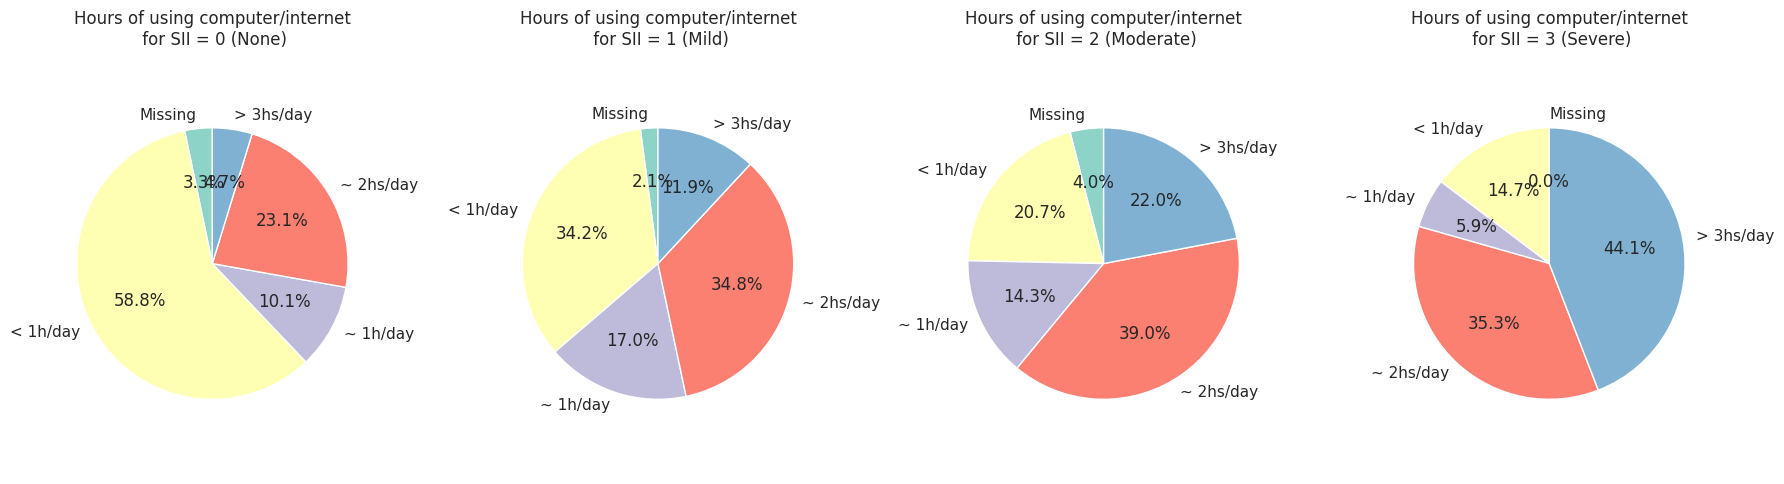

In [25]:
# Phân bố trên SII cụ thể
stats = sii_reported.groupby(
    ['sii', 'internet_use_encoded']
).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(stats), figsize=(18, 5))

for i, sii_group in enumerate(stats.index):
    group_counts = stats.loc[sii_group] / stats.loc[sii_group].sum()
    axes[i].pie(
        group_counts, labels=group_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("Set3"), labeldistance=1.1
    )
    axes[i].set_title(f'Hours of using computer/internet\n for SII = {sii_group}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

**Rút ra:**  
Xu hướng tuyến tính giữa SII và thời gian sử dụng internet, với những người có điểm SII cao hơn dành nhiều thời gian trực tuyến hơn  
Mối quan hệ phi tuyến tính giữa thời gian sử dụng Internet và điểm PCIAT chia theo độ tuổi, với Adolescents là nhóm tuổi bị ảnh hưởng nhiều nhất (không hiểu tại sao dù dùng internet ít hay nhiều thì vẫn có PCIAT cao --> có thể do các câu trả lời của phụ huynh hoàn toàn chủ quan)  
Có một số người ở các lứa tuổi (5 đến 21) dành ít hơn một giờ mỗi ngày trực tuyến nhưng có điểm SII cao  

## Children's Global Assessment Scale
Đo sức khỏe tinh thần bằng việc đo chức năng tâm lý xã hội  
CGAS-Season: mùa thực hiện bài test  
CGAS-CGAS_Score  
"1-10: Needs constant supervision (24 hour care)",  
"11-20: Needs considerable supervision",  
"21-30: Unable to function in almost all areas",  
"31-40: Major impairment in functioning in several areas",  
"41-50: Moderate degree of interference in functioning",  
"51-60: Variable functioning with sporadic difficulties",  
"61-70: Some difficulty in a single area",  
"71-80: No more than slight impairment in functioning",  
"81-90: Good functioning in all areas",  
"91-100: Superior functioning"ds constant supervision (24 hour care)",  

In [26]:
calculate_stats(train, 'CGAS-CGAS_Score')

count       mean        std   min   25%   50%   75%    max  \
CGAS-CGAS_Score                                                                
CGAS-CGAS_Score  2421.0  65.454771  22.341862  25.0  59.0  65.0  75.0  999.0   

                 missing  
CGAS-CGAS_Score           
CGAS-CGAS_Score     1539

In [27]:
train[train['CGAS-CGAS_Score'] > 100]

id Basic_Demos-Enroll_Season  Basic_Demos-Age Basic_Demos-Sex  \
2065  83525bbe                      Fall               11          Female   

     CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  \
2065      Winter            999.0            Fall           NaN   

      Physical-Height  Physical-Weight  ...  PCIAT-PCIAT_Total  SDS-Season  \
2065              NaN              NaN  ...                NaN         NaN   

      SDS-SDS_Total_Raw  SDS-SDS_Total_T PreInt_EduHx-Season  \
2065                NaN              NaN                Fall   

      PreInt_EduHx-computerinternet_hoursday      sii  complete_resp_total  \
2065                                     3.0  Missing                  NaN   

            Age Group  internet_use_encoded  
2065  Children (5-12)             > 3hs/day  

[1 rows x 85 columns]

In [28]:
train.loc[train['CGAS-CGAS_Score'] == 999, 'CGAS-CGAS_Score'] = np.nan

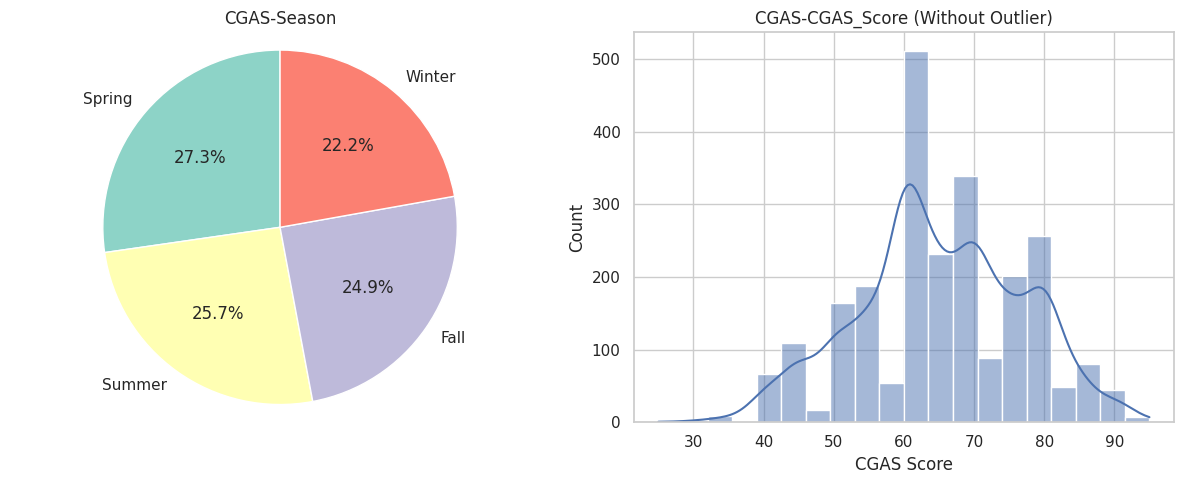

In [29]:
# Phân bố của CGAS_Score
plt.figure(figsize=(12, 5))

# CGAS-Season
plt.subplot(1, 2, 1)
cgas_season_counts = train['CGAS-Season'].value_counts(normalize=True)
plt.pie(
    cgas_season_counts, 
    labels=cgas_season_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set3")
)
plt.title('CGAS-Season')
plt.axis('equal')

# CGAS-CGAS_Score without outliers (score == 999)
plt.subplot(1, 2, 2)
sns.histplot(
    train['CGAS-CGAS_Score'].dropna(),
    bins=20, kde=True
)
plt.title('CGAS-CGAS_Score (Without Outlier)')
plt.xlabel('CGAS Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Đa số từ 51 đến 70 điểm CGAS

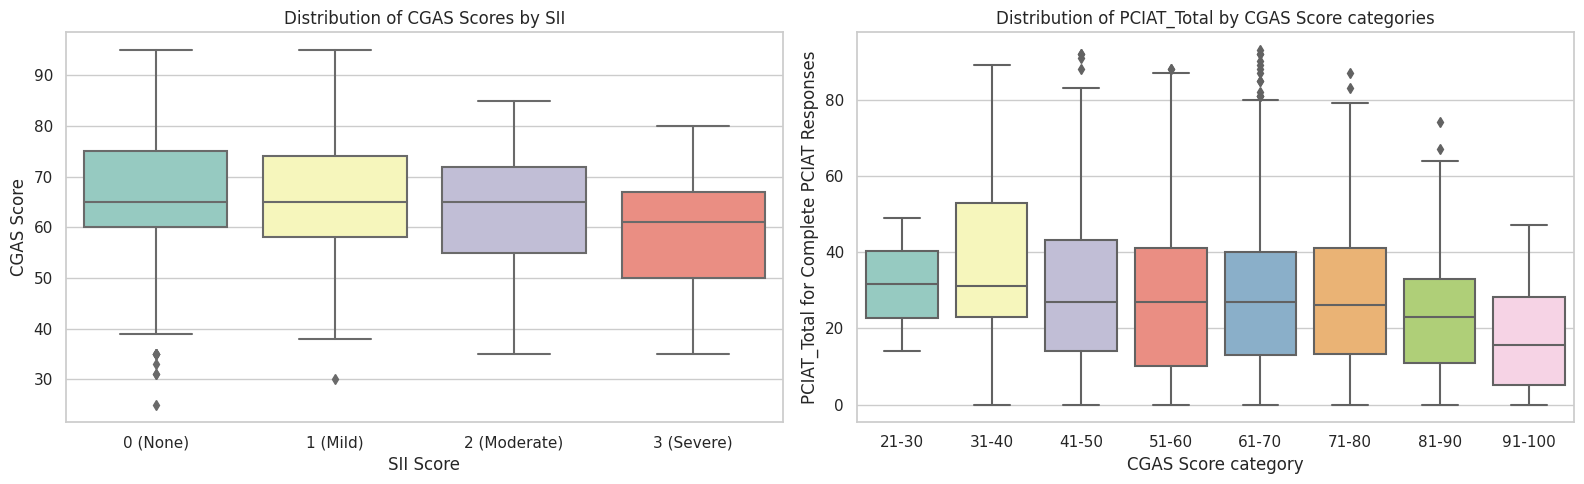

In [30]:
# Phân bố của CGAS_Score theo SII

bins = np.arange(0, 101, 10)
labels = [
    "1-10: Needs constant supervision (24 hour care)",
    "11-20: Needs considerable supervision",
    "21-30: Unable to function in almost all areas",
    "31-40: Major impairment in functioning in several areas",
    "41-50: Moderate degree of interference in functioning",
    "51-60: Variable functioning with sporadic difficulties",
    "61-70: Some difficulty in a single area",
    "71-80: No more than slight impairment in functioning",
    "81-90: Good functioning in all areas",
    "91-100: Superior functioning"
]

train['CGAS_Score_Bin'] = pd.cut(
    train['CGAS-CGAS_Score'], bins=bins, labels=labels
)
train_filt = train.dropna(subset=['CGAS_Score_Bin', 'complete_resp_total'])
train_filt.loc[:, 'CGAS_Score_Bin'] = train_filt['CGAS_Score_Bin'].cat.remove_unused_categories()
train_filt.loc[:, 'sii'] = train_filt['sii'].cat.remove_unused_categories()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# CGAS-CGAS_Score vs sii
sns.boxplot(
    data=train_filt,
    x='sii', y='CGAS-CGAS_Score',
    palette='Set3', ax=axes[0]
)
axes[0].set_xlabel('SII Score')
axes[0].set_ylabel('CGAS Score')
axes[0].set_title('Distribution of CGAS Scores by SII')

# complete_resp_total vs CGAS_Score_Bin
sns.boxplot(
    data=train_filt,
    x='CGAS_Score_Bin', y='complete_resp_total',
    ax=axes[1], palette='Set3'
)

# Get the tick positions and match the labels
range_labels = [label.split(":")[0] for label in train_filt['CGAS_Score_Bin'].cat.categories]
axes[1].set_xticklabels(range_labels)

axes[1].set_xlabel('CGAS Score category')
axes[1].set_ylabel('PCIAT_Total for Complete PCIAT Responses')
axes[1].set_title('Distribution of PCIAT_Total by CGAS Score categories')

plt.tight_layout()
plt.show()

Điểm trung vị của các CGAS theo SII đều như nhau (chỉ giảm nhẹ)  
Người có điểm thấp nhất và cao nhất đều thuộc nhóm 0 --> Cho thấy có những người gặp vấn đề sức khỏe nghiêm trọng nhưng không liên quan đến việc sử dụng Internet không lành mạnh (Nhóm SII thấp vẫn có sự đa dạng về sức khỏe)  

## Physical Measures
Physical-Season  
Physical-BMI  
Physical-Height  
Physical-Weight  
Physical-Waist_Circumfrence  
Physical-Diastolic_BP: huyết áp tâm thu (áp lực máu khi tim bóp)  
Physical-HeartRate  
Physical-Systolic_BP: huyết áp tâm trương (áp lực máu khi tim nghỉ khi giữa 2 lần bóp) 

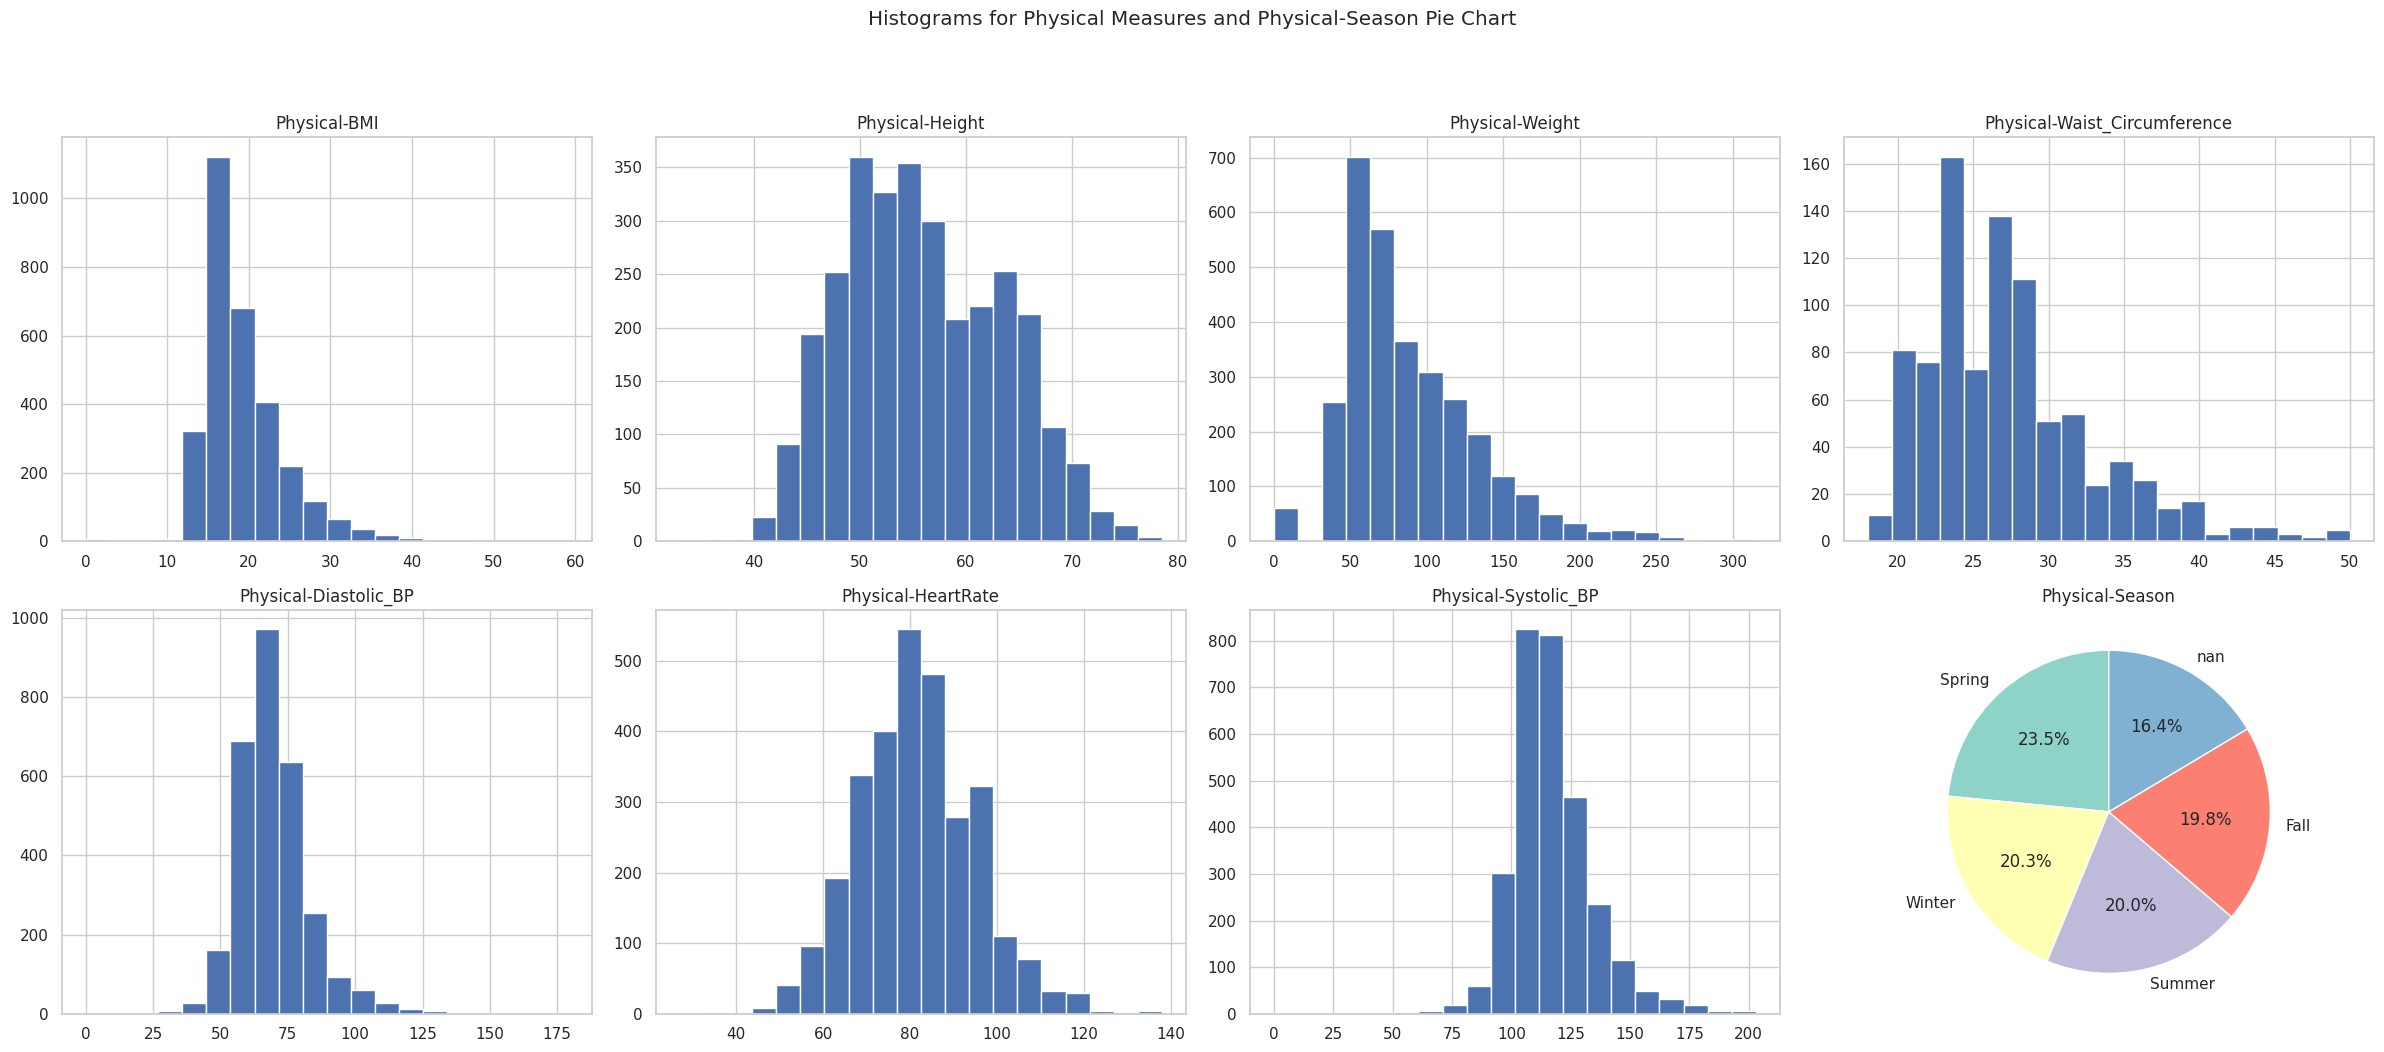

In [31]:

groups = data_dictionary.groupby('Instrument')['Field'].apply(list).to_dict()
continuous_cols = data_dictionary[data_dictionary['Type'].str.contains(
    'float|int', case=False
)]['Field'].tolist()

features_physical = groups.get('Physical Measures', [])
cols = [col for col in features_physical if col in continuous_cols]

plt.figure(figsize=(24, 10))
n_cols = 4
n_rows = len(cols) // n_cols + 1

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    train[col].hist(bins=20)
    plt.title(col)

plt.subplot(n_rows, n_cols, len(cols) + 1)
season_counts = train['Physical-Season'].value_counts(dropna=False)
plt.pie(
    season_counts,
    labels=season_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set3")
)
plt.title('Physical-Season')

plt.suptitle('Histograms for Physical Measures and Physical-Season Pie Chart', y=1.05)
plt.tight_layout()
plt.show()

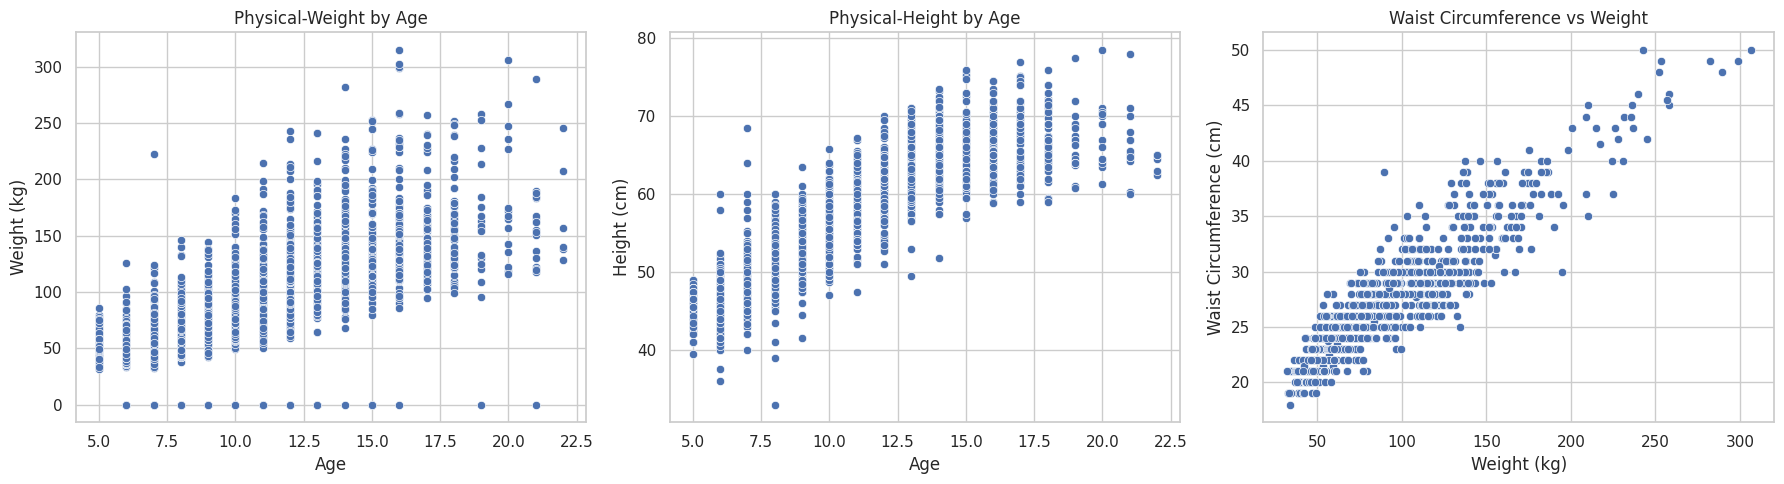

In [32]:
# Height, Weight and Waist_Circumference
plt.figure(figsize=(18, 5))

# Physical-Weight by Age
plt.subplot(1, 3, 1)
sns.scatterplot(x='Basic_Demos-Age', y='Physical-Weight', data=train)
plt.title('Physical-Weight by Age')
plt.xlabel('Age')
plt.ylabel('Weight (kg)')

# Physical-Height by Age
plt.subplot(1, 3, 2)
sns.scatterplot(x='Basic_Demos-Age', y='Physical-Height', data=train)
plt.title('Physical-Height by Age')
plt.xlabel('Age')
plt.ylabel('Height (cm)')

# Physical-Waist_Circumference vs Physical-Weight
plt.subplot(1, 3, 3)
sns.scatterplot(x='Physical-Weight', y='Physical-Waist_Circumference', data=train)
plt.title('Waist Circumference vs Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Waist Circumference (cm)')

plt.tight_layout()
plt.show()

Cân nặng và chiều cao tăng theo tuổi, vòng eo và cân nặng tương quan chặt chẽ  
Một số người có chiều cao, cân nặng, hoặc vòng eo không phù hợp (ví dụ: vòng eo 100 cm nhưng cân nặng chỉ 40 kg, hoặc trẻ 7 tuổi cao 175 cm)  
--> Khó xác định đâu là giá trị sai (vòng eo, cân nặng, hay chiều cao)

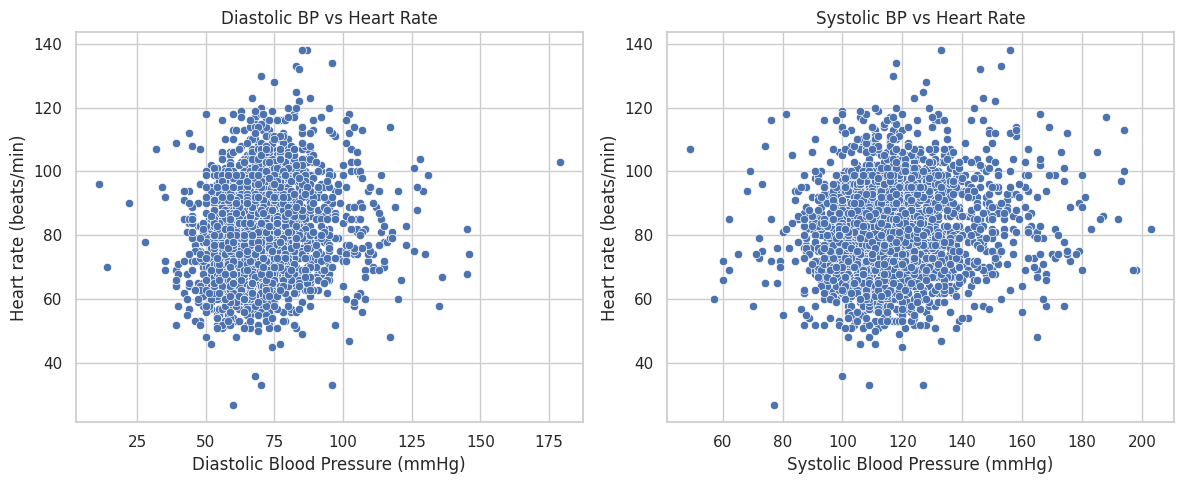

In [33]:
# Blood Pressure vs Heart Rate
plt.figure(figsize=(12, 5))

# Diastolic BP vs Heart Rate
plt.subplot(1, 2, 1)
sns.scatterplot(x='Physical-Diastolic_BP', y='Physical-HeartRate', data=train)
plt.title('Diastolic BP vs Heart Rate')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Heart rate (beats/min)')

# Systolic BP vs Heart Rate
plt.subplot(1, 2, 2)
sns.scatterplot(x='Physical-Systolic_BP', y='Physical-HeartRate', data=train)
plt.title('Systolic BP vs Heart Rate')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Heart rate (beats/min)')

plt.tight_layout()
plt.show()

Không thấy được mối tương quan giữa nhịp tim và huyết áp  
--> Các phép đo có thể được thực hiện khi đang nghỉ ngơi hoặc trong điều kiện không căng thẳng

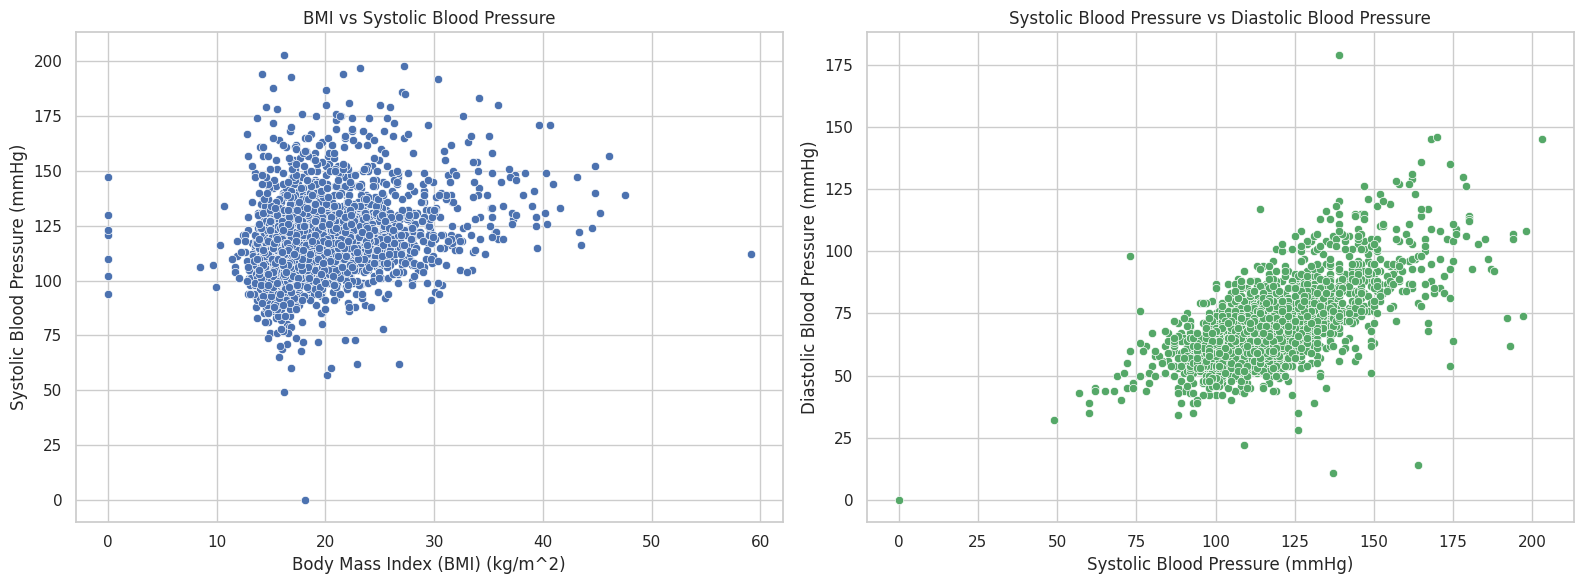

In [34]:
# Blood pressure vs Body Mass Index (BMI)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BMI vs Systolic Blood Pressure
sns.scatterplot(x='Physical-BMI', y='Physical-Systolic_BP', data=train, ax=axes[0], color='b')
axes[0].set_title('BMI vs Systolic Blood Pressure')
axes[0].set_xlabel('Body Mass Index (BMI) (kg/m^2)')
axes[0].set_ylabel('Systolic Blood Pressure (mmHg)')

# Systolic Blood Pressure vs Diastolic Blood Pressure
sns.scatterplot(
    x='Physical-Systolic_BP', y='Physical-Diastolic_BP',
    data=train, ax=axes[1], color='g'
)
axes[1].set_title('Systolic Blood Pressure vs Diastolic Blood Pressure')
axes[1].set_xlabel('Systolic Blood Pressure (mmHg)')
axes[1].set_ylabel('Diastolic Blood Pressure (mmHg)')

plt.tight_layout()
plt.show()

Không thấy được tương quan giữa BMI và huyết áp  
Có mối tương quan tuyến tính giữa huyết áp tâm thu và tâm trương (tuy nhiên vẫn có vài dữ liệu nhiễu)

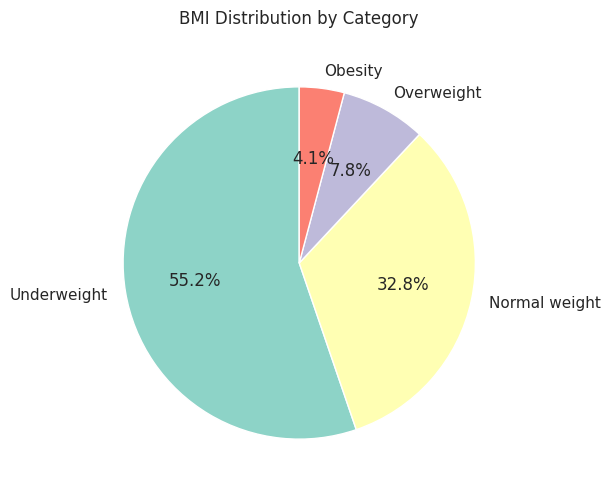

In [35]:
# Phân phối BMI
bmi_categories = [
    ('Underweight', train['Physical-BMI'] < 18.5),
    ('Normal weight', (train['Physical-BMI'] >= 18.5) & (train['Physical-BMI'] <= 24.9)),
    ('Overweight', (train['Physical-BMI'] >= 25) & (train['Physical-BMI'] <= 29.9)),
    ('Obesity', train['Physical-BMI'] >= 30)
]
bmi_category_counts = {label: condition.sum() for label, condition in bmi_categories}

plt.figure(figsize=(5, 6))
plt.pie(bmi_category_counts.values(),
        labels=bmi_category_counts.keys(),
        autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Set3.colors)
plt.title('BMI Distribution by Category')
plt.axis('equal')
plt.show()

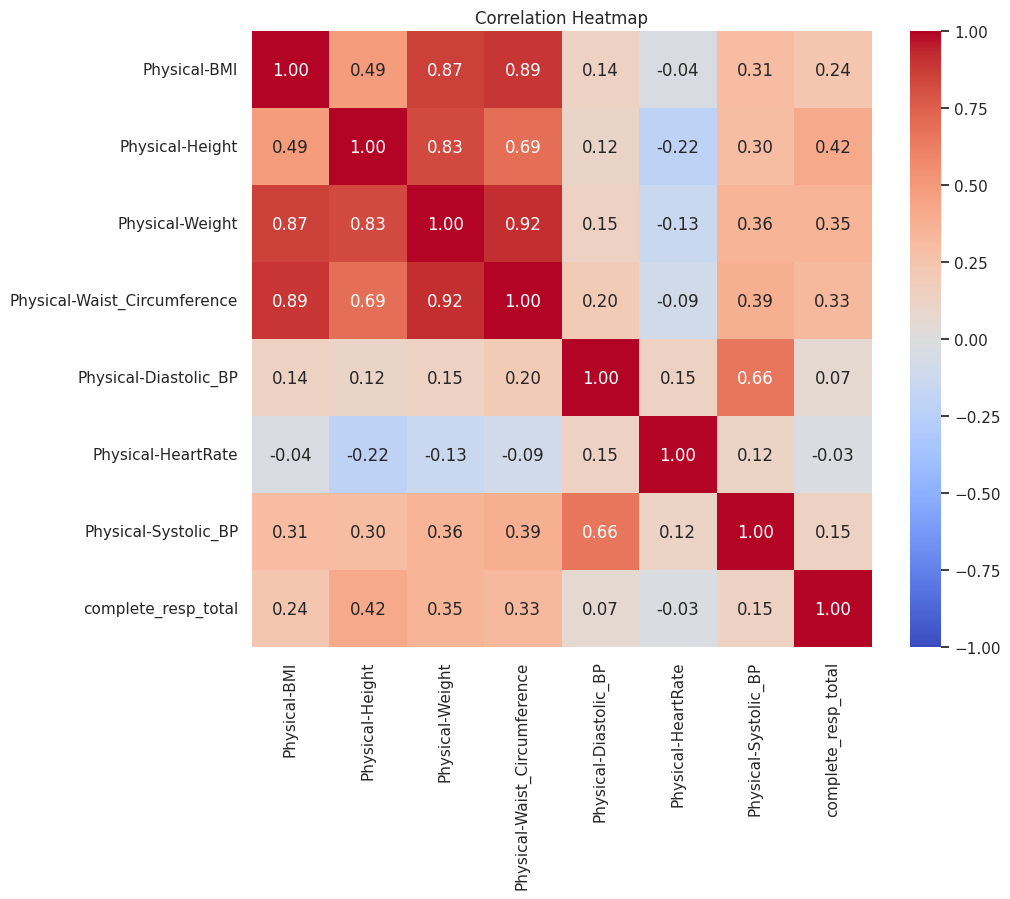

In [36]:
# Relationships with the target variable (PCIAT_Total for complete PCIAT responses)
data_subset = train[cols + ['complete_resp_total']]

corr_matrix = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Chiều cao, cân nặng, và vòng eo có tương quan dương với SII, có thể phản ánh xu hướng theo tuổi vì SII cao nhất ở thanh thiếu niên.  
Các chỉ số tim mạch thay đổi ít hơn theo tuổi, ít nhạy với hành vi sử dụng internet, và dữ liệu phân tán hơn, nên mối liên hệ với SII yếu hoặc không rõ ràng.

## Bio-electric Impedance Analysis
Sử dụng dòng điện để đo chỉ số cơ thể như tỷ lệ chất béo, nước, khối lượng cơ  
BIA-Season  
BIA-BIA_Activity_Level_Num: mức độ hoạt động thể chất  
BIA-BIA_BMC(bone mineral content): khoáng chất trong xương, đánh giá sức khỏe của xương  
BIA-BIA_BMI(body mass index): mức độ thừa thiếu cân  
BIA-BIA_BMR(basal metabolic rate): mức độ chuyển hóa cơ bản, là năng lượng mà cơ thể tiêu hao để duy trì sự sống cơ bản  
BIA-BIA_DEE(daily energy expenditure): tổng calo cơ thể tiêu mỗi ngày  
BIA-BIA_ECW(extracellular water): lượng nước ngoài tế bào (huyết tương, v.v.) -> tình trạng cân bằng nước của cơ thể  
BIA-BIA_FFM(fat-free mass): khối lượng cơ thể trừ mỡ -> đo sức khỏe cơ bắp  
BIA-BIA_FFMI(fat-free mass index): tỷ lệ FFM với chiều cao  
BIA-BIA_Fat: lượng mỡ cơ thể  
BIA-BIA_Frame_num: khung xương cơ thể  
BIA-BIA_ICW(intracellular water): lượng nước trong tế bào  
BIA-BIA_LDM(lean dry mass): 1 phần của FFM  
BIA-BIA_LST(lean soft tissue): mô mềm (cơ, v.v.) ko mỡ -> đánh giá lượng cơ bắp  
BIA-BIA_SMM(skeletal muscle mass): tổng lượng cơ xương  
BIA-BIA_TBW(total body water): tổng ICW (trong tế bào) và ECW (ngoài tế bào)  

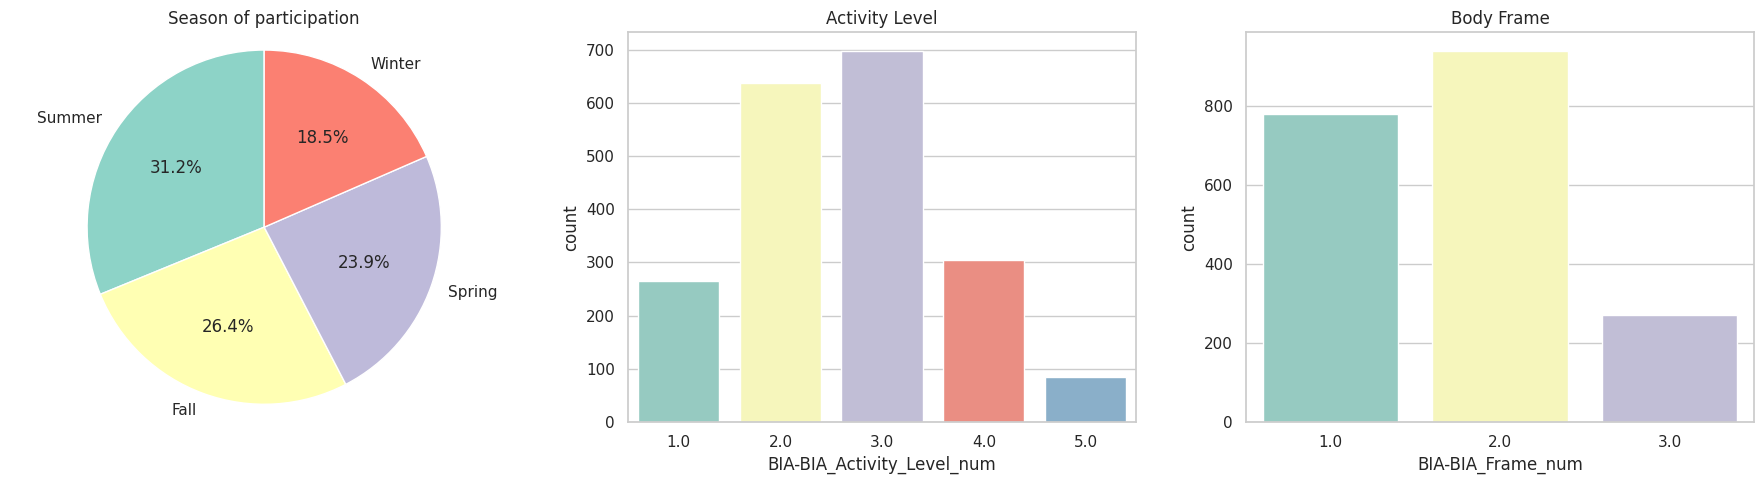

In [37]:
# Phân bố của một số thuộc tính
bia_data_dict = data_dictionary[data_dictionary['Instrument'] == 'Bio-electric Impedance Analysis']
categorical_columns = bia_data_dict[bia_data_dict['Type'] == 'categorical int']['Field'].tolist()
continuous_columns = bia_data_dict[bia_data_dict['Type'] == 'float']['Field'].tolist()
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Season
season_counts = train['BIA-Season'].value_counts(normalize=True)
axes[0].pie(
    season_counts, 
    labels=season_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set3")
)
axes[0].set_title(
    f"{bia_data_dict[bia_data_dict['Field'] == 'BIA-Season']['Description'].values[0]}"
)
axes[0].axis('equal')

# Other categorical columns
for idx, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=train, palette="Set3", ax=axes[idx+1])
    axes[idx+1].set_title(data_dictionary[data_dictionary['Field'] == col]['Description'].values[0])

plt.tight_layout()
plt.show()

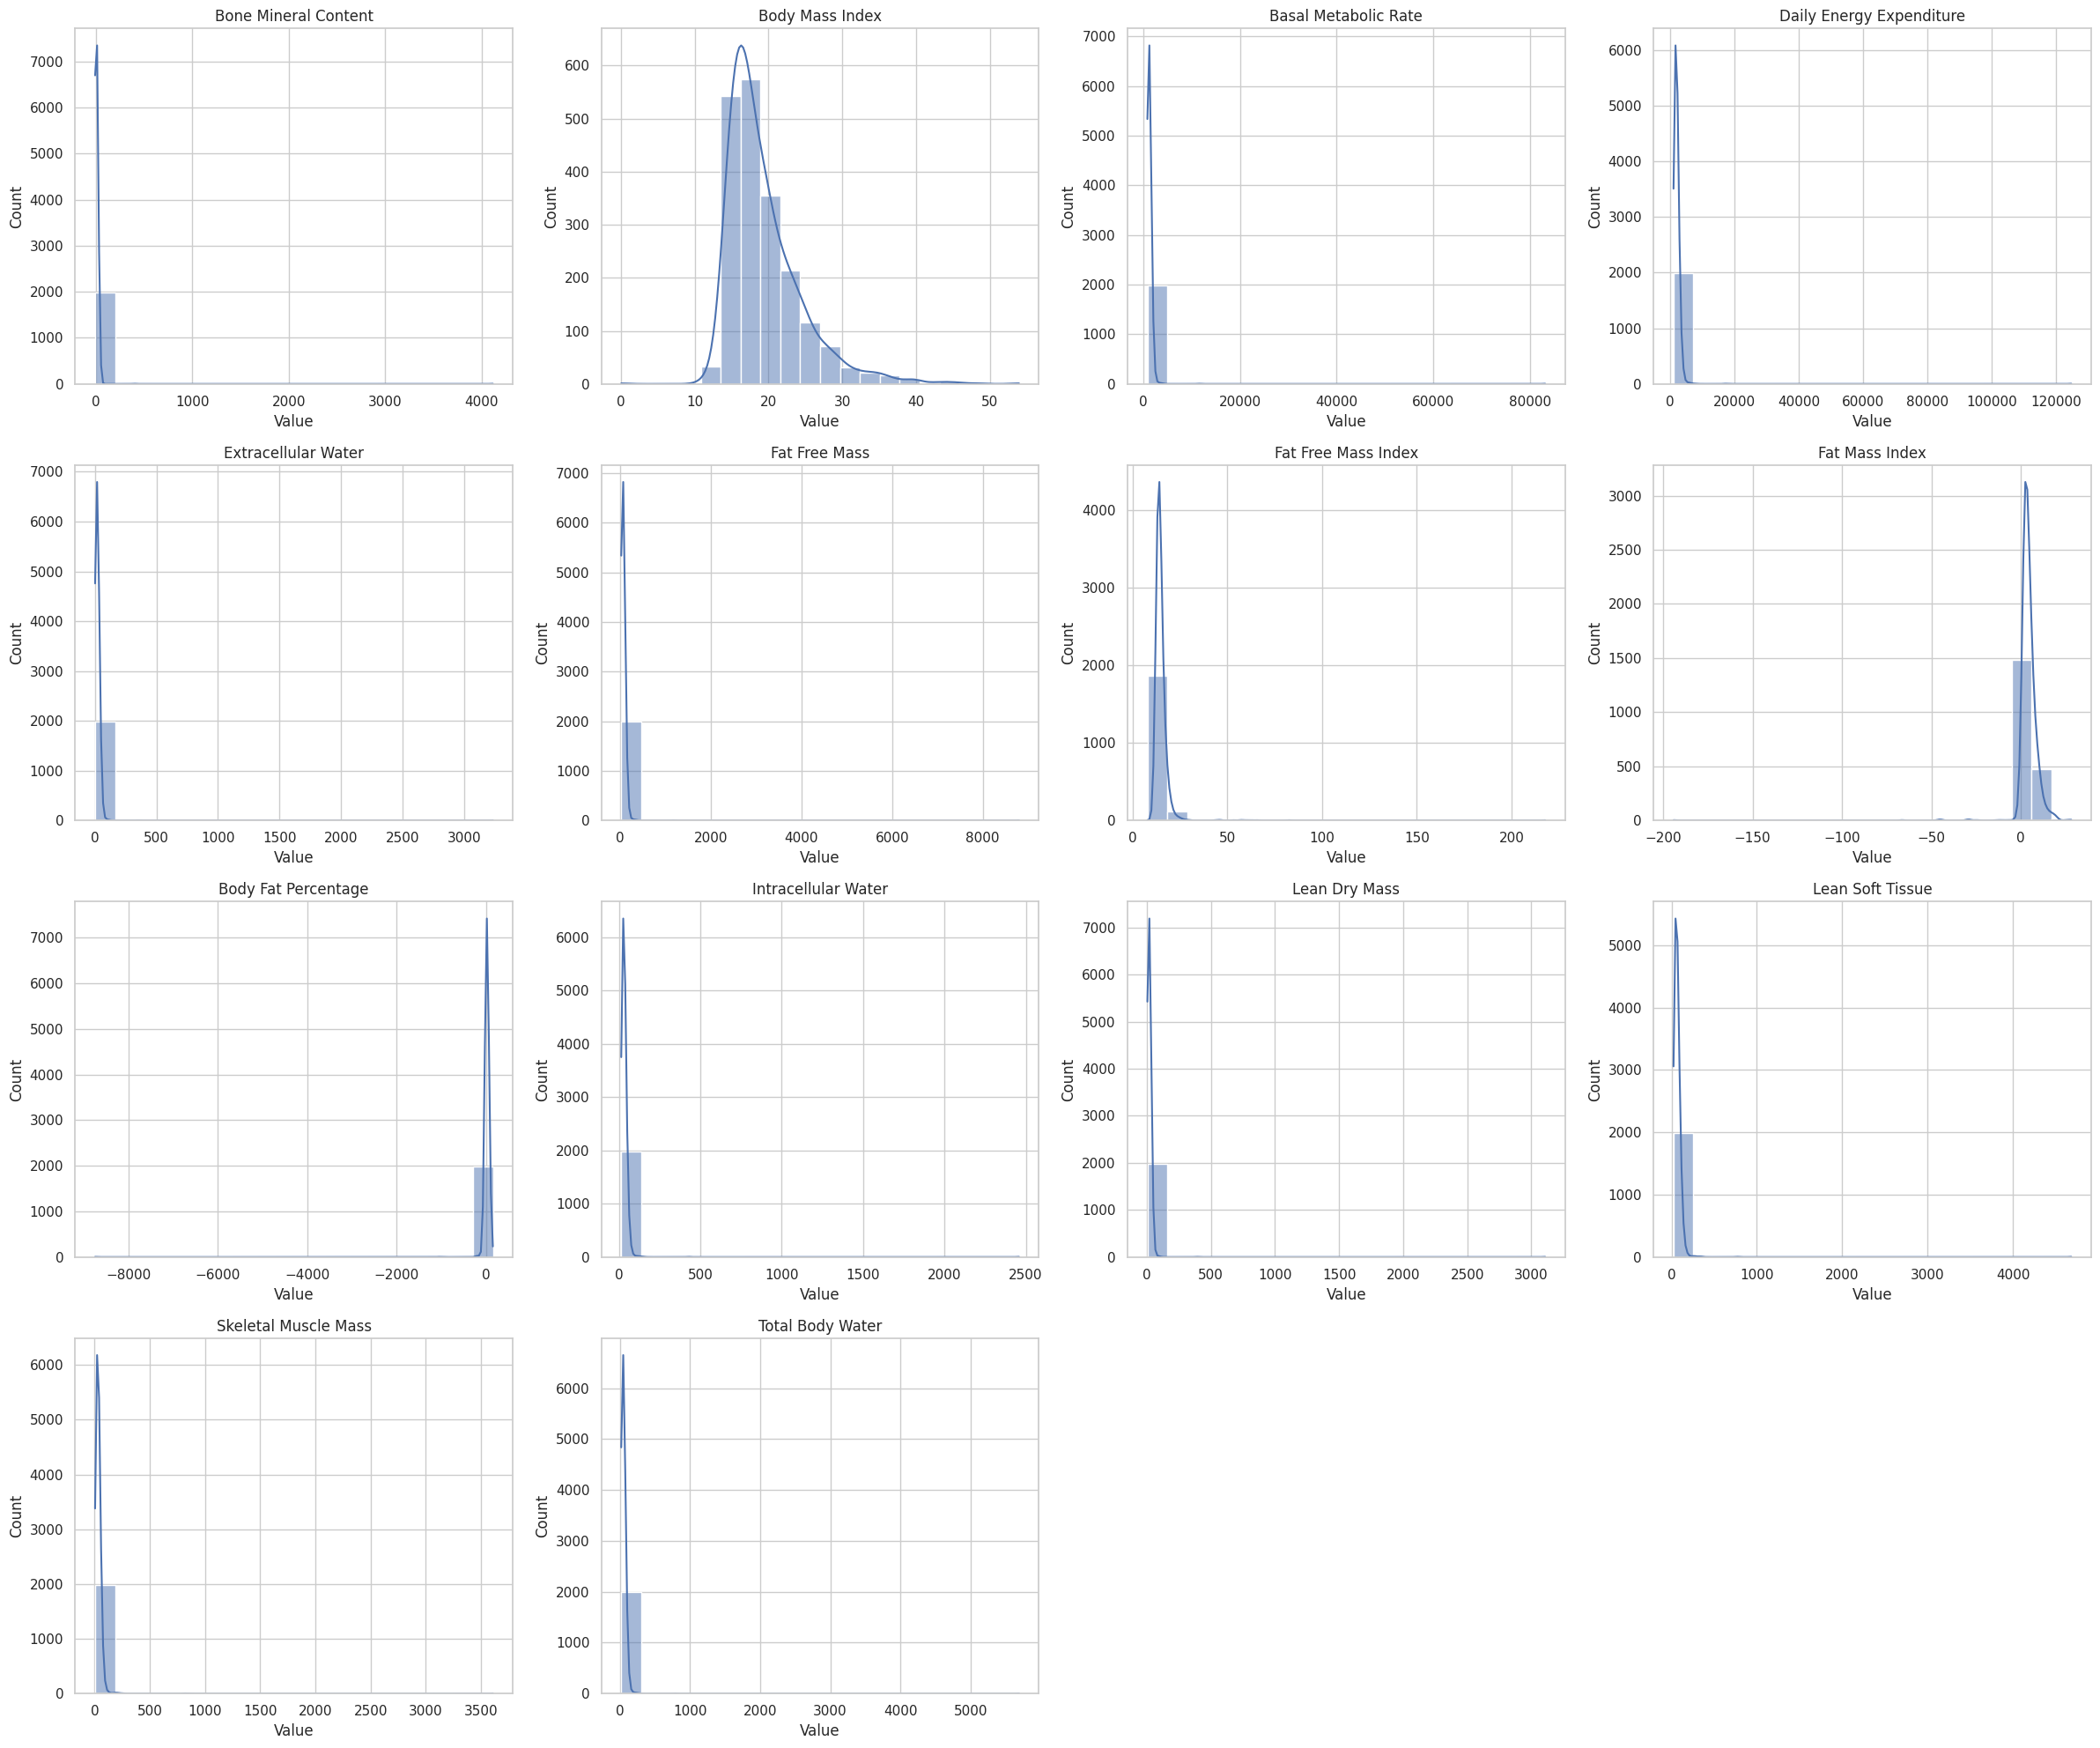

In [38]:
# Phân bố của 1 số thuộc tính
plt.figure(figsize=(24, 20))

for idx, col in enumerate(continuous_columns):
    plt.subplot(4, 4, idx + 1)
    sns.histplot(train[col].dropna(), bins=20, kde=True)
    plt.title(data_dictionary[data_dictionary['Field'] == col]['Description'].values[0])
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

Phần lớn các chỉ số này không có ích: phân bố lệch, phần lớn có giá trị nhỏ và một số ít là ngoại lệ (có thể do lỗi đo lường)

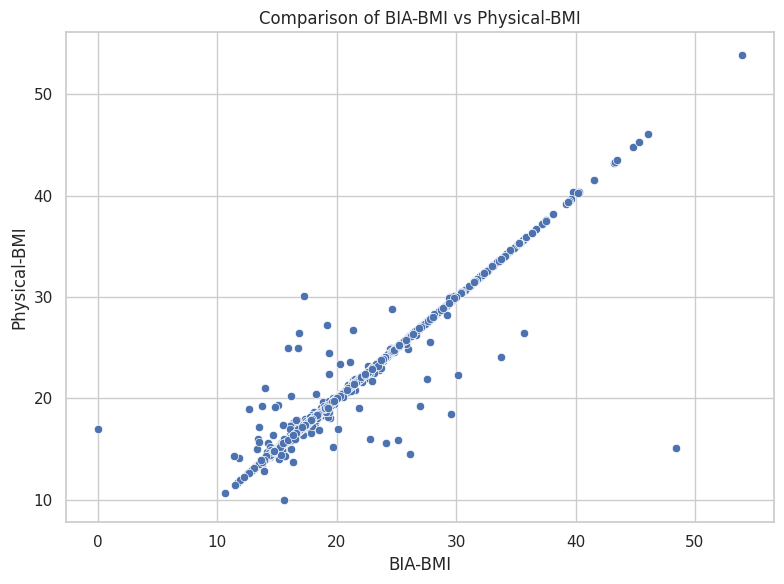

In [39]:
# So sánh 2 loại BMI

bmi_data = train[['BIA-BIA_BMI', 'Physical-BMI']].dropna()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='BIA-BIA_BMI', y='Physical-BMI',
    data=bmi_data,
    color='b'
)
plt.title('Comparison of BIA-BMI vs Physical-BMI')
plt.xlabel('BIA-BMI')
plt.ylabel('Physical-BMI')

plt.tight_layout()
plt.show()

## Sleep Disturbance Scale
SDS-Season  
SDS-SDS_Total_Raw  
SDS-SDS_Total_T

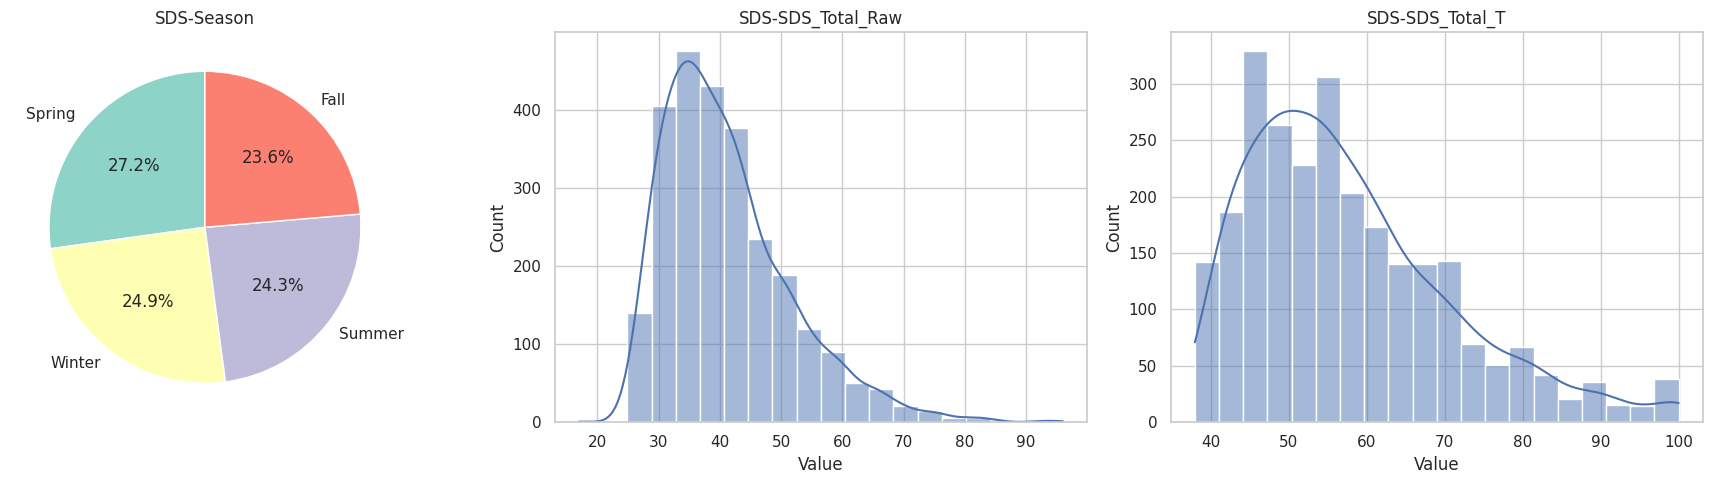

In [40]:
# Phân phối
plt.figure(figsize=(18, 5))

# SDS-Season (Pie Chart)
plt.subplot(1, 3, 1)
sds_season_counts = train['SDS-Season'].value_counts(normalize=True)
plt.pie(
    sds_season_counts, 
    labels=sds_season_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set3")
)
plt.title('SDS-Season')

# SDS-SDS_Total_Raw
plt.subplot(1, 3, 2)
sns.histplot(train['SDS-SDS_Total_Raw'].dropna(), bins=20, kde=True)
plt.title('SDS-SDS_Total_Raw')
plt.xlabel('Value')

# SDS-SDS_Total_T
plt.subplot(1, 3, 3)
sns.histplot(train['SDS-SDS_Total_T'].dropna(), bins=20, kde=True)
plt.title('SDS-SDS_Total_T')
plt.xlabel('Value')

plt.tight_layout()
plt.show()

Các điểm số về rối loạn giấc ngủ đều có sự biến động vừa phải, với một số giá trị đặt biệt cho thấy có những rối loạn giấc ngủ nghiêm trọng ở một số người tham gia

## FitnessGram Vitals and Treadmill
Test sức bền thông qua máy chạy bộ  
Fitness_Endurance-Season: mùa thực hiện bài test  
Fitness_Endurance-Max_Stage: độ khó cao nhất của bài test mà participant đạt được  
Fitness_Endurance-Time_Min: thời gian participant chạy duy trì  
Fitness_Endurance-Time_sec

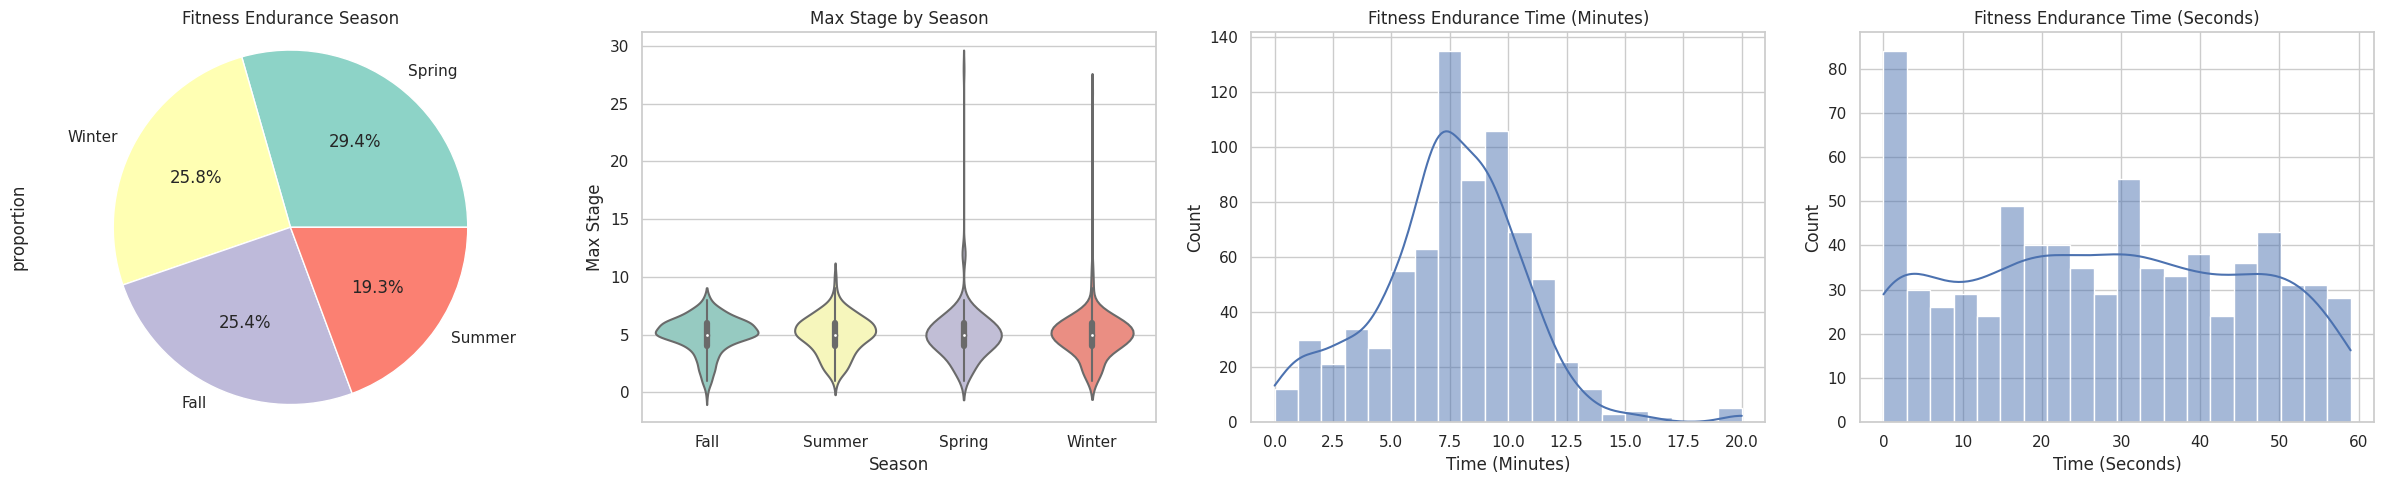

In [41]:
#
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Fitness Endurance Season
train['Fitness_Endurance-Season'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=plt.cm.Set3.colors, ax=axes[0]
)
axes[0].set_title('Fitness Endurance Season')
axes[0].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Box plot for Max Stage by Season
sns.violinplot(
    x='Fitness_Endurance-Season',
    y='Fitness_Endurance-Max_Stage',
    data=train, palette="Set3",
    ax=axes[1]
)
axes[1].set_title('Max Stage by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Max Stage')

# Fitness Endurance Time (Minutes)
sns.histplot(train['Fitness_Endurance-Time_Mins'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Fitness Endurance Time (Minutes)')
axes[2].set_xlabel('Time (Minutes)')

# Fitness Endurance Time (Seconds)
sns.histplot(train['Fitness_Endurance-Time_Sec'], bins=20, kde=True, ax=axes[3])
axes[3].set_title('Fitness Endurance Time (Seconds)')
axes[3].set_xlabel('Time (Seconds)')

plt.tight_layout()
plt.show()

In [42]:
cols = [
    'Fitness_Endurance-Max_Stage',
    'Fitness_Endurance-Time_Mins',
    'Fitness_Endurance-Time_Sec'
]
calculate_stats(train, cols)

count       mean        std  min    25%   50%  \
Fitness_Endurance-Max_Stage  743.0   4.989233   2.014072  0.0   4.00   5.0   
Fitness_Endurance-Time_Mins  740.0   7.370270   3.189662  0.0   6.00   7.0   
Fitness_Endurance-Time_Sec   740.0  27.581081  17.707751  0.0  12.75  28.0   

                              75%   max  missing  
Fitness_Endurance-Max_Stage   6.0  28.0     3217  
Fitness_Endurance-Time_Mins   9.0  20.0     3220  
Fitness_Endurance-Time_Sec   43.0  59.0     3220

743 >< 740

In [43]:
# Max_Stage present, time (mins or secs) missing:
train[
    (train['Fitness_Endurance-Max_Stage'].notna()) & 
    (train['Fitness_Endurance-Time_Mins'].isna() | 
     train['Fitness_Endurance-Time_Sec'].isna())
][cols]

Fitness_Endurance-Max_Stage  Fitness_Endurance-Time_Mins  \
420                           4.0                          6.0   
1470                         26.0                          NaN   
2907                          1.0                          NaN   
3666                          2.0                          NaN   

      Fitness_Endurance-Time_Sec  
420                          NaN  
1470                         NaN  
2907                        26.0  
3666                         NaN

In [44]:
# Recalculate stats
train.loc[
    (train['Fitness_Endurance-Max_Stage'].notna()) & 
    (train['Fitness_Endurance-Time_Mins'].isna() | 
     train['Fitness_Endurance-Time_Sec'].isna()), cols
] = np.nan

train['Fitness_Endurance-Total_Time_Sec'] = train[
    'Fitness_Endurance-Time_Mins'
] * 60 + train['Fitness_Endurance-Time_Sec']

calculate_stats(train, ['Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Total_Time_Sec'])

count        mean         std  min    25%  \
Fitness_Endurance-Max_Stage       739.0    4.971583    1.856069  0.0    4.0   
Fitness_Endurance-Total_Time_Sec  739.0  469.910690  188.716073  5.0  362.0   

                                    50%    75%     max  missing  
Fitness_Endurance-Max_Stage         5.0    6.0    28.0     3221  
Fitness_Endurance-Total_Time_Sec  476.0  590.5  1200.0     3221

Trung bình, những người tham gia đạt đến giai đoạn 5 trong bài kiểm tra sức bền.  
Một số người tham gia không hoàn thành giai đoạn đầu tiên (min = 0) hoặc đây lại là lỗi dữ liệu.  
Có một số ít người tham gia có sức bền đặc biệt cao ở độ tuổi 7-8.  
Có một lượng lớn dữ liệu bị thiếu (hơn 80% tập dữ liệu thiếu thông tin này).  

## FitnessGram Child

FGC-Season  
FGC-FGC_CU: curl up  
FGC-FGC_CU_Zone  
FGC-FGC_GSND: grip strength non dominant  
FGC-FGC_GSND_Zone  
FGC-FGC_GSD: grip strength dominanto  
FGC-FGC_GSD_Zone  
FGC-FGC_PU: push up  
FGC-FGC_PU_Zone  
FGC-FGC_SRL: Sit and reach left  
FGC-FGC_SRL_Zone  
FGC-FGC_SRR: Sit and reach right  
FGC-FGC_SRR_Zone  
FGC-FGC_TL: trunk lift  
FGC-FGC_TL_Zone  

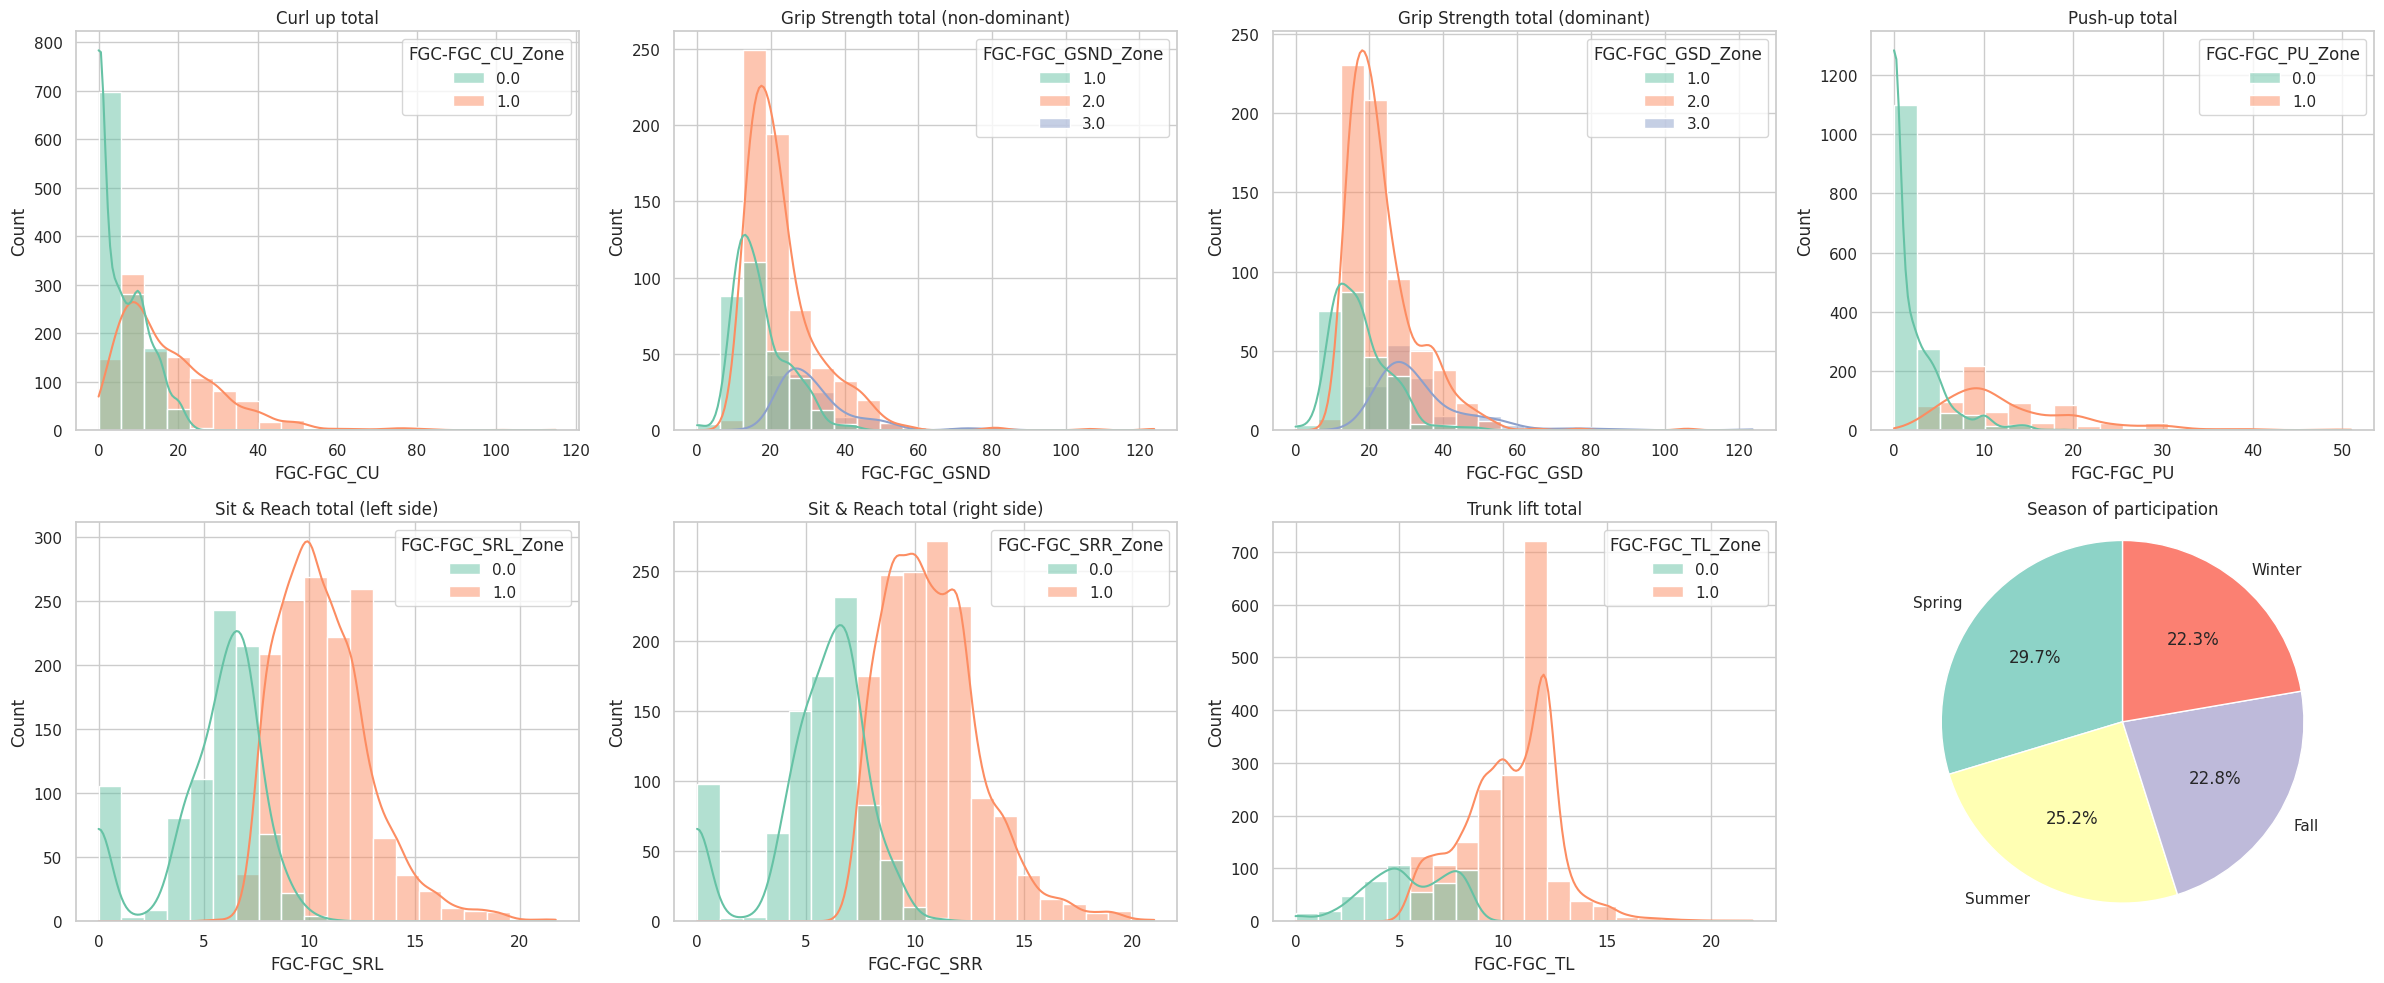

In [45]:
# Phân bố của các thuộc tính
fgc_data_dict = data_dictionary[data_dictionary['Instrument'] == 'FitnessGram Child']

fgc_columns = []

for index, row in fgc_data_dict.iterrows():
    if '_Zone' not in row['Field']:
        measure_field = row['Field']
        measure_desc = row['Description']
        
        zone_field = measure_field + '_Zone'
        zone_row = fgc_data_dict[fgc_data_dict['Field'] == zone_field]
        
        if not zone_row.empty:
            zone_desc = zone_row['Description'].values[0]
            fgc_columns.append((measure_field, zone_field, measure_desc, zone_desc))
            
fig, axes = plt.subplots(2, 4, figsize=(24, 10))

for idx, (measure, zone, measure_desc, zone_desc) in enumerate(fgc_columns):
    row = idx // 4
    col = idx % 4
    
    sns.histplot(
        data=train, x=measure,
        hue=zone, bins=20, palette='Set2',
        ax=axes[row, col], kde=True
    )
    axes[row, col].set_title(f'{measure_desc}')

season_counts = train['FGC-Season'].value_counts(normalize=True)
axes[1, 3].pie(
    season_counts, labels=season_counts.index,
    autopct='%1.1f%%', startangle=90,
    colors=sns.color_palette("Set3")
)
axes[1, 3].set_title('Season of participation')
axes[1, 3].axis('equal') 

plt.tight_layout()
plt.show()

Phân phối dữ liệu cho thấy hầu hết các giá trị tập trung vào mức hiệu suất thấp

In [46]:
# Sự chồng chéo giữa các zone
def compute_min_max_by_sex(train, sex, fgc_columns):
    results = []
    
    for measure, zone, _, _ in fgc_columns:
        sorted_zones = sorted(train[zone].dropna().unique())
        
        for zone_value in sorted_zones:
            data = train[(train[zone] == zone_value) & 
                         (train['Basic_Demos-Sex'] == sex)][measure]
            
            if not data.empty:
                min_val, max_val = data.min(), data.max()
                results.append({
                    'Zone': int(zone_value),
                    'Measure': measure,
                    'Min-Max': f'{min_val} - {max_val}'
                })
    
    df = pd.DataFrame(results).pivot_table(
        index='Zone', columns='Measure', values='Min-Max', aggfunc='first'
    )
    
    return df

In [47]:
compute_min_max_by_sex(train, 'Male', fgc_columns)

Measure  FGC-FGC_CU   FGC-FGC_GSD  FGC-FGC_GSND  FGC-FGC_PU FGC-FGC_SRL  \
Zone                                                                      
0        0.0 - 23.0           NaN           NaN  0.0 - 19.0  0.0 - 7.75   
1        2.0 - 85.0    0.0 - 46.8    0.0 - 43.0  3.0 - 51.0  7.5 - 20.0   
2               NaN  12.7 - 106.0  12.6 - 106.4         NaN         NaN   
3               NaN  22.5 - 123.8   22.6 - 81.8         NaN         NaN   

Measure FGC-FGC_SRR  FGC-FGC_TL  
Zone                             
0         0.0 - 8.0   0.0 - 8.2  
1        7.0 - 19.0  5.5 - 21.0  
2               NaN         NaN  
3               NaN         NaN

In [48]:
compute_min_max_by_sex(train, 'Female', fgc_columns)

Measure   FGC-FGC_CU  FGC-FGC_GSD FGC-FGC_GSND  FGC-FGC_PU FGC-FGC_SRL  \
Zone                                                                     
0         0.0 - 17.0          NaN          NaN   0.0 - 6.0  0.0 - 11.0   
1        2.0 - 115.0   5.1 - 49.8   0.0 - 36.2  3.0 - 50.0  5.5 - 21.7   
2                NaN   9.5 - 65.2  9.0 - 124.0         NaN         NaN   
3                NaN  16.3 - 88.8  15.5 - 74.0         NaN         NaN   

Measure FGC-FGC_SRR  FGC-FGC_TL  
Zone                             
0        0.0 - 11.0   0.0 - 8.5  
1        8.5 - 21.0  5.5 - 22.0  
2               NaN         NaN  
3               NaN         NaN

In [49]:
# Male
results_male = []

for measure, zone, _, _ in fgc_columns:
    sorted_zones = sorted(train[zone].dropna().unique())
    for zone_value in sorted_zones:
        age_sex_data_by_zone = train[train[zone] == zone_value][
            ['Basic_Demos-Age', 'Basic_Demos-Sex', measure]
        ]
        unique_ages = age_sex_data_by_zone['Basic_Demos-Age'].dropna().unique()

        for age in sorted(unique_ages):
            age_sex_data = age_sex_data_by_zone[
                (age_sex_data_by_zone['Basic_Demos-Age'] == age) &
                (age_sex_data_by_zone['Basic_Demos-Sex'] == 'Male')
            ][measure]
            
            if not age_sex_data.empty:
                min_val, max_val = age_sex_data.min(), age_sex_data.max()
                results_male.append({
                    'Age': age,
                    'Sex': 'Male',
                    'Zone': zone_value,
                    'Measure': measure,
                    'Min-Max': f'{min_val} - {max_val}'
                })

df_male = pd.DataFrame(results_male).pivot_table(
    index=['Age', 'Sex', 'Zone'], columns='Measure', values='Min-Max', aggfunc='first'
)

df_male

Measure         FGC-FGC_CU   FGC-FGC_GSD  FGC-FGC_GSND   FGC-FGC_PU  \
Age Sex  Zone                                                         
5   Male 0.0     0.0 - 1.0           NaN           NaN    0.0 - 2.0   
         1.0    2.0 - 13.0           NaN           NaN    3.0 - 8.0   
6   Male 0.0     0.0 - 1.0           NaN           NaN    0.0 - 2.0   
         1.0    2.0 - 40.0           NaN           NaN   3.0 - 20.0   
7   Male 0.0     0.0 - 3.0           NaN           NaN    0.0 - 3.0   
         1.0    2.0 - 30.0           NaN           NaN   3.0 - 24.0   
8   Male 0.0     0.0 - 5.0           NaN           NaN    0.0 - 5.0   
         1.0    4.0 - 30.0           NaN           NaN   4.0 - 40.0   
9   Male 0.0    0.0 - 10.0           NaN           NaN    0.0 - 5.0   
         1.0    6.0 - 43.0   11.1 - 11.1           NaN   5.0 - 30.0   
         2.0           NaN   13.3 - 13.3   12.7 - 13.1          NaN   
10  Male 0.0    0.0 - 11.0           NaN           NaN    0.0 - 6.0   
         1.0    9.0 - 75.0    0.0 - 16.1    0.0 - 15.1   6.0 - 37.0   
         2.0           NaN   12.7 - 44.0   12.6 - 34.0          NaN   
         3.0           NaN   25.9 - 29.3   22.9 - 50.2          NaN   
11  Male 0.0    0.0 - 14.0           NaN           NaN    0.0 - 7.0   
         1.0   12.0 - 50.0    6.3 - 24.6    8.6 - 24.6   7.0 - 50.0   
         2.0           NaN   12.8 - 35.4   12.7 - 49.0          NaN   
         3.0           NaN   22.5 - 53.6   22.6 - 49.8          NaN   
12  Male 0.0    0.0 - 17.0           NaN           NaN    0.0 - 9.0   
         1.0   15.0 - 45.0    9.9 - 40.6    9.9 - 41.8   8.0 - 30.0   
         2.0           NaN   13.1 - 49.0   12.6 - 48.2          NaN   
         3.0           NaN   22.8 - 46.8   23.0 - 41.7          NaN   
13  Male 0.0    0.0 - 20.0           NaN           NaN   0.0 - 19.0   
         1.0   18.0 - 80.0   11.3 - 37.2    8.9 - 31.4  10.0 - 40.0   
         2.0           NaN   19.1 - 47.8   17.7 - 45.6          NaN   
         3.0           NaN   32.5 - 42.2   31.6 - 42.6          NaN   
14  Male 0.0    0.0 - 23.0           NaN           NaN   0.0 - 13.0   
         1.0   24.0 - 80.0   12.8 - 46.8   11.5 - 43.0  13.0 - 37.0   
         2.0           NaN   19.7 - 42.9   20.2 - 56.8          NaN   
         3.0           NaN   31.5 - 79.2   31.8 - 81.8          NaN   
15  Male 0.0    0.0 - 23.0           NaN           NaN   0.0 - 14.0   
         1.0   24.0 - 85.0    0.0 - 43.4    0.0 - 39.4  15.0 - 49.0   
         2.0           NaN   22.6 - 76.8   17.5 - 80.4          NaN   
         3.0           NaN   28.1 - 49.6   33.6 - 47.1          NaN   
16  Male 0.0    0.0 - 23.0           NaN           NaN   0.0 - 15.0   
         1.0   24.0 - 64.0   16.1 - 32.3   15.3 - 32.0  16.0 - 39.0   
         2.0           NaN   29.2 - 47.9   21.6 - 46.6          NaN   
         3.0           NaN   46.6 - 57.6   44.0 - 47.4          NaN   
17  Male 0.0    0.0 - 22.0           NaN           NaN   0.0 - 15.0   
         1.0   24.0 - 78.0   11.1 - 32.3   12.4 - 31.9  18.0 - 47.0   
         2.0           NaN  17.8 - 106.0  30.4 - 106.4          NaN   
         3.0           NaN  34.4 - 123.8   33.3 - 53.7          NaN   
18  Male 0.0    0.0 - 23.0           NaN           NaN   5.0 - 14.0   
         1.0   25.0 - 40.0           NaN   28.4 - 33.8  23.0 - 51.0   
         2.0           NaN   24.4 - 52.0   20.2 - 42.1          NaN   
         3.0           NaN   28.4 - 28.4   23.4 - 52.7          NaN   
19  Male 0.0    8.0 - 20.0           NaN           NaN    8.0 - 8.0   
         1.0           NaN   23.9 - 31.1   26.0 - 26.1  18.0 - 18.0   
20  Male 0.0           NaN           NaN           NaN  17.0 - 17.0   
         1.0   34.0 - 34.0           NaN           NaN          NaN   
         3.0           NaN   56.8 - 56.8   52.5 - 52.5          NaN   
21  Male 0.0   20.0 - 20.0           NaN           NaN  11.0 - 11.0   
         1.0   30.0 - 30.0           NaN   23.3 - 23.3  20.0 - 20.0   
         2.0           N

Các vùng thể lực này có sự chồng chéo lớn về phạm vi giá trị trong cùng một nhóm tuổi  
Ví dụ: ở tuổi 9, thực hiện 6 đến 10 lần gập bụng có thể thuộc Vùng 0 (Cần cải thiện) hoặc Vùng 1 (Vùng thể lực khỏe mạnh)  
Các tiêu chí phân loại vùng không rõ ràng và cụ thể
--> Không nên sử dụng trong quá trình xây dựng mô hình

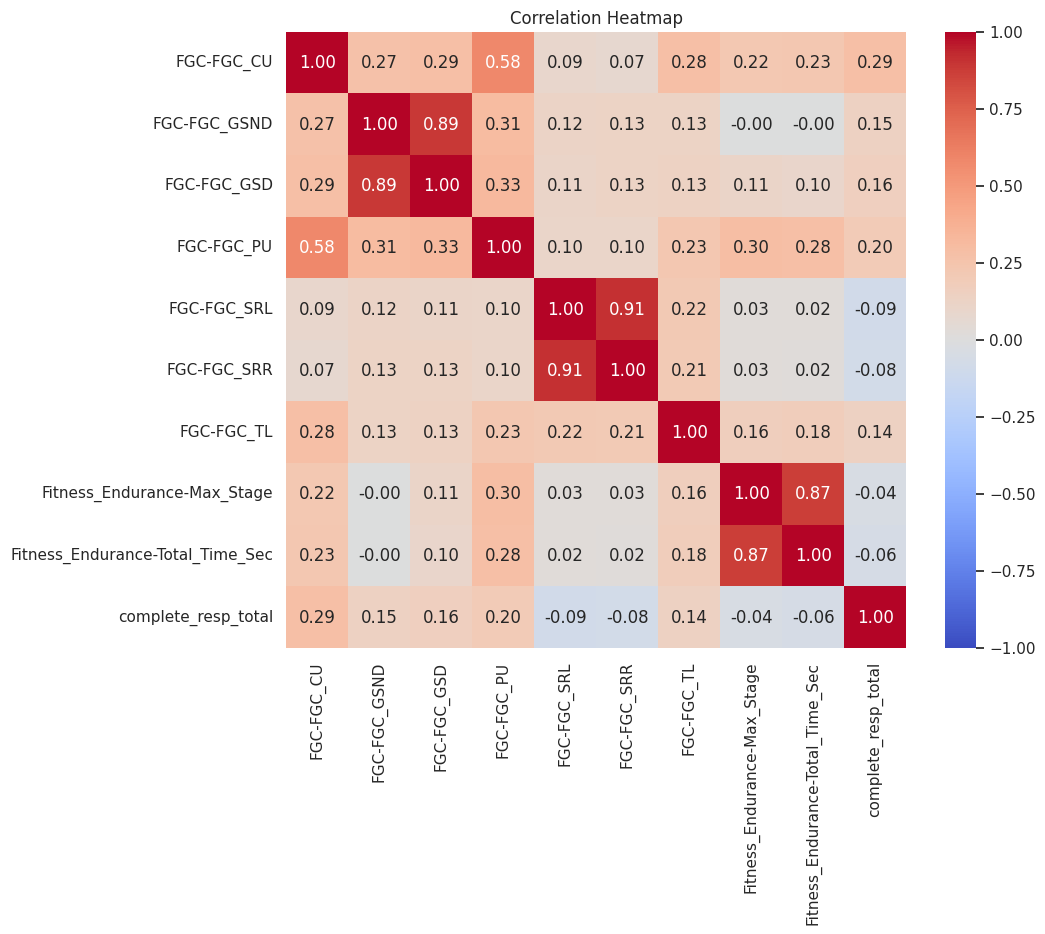

In [50]:
# Relationships with the target variable (PCIAT_Total for complete PCIAT responses)
cols = [col for col in train.columns if col.startswith('FGC-') 
        and 'Zone' not in col and 'Season' not in col]
cols.extend(['Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Total_Time_Sec'])

data_subset = train[cols + ['complete_resp_total']]

corr_matrix = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Một số bài kiểm tra thể chất có mối tương quan rõ rệt, như lực bóp tay và với tới chân.  
Hiệu suất thể chất (gập bụng, hít đất) lại liên quan tích cực đến mức độ PIU cao hơn, điều này ngược với kỳ vọng.  
**-->** Mối tương quan này chủ yếu bị chi phối bởi tuổi tác và dữ liệu không đủ đáng tin cậy để kết luận

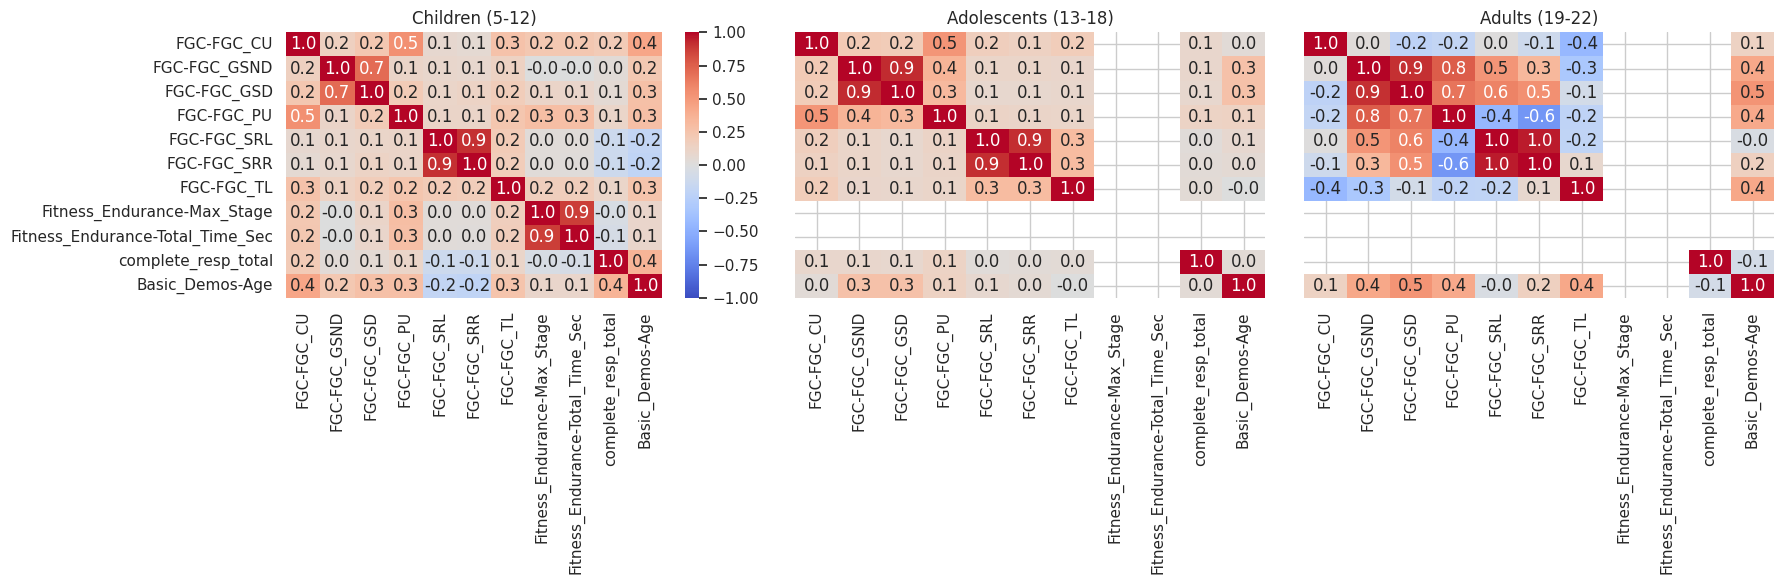

In [51]:
# Thêm tuổi vào để so sánh tương quan
age_groups = train['Age Group'].unique()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, age_group in enumerate(age_groups):
    group_data = train[train['Age Group'] == age_group]
    corr_matrix = group_data[cols + ['complete_resp_total', 'Basic_Demos-Age']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f',
                vmin=-1, vmax=1, ax=axes[i], cbar=i == 0)
    axes[i].set_title(f'{age_group}')

plt.tight_layout()
plt.show()

Ở các nhóm tuổi khác nhau, thể lực có mối tương quan tốt với tuổi, đặc biệt là đối với trẻ em

## Physical Activity Questionnaire
(Adolescents)  
PAQ_A-Season  
PAQ_A-PAQ_A_Total: mức độ hoạt động thể chất  

(Children)  
PAQ_C-Season  
PAQ_C-PAQ_A_Total: mức độ hoạt động thể chất    

In [52]:
data = train[train['PAQ_A-PAQ_A_Total'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for Adolescents (with PAQ_A_Total data):"
    f" {age_range.min()} - {age_range.max()} years"
)
data = train[train['PAQ_C-PAQ_C_Total'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for Children (with PAQ_C_Total data):"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for Adolescents (with PAQ_A_Total data): 13 - 18 years
Age range for Children (with PAQ_C_Total data): 7 - 17 years


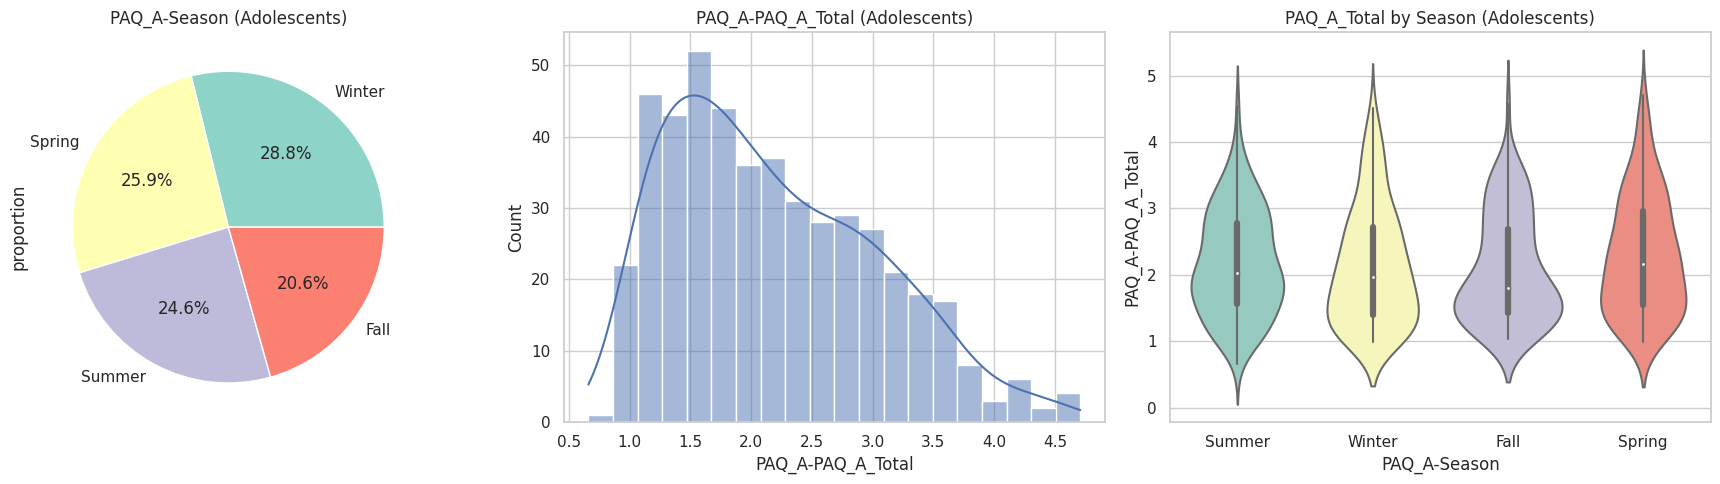

In [53]:
# Adolescents
plt.figure(figsize=(18, 5))

# PAQ_A-Season
plt.subplot(1, 3, 1)
train['PAQ_A-Season'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=plt.cm.Set3.colors
)
plt.title('PAQ_A-Season (Adolescents)')

# PAQ_A-PAQ_A_Total
plt.subplot(1, 3, 2)
sns.histplot(train['PAQ_A-PAQ_A_Total'], bins=20, kde=True)
plt.title('PAQ_A-PAQ_A_Total (Adolescents)')

# PAQ_A_Total by Season
plt.subplot(1, 3, 3)
sns.violinplot(x='PAQ_A-Season', y='PAQ_A-PAQ_A_Total', data=train, palette="Set3")
plt.title('PAQ_A_Total by Season (Adolescents)')

plt.tight_layout()
plt.show()

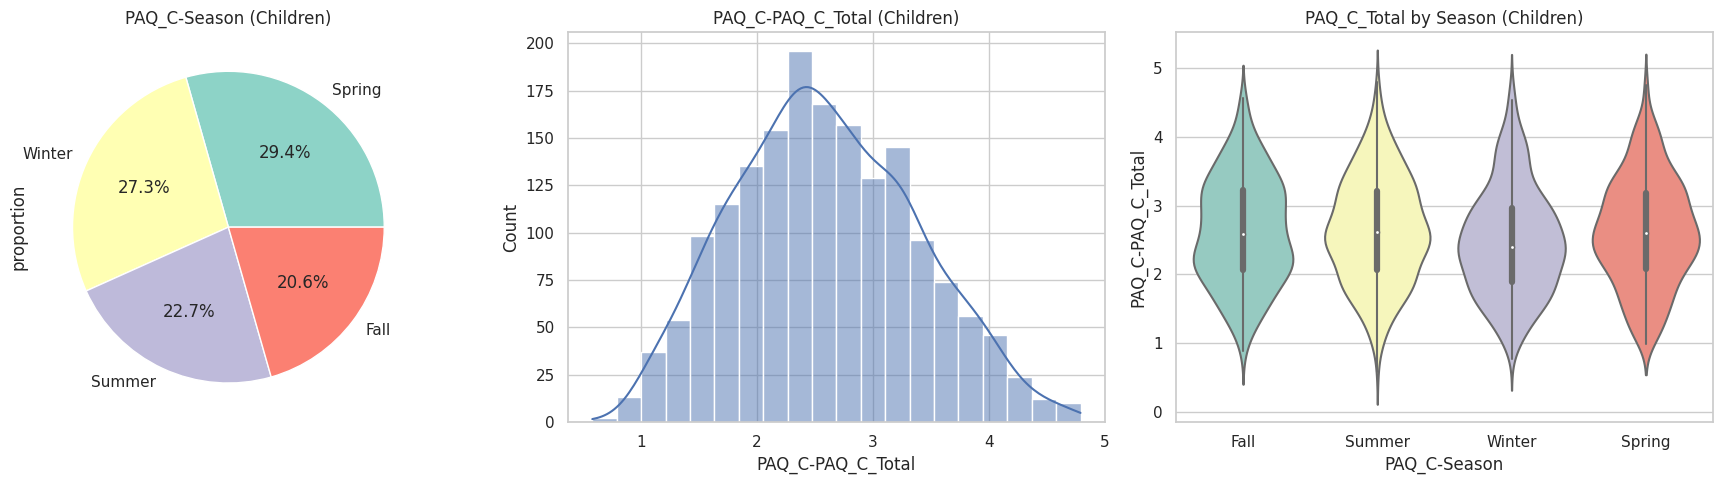

In [54]:
# Children
plt.figure(figsize=(18, 5))

# PAQ_C-Season
plt.subplot(1, 3, 1)
train['PAQ_C-Season'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=plt.cm.Set3.colors
)
plt.title('PAQ_C-Season (Children)')

# PAQ_C-PAQ_C_Total
plt.subplot(1, 3, 2)
sns.histplot(train['PAQ_C-PAQ_C_Total'], bins=20, kde=True)
plt.title('PAQ_C-PAQ_C_Total (Children)')

# PAQ_C_Total by Season
plt.subplot(1, 3, 3)
sns.violinplot(x='PAQ_C-Season', y='PAQ_C-PAQ_C_Total', data=train, palette="Set3")
plt.title('PAQ_C_Total by Season (Children)')

plt.tight_layout()
plt.show()

In [55]:
calculate_stats(train, ['PAQ_A-PAQ_A_Total'])

count      mean       std   min   25%   50%   75%   max  \
PAQ_A-PAQ_A_Total                                                            
PAQ_A-PAQ_A_Total  475.0  2.178853  0.849476  0.66  1.49  2.01  2.78  4.71   

                   missing  
PAQ_A-PAQ_A_Total           
PAQ_A-PAQ_A_Total     3485

In [56]:
calculate_stats(train, ['PAQ_C-PAQ_C_Total'])

count     mean       std   min   25%   50%   75%   max  \
PAQ_C-PAQ_C_Total                                                            
PAQ_C-PAQ_C_Total  1721.0  2.58955  0.783937  0.58  2.02  2.54  3.16  4.79   

                   missing  
PAQ_C-PAQ_C_Total           
PAQ_C-PAQ_C_Total     2239

Phân chia độ tuổi giữa trẻ em và thanh thiếu niên bị chồng lấn  
Dữ liệu bị thiếu nhiều trong các đặc tính này

In [57]:
# Check if any participants have data for both the children's PAQ (PAQ_C) and adolescents' PAQ (PAQ_A) columns
paq_columns = [col for col in train.columns if 'PAQ' in col]
train[(train['PAQ_A-PAQ_A_Total'].notnull()) &
      (train['PAQ_C-PAQ_C_Total'].notnull())][
    paq_columns + ['Basic_Demos-Age']
]

PAQ_A-Season  PAQ_A-PAQ_A_Total PAQ_C-Season  PAQ_C-PAQ_C_Total  \
3331       Summer               2.27       Spring               2.32   

      Basic_Demos-Age  
3331               13

Sẽ hợp lý nếu gộp 2 cột vào làm 1, và lấy trung bình nếu dữ liệu c

## Actigraphy
**series_{train|test}.parquet/id={id}:**  
Dữ liệu chuyển động từ đồng hồ đeo tay, ghi lại liên tục trong nhiều ngày, lưu theo từng người tham gia.  
**id:**  
Mã định danh duy nhất cho mỗi người tham gia, giống như mã trong các tệp train/test.  
**step:**  
Mỗi lần ghi dữ liệu là một bước thời gian liên tiếp, giúp sắp xếp dữ liệu theo thứ tự.  
**X, Y, Z:**  
Đo gia tốc trên 3 trục không gian, cho biết chuyển động của người đeo.  
**enmo:**  
ENMO (Euclidean Norm Minus One): Giá trị đo mức độ chuyển động tổng hợp.  
Ý nghĩa: Số cao - nhiều chuyển động; số bằng 0 - không có chuyển động.  
**anglez:**  
Góc của cánh tay so với mặt phẳng ngang, giúp xác định tư thế tay.  
**non-wear_flag:**  
Cờ nhận biết trạng thái đeo:  
0: Đồng hồ đang đeo.  
1: Đồng hồ không đeo.  
Ghi chú: Cần thêm thông tin về cách tính toán chỉ số này.  
**light:**  
Độ sáng môi trường (lux).  
Ý nghĩa: Giúp phân biệt hoạt động ban ngày và ban đêm hoặc trong nhà và ngoài trời.  
**battery_voltage:**  
Điện áp pin (mV).  
Ý nghĩa: Không quan trọng với mô hình, nhưng giúp phát hiện lỗi hoặc gián đoạn trong thu thập dữ liệu.  
**time_of_day:**  
Thời gian trong ngày (đơn vị nanosecond từ nửa đêm).  
Ghi chú: Mô tả ban đầu không chính xác, dữ liệu được tính theo nanosecond.  
**weekday:**  
Ngày trong tuần: 1 (Thứ Hai) đến 7 (Chủ Nhật).  
Ý nghĩa: Phân tích sự khác biệt hành vi giữa ngày thường và cuối tuần.  
**quarter:**  
Quý trong năm: 1 (Quý 1) đến 4 (Quý 4).  
Ý nghĩa: Tìm hiểu xu hướng hoạt động theo mùa.  
**relative_date_PCIAT:**  
Số ngày (dương/âm) so với ngày thực hiện bài kiểm tra PCIAT.  
Ý nghĩa: Giúp đánh giá tác động của thời gian thu thập dữ liệu đối với kết quả bài kiểm tra.  

In [58]:
actigraphy = pl.read_parquet('/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=029a19c9/part-0.parquet')
actigraphy

shape: (368_388, 13)
┌────────┬───────────┬───────────┬───────────┬───┬──────────────┬─────────┬─────────┬──────────────┐
│ step   ┆ X         ┆ Y         ┆ Z         ┆ … ┆ time_of_day  ┆ weekday ┆ quarter ┆ relative_dat │
│ ---    ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---          ┆ ---     ┆ ---     ┆ e_PCIAT      │
│ u32    ┆ f32       ┆ f32       ┆ f32       ┆   ┆ i64          ┆ i8      ┆ i8      ┆ ---          │
│        ┆           ┆           ┆           ┆   ┆              ┆         ┆         ┆ f32          │
╞════════╪═══════════╪═══════════╪═══════════╪═══╪══════════════╪═════════╪═════════╪══════════════╡
│ 0      ┆ -0.779873 ┆ -0.507651 ┆ 0.153591  ┆ … ┆ 442200000000 ┆ 2       ┆ 1       ┆ 0.0          │
│        ┆           ┆           ┆           ┆   ┆ 00           ┆         ┆         ┆              │
│ 1      ┆ -0.781493 ┆ -0.058459 ┆ 0.285575  ┆ … ┆ 442250000000 ┆ 2       ┆ 1       ┆ 0.0          │
│        ┆           ┆           ┆           ┆   ┆ 00           ┆         ┆         ┆              │
│ 2      ┆ -0.757986 ┆ -0.215373 ┆ 0.322516  ┆ … ┆ 442300000000 ┆ 2       ┆ 1       ┆ 0.0          │
│        ┆           ┆           ┆           ┆   ┆ 00           ┆         ┆         ┆              │
│ 3      ┆ -0.310874 ┆ -0.415939 ┆ -0.531955 ┆ … ┆ 442350000000 ┆ 2       ┆ 1       ┆ 0.0          │
│        ┆           ┆           ┆           ┆   ┆ 00           ┆         ┆         ┆              │
│ 4      ┆ -0.798744 ┆ -0.277628 ┆ -0.24977  ┆ … ┆ 442400000000 ┆ 2       ┆ 1       ┆ 0.0          │
│        ┆           ┆           ┆           ┆   ┆ 00           ┆         ┆         ┆              │
│ …      ┆ …         ┆ …         ┆ …         ┆ … ┆ …            ┆ …       ┆ …       ┆ …            │
│ 368383 ┆ 0.026135  ┆ 0.05139   ┆ -0.987359 ┆ … ┆ 717350000000 ┆ 2       ┆ 1       ┆ 21.0         │
│        ┆           ┆           ┆           ┆   ┆ 00           ┆         ┆         ┆              │
│ 368384 ┆ 0.026462  ┆ 0.051178  ┆ -0.987398 ┆ … ┆ 717400000000 ┆ 2       ┆ 1       ┆ 21.0         │
│        ┆           ┆           ┆           ┆   ┆ 00           ┆         ┆         ┆              │
│ 368385 ┆ 0.026292  ┆ 0.051311  ┆ -0.987217 ┆ … ┆ 717450000000 ┆ 2       ┆ 1       ┆ 21.0         │
│        ┆           ┆           ┆           ┆   ┆ 00           ┆         ┆         ┆              │
│ 368386 ┆ 0.026109  ┆ 0.051178  ┆ -0.987437 ┆ … ┆ 717500000000 ┆ 2       ┆ 1       ┆ 21.0         │
│        ┆           ┆           ┆           ┆   ┆ 00           ┆         ┆         ┆              │
│ 368387 ┆ 0.026566  ┆ 0.051138  ┆ -0.987736 ┆ … ┆ 717550000000 ┆ 2       ┆ 1       ┆ 21.0         │
│        ┆           ┆           ┆           ┆   ┆ 00           ┆         ┆         ┆              │
└────────┴───────────┴───────────┴───────────┴───┴──────────────┴─────────┴─────────┴──────────────┘

In [59]:
def plot_series_data(df, col='non-wear_flag',
                     label='Worn (0 = Worn, 1 = Not Worn)',
                     title='Non-Wear Flag',
                     x_col='day_time', x_label='Day Relative to PCIAT + Time'):
    plt.figure(figsize=(18, 12))
    
    # ENMO
    plt.subplot(4, 1, 1)
    plt.scatter(df[x_col], df['enmo'], label='ENMO', color='green', s=1)
    plt.title('ENMO (Euclidean Norm Minus One)')
    plt.ylabel('Movement Intensity')

    # Angle Z
    plt.subplot(4, 1, 2)
    plt.scatter(df[x_col], df['anglez'], label='Angle Z', color='blue', s=1)
    plt.title('Angle Z')
    plt.ylabel('Angle (degrees)')

    # Light
    plt.subplot(4, 1, 3)
    plt.scatter(df[x_col], df['light'], label='Light', color='orange', s=1)
    plt.title('Ambient Light')
    plt.ylabel('Light (lux)')

    # Any other column
    plt.subplot(4, 1, 4)
    plt.scatter(df[x_col], df[col], label=col, color='red', s=1)
    plt.title(f'{title}')
    plt.ylabel(f'{label}')
    plt.xlabel(f'{x_label}')

    plt.tight_layout()
    plt.show()

### Preview 1 sample

In [60]:
# Phân tích thông tin của một người tham gia
path = "/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=029a19c9/part-0.parquet"
participant_id = path.split('/')[-2].split('=')[-1]
train[train['id'] == participant_id]

id Basic_Demos-Enroll_Season  Basic_Demos-Age Basic_Demos-Sex  \
48  029a19c9                    Winter               17          Female   

   CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  \
48      Spring             54.0          Spring     32.084107   

    Physical-Height  Physical-Weight  ...  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
48            64.25            188.4  ...               32.0             46.0   

    PreInt_EduHx-Season  PreInt_EduHx-computerinternet_hoursday       sii  \
48               Winter                                     3.0  1 (Mild)   

    complete_resp_total            Age Group  internet_use_encoded  \
48                 34.0  Adolescents (13-18)             > 3hs/day   

                                       CGAS_Score_Bin  \
48  51-60: Variable functioning with sporadic diff...   

    Fitness_Endurance-Total_Time_Sec  
48                               NaN  

[1 rows x 87 columns]

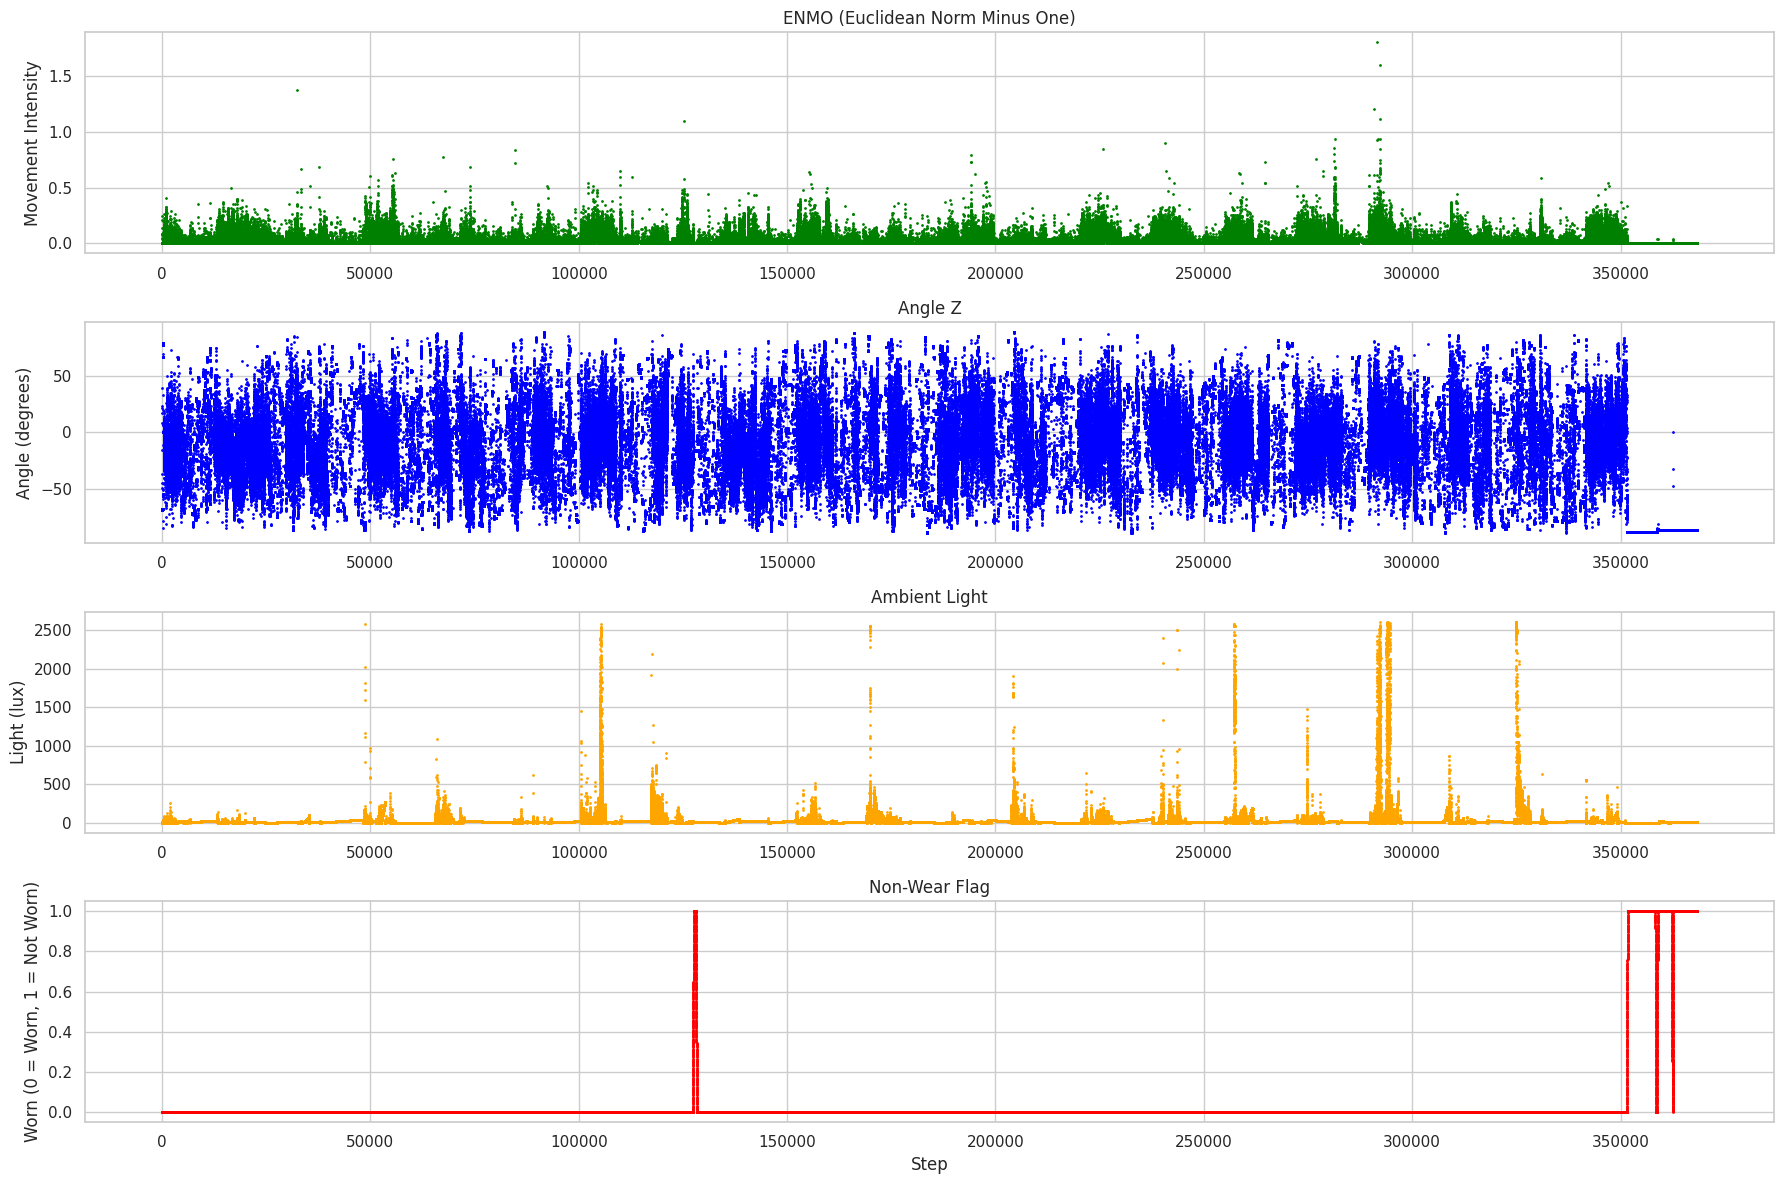

In [61]:
series_train = pd.read_parquet(path)
plot_series_data(series_train, x_col='step', x_label='Step')

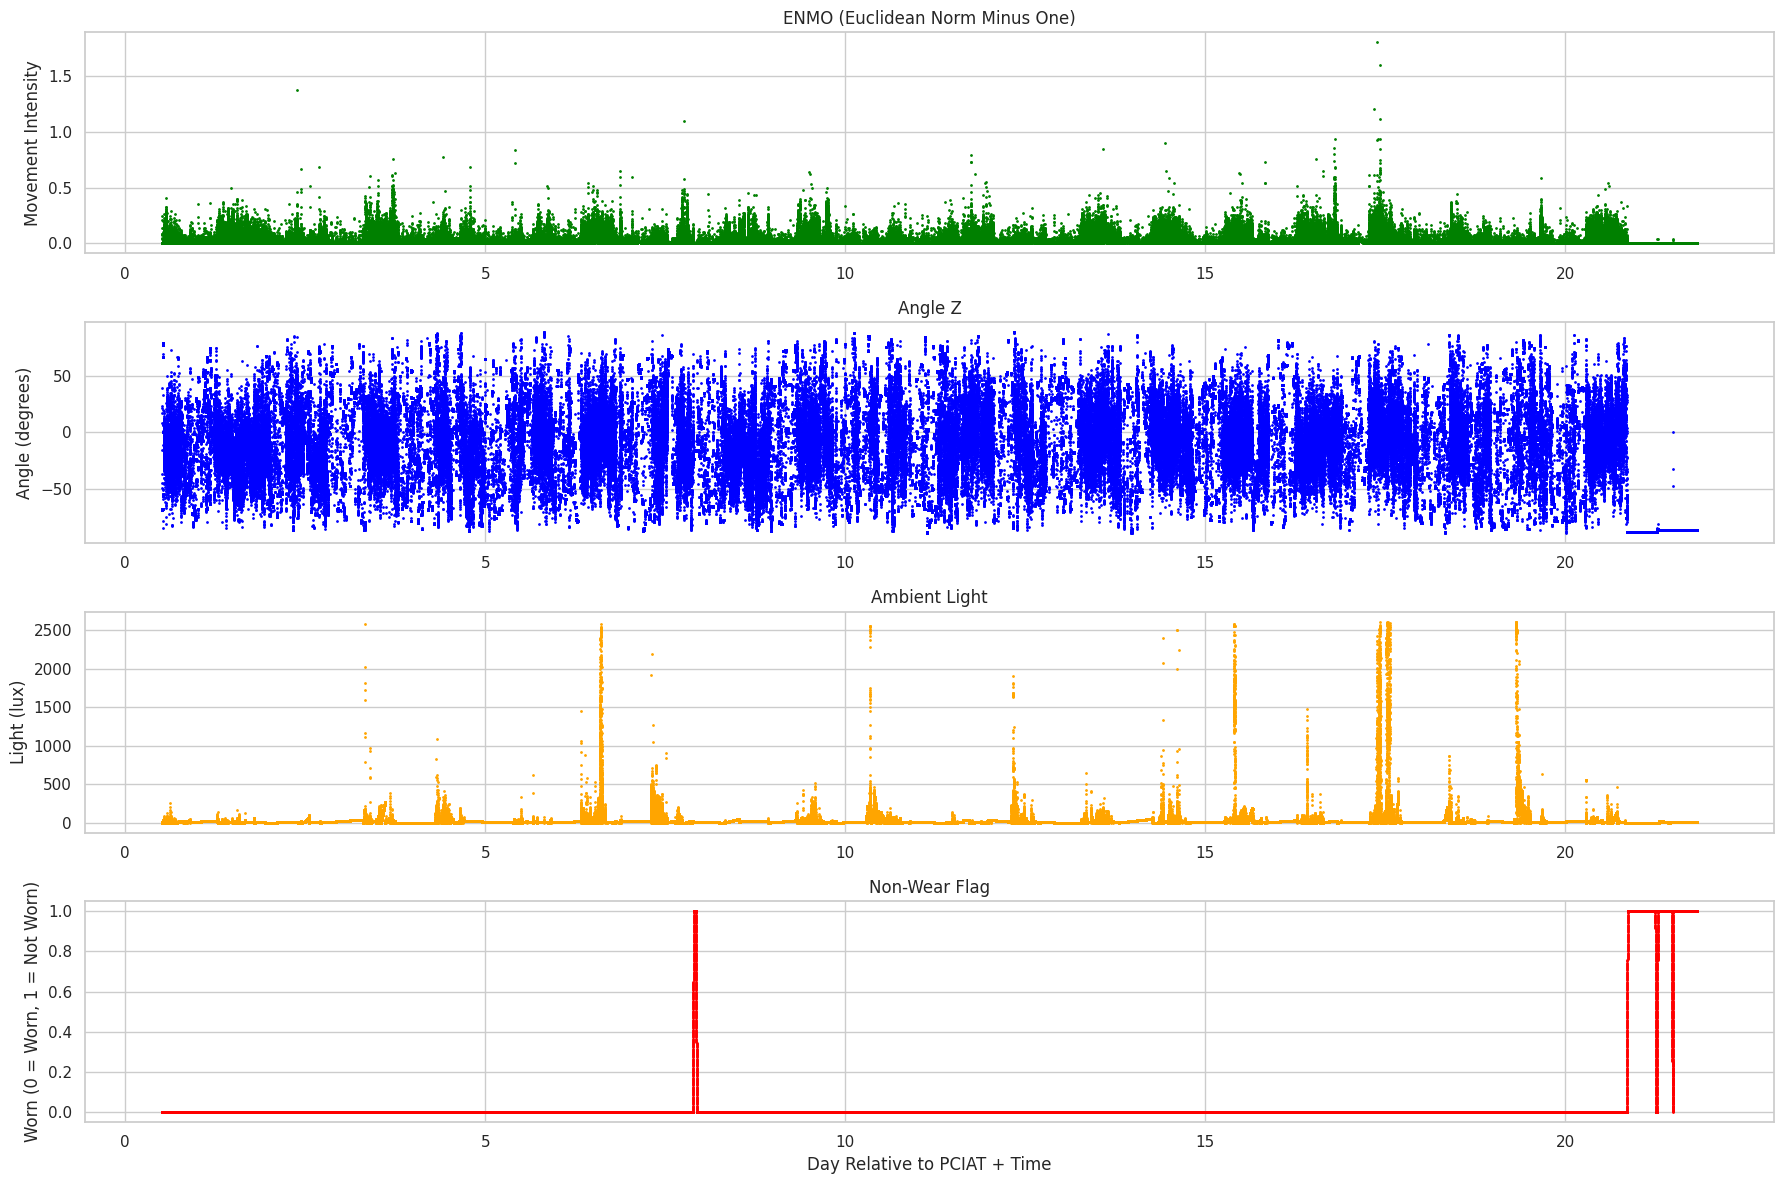

In [62]:
# Chuyển trục x từ step về số giờ
series_train['time_of_day_hours'] = (
    series_train['time_of_day'] / 1e9 / 3600 #nanoseconds to hours
)
series_train['day_time'] = series_train['relative_date_PCIAT'] + (
    series_train['time_of_day_hours'] / 24
)
plot_series_data(series_train, x_col='day_time', x_label='Day Relative to PCIAT + Time')

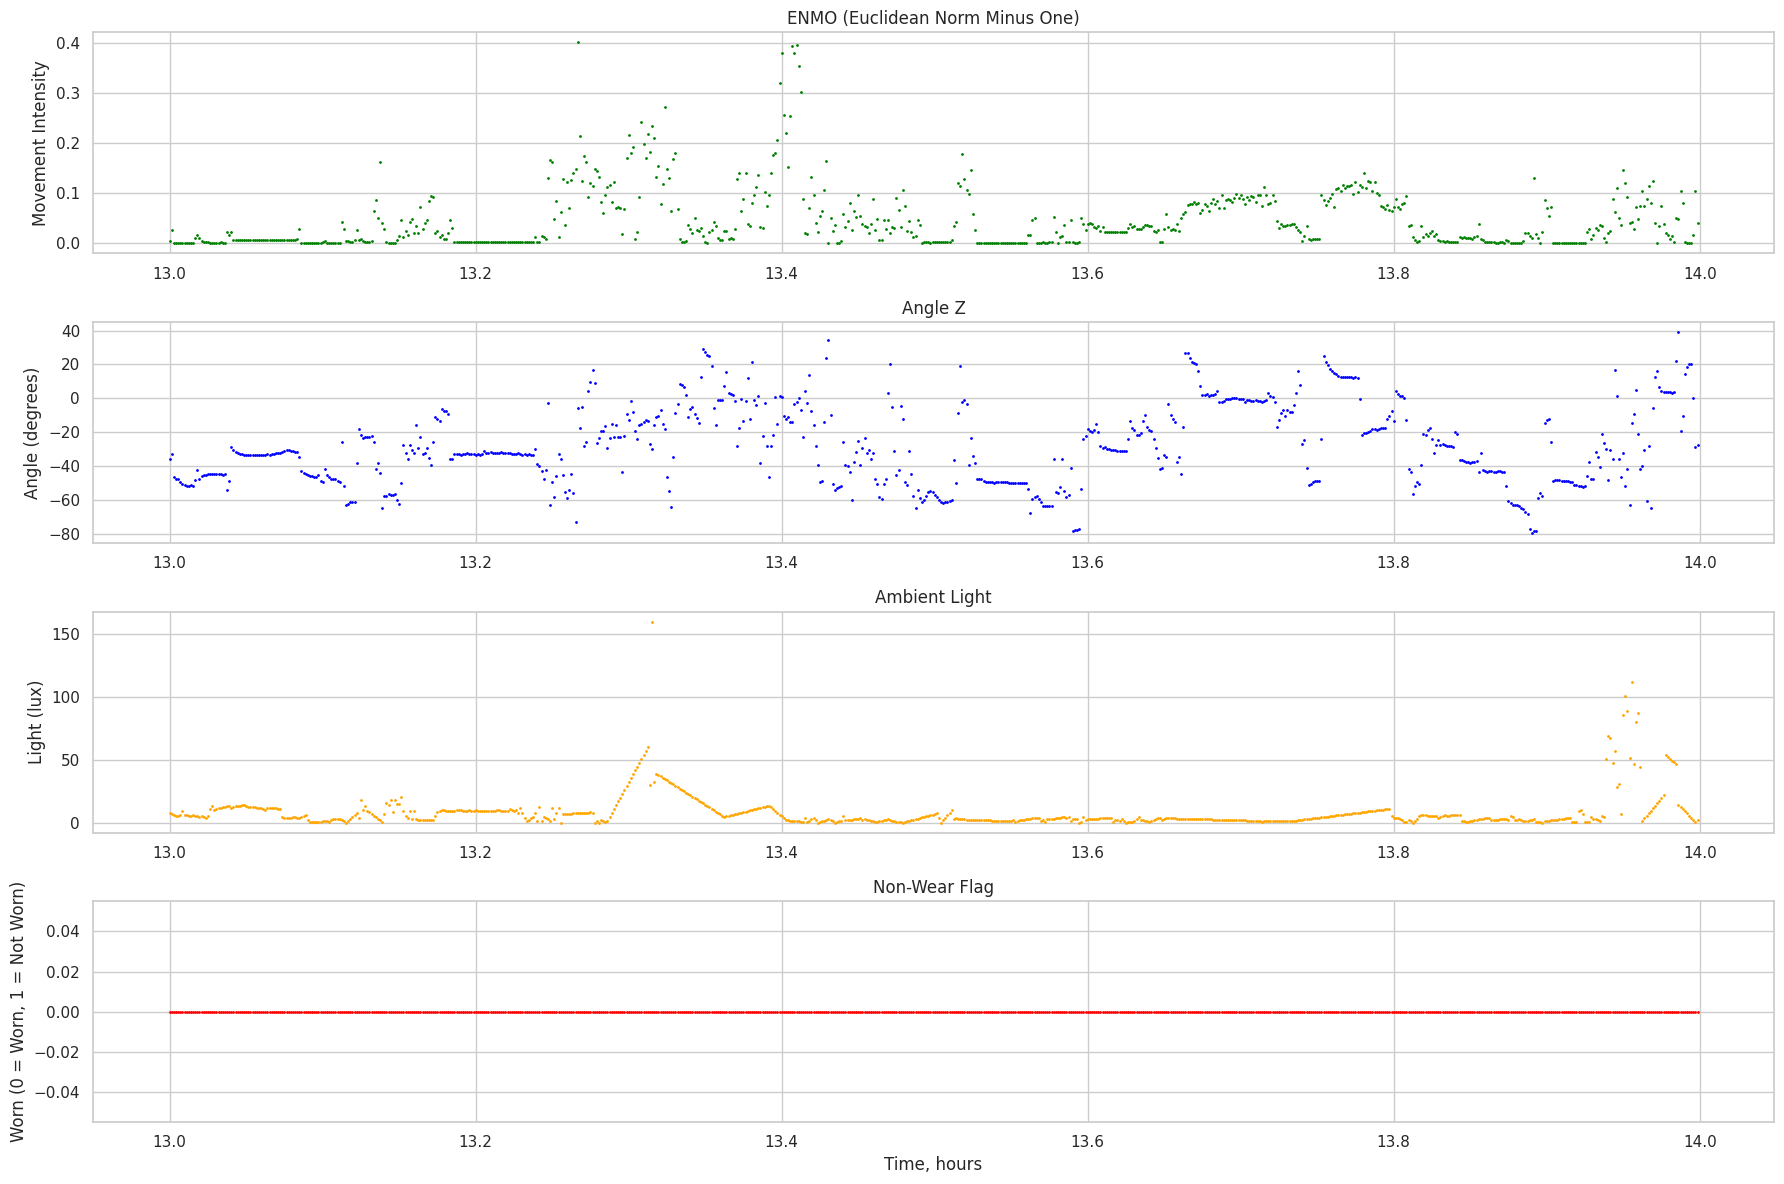

In [63]:
# Xem biểu đồ vào thời gian cụ thể
show_day = 2 # show second day
hour_from = 13 # starting from 1 pm
hour_to = 14 # to 2 pm

show_day = min(series_train['relative_date_PCIAT']) + show_day - 1
filtered_data = series_train[
    (series_train['relative_date_PCIAT'] == show_day) &
    (series_train['time_of_day_hours'] >= hour_from) & 
    (series_train['time_of_day_hours'] < hour_to)
].copy()

plot_series_data(filtered_data, x_col='time_of_day_hours', x_label='Time, hours')

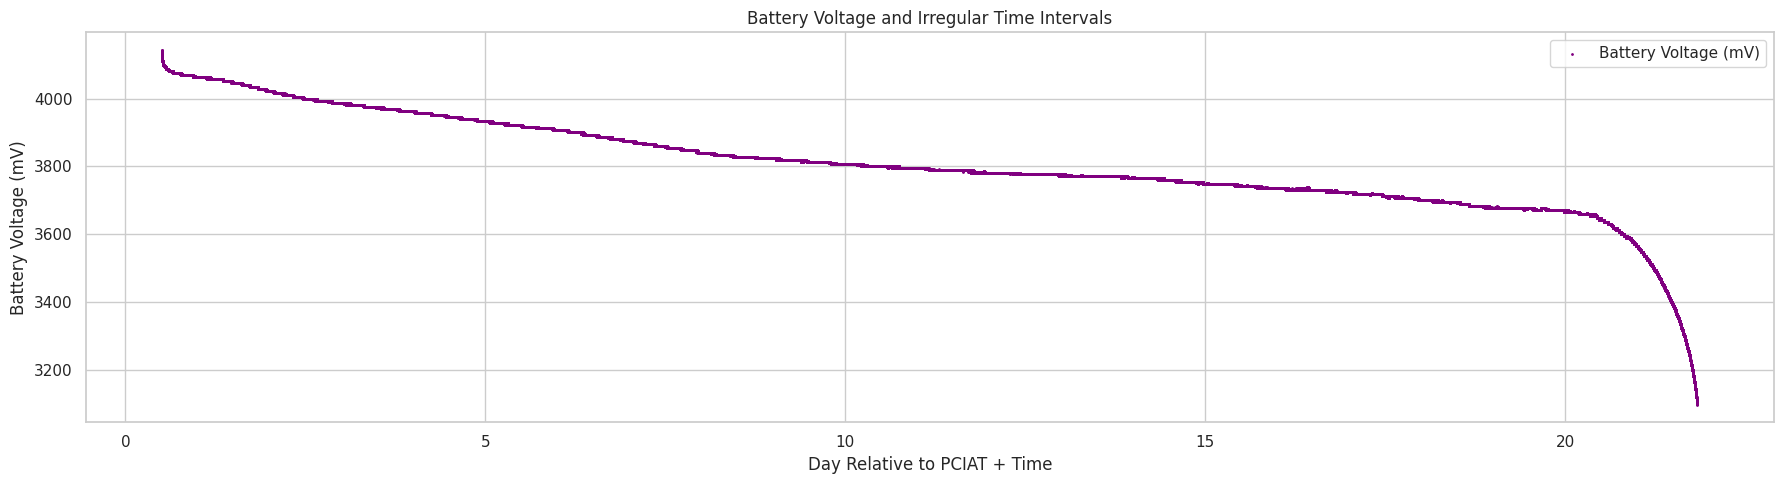

In [64]:
# Check pin thiết bị
plt.figure(figsize=(18, 5))

plt.scatter(series_train['day_time'], series_train['battery_voltage'], 
            color='purple', label='Battery Voltage (mV)', s=1)

plt.xlabel('Day Relative to PCIAT + Time')
plt.ylabel('Battery Voltage (mV)')
plt.title('Battery Voltage and Irregular Time Intervals')
plt.legend()

plt.tight_layout()
plt.show()

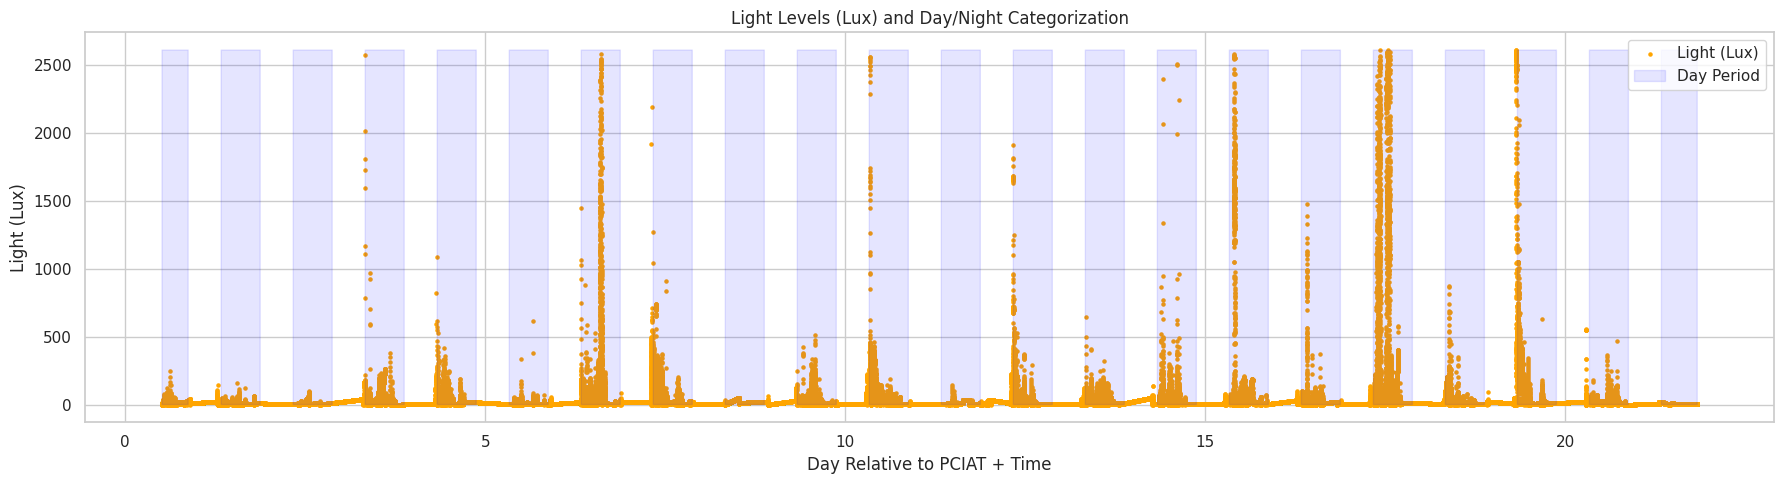

In [65]:
# Use the time data to categorize the day and night. Daytime is set between 8 AM and 9 PM.
day_start_hour = 8
day_end_hour = 21

series_train['day_period'] = np.where(
    (series_train['time_of_day_hours'] >= day_start_hour) &
    (series_train['time_of_day_hours'] < day_end_hour),
    'day', 'night'
)
plt.figure(figsize=(18, 5))

plt.scatter(series_train['day_time'], series_train['light'], label='Light (Lux)', 
         color='orange', s=5)

plt.fill_between(series_train['day_time'],
                 0, series_train['light'].max(),
                 where=(series_train['day_period'] == 'day'),
                 color='blue', alpha=0.1, label='Day Period')

plt.title('Light Levels (Lux) and Day/Night Categorization')
plt.ylabel('Light (Lux)')
plt.xlabel('Day Relative to PCIAT + Time')
plt.legend()

plt.tight_layout()
plt.show()

In [66]:
# Time difference between steps
expected_diff = 5

series_train['time_diff'] = (series_train['day_time'].diff() * 86400).round(0) # seconds in a day
series_train['measurement_after_gap'] = series_train['time_diff'] == expected_diff
series_train['measurement_after_gap'].value_counts()

measurement_after_gap
True     368387
False         1
Name: count, dtype: int64

In [67]:
series_train['time_diff'].describe()

count    368387.0
mean          5.0
std           0.0
min           5.0
25%           5.0
50%           5.0
75%           5.0
max           5.0
Name: time_diff, dtype: float64

### Phân tích chung

In [68]:
DIR = '/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet'

def process_file(file_path, participant_id):
    data = pd.read_parquet(file_path)
    non_wear_percentage = (data['non-wear_flag'].sum() / len(data)) * 100
    worn_data = data[data['non-wear_flag'] == 0]

    return {
        'id': participant_id,
        'non_wear_percentage': non_wear_percentage,
        'enmo_stats': worn_data['enmo'].describe(),
        'anglez_stats': worn_data['anglez'].describe(),
        'light_stats': worn_data['light'].describe(),
        'battery_voltage_stats': worn_data['battery_voltage'].describe(),
        'unique_days': worn_data['relative_date_PCIAT'].nunique()
    }

results = []
for participant_id in os.listdir(DIR):
    file_path = os.path.join(DIR, participant_id, 'part-0.parquet')
    result = process_file(file_path, participant_id)
    results.append(result)

In [69]:
len(results)

996

In [70]:
# Thống kê về các chỉ số của mỗi người
final_results = []
for result in results:
    flat_row = {
        'id': result['id'].replace('id=', ''),
        'non_wear_percentage': result['non_wear_percentage'],
        'unique_days': result['unique_days']
    }
    
    for key, stats in result.items():
        if isinstance(stats, pd.Series):
            for stat_name, stat_value in stats.items():
                flat_row[f'{key.replace("_stats", "")}_{stat_name}'] = stat_value
    
    final_results.append(flat_row)
    
stats_df = pd.DataFrame(final_results)
stats_df

id  non_wear_percentage  unique_days  enmo_count  enmo_mean  \
0    0745c390             0.000000           37     50458.0   0.045252   
1    eaab7a96             4.650835           21    323849.0   0.030345   
2    8ec2cc63             0.000000           20     40003.0   0.056544   
3    b2987a65             0.000000           25    223915.0   0.053544   
4    7b8842c3             0.000000           35     15420.0   0.040399   
..        ...                  ...          ...         ...        ...   
991  cd68643b             0.548045           24    391431.0   0.038824   
992  f8ff0bc8             0.000000           23      1195.0   0.036847   
993  db23fbe4            22.233742           24    301058.0   0.035017   
994  687c85e7             0.000000            3     40085.0   0.037183   
995  5f099188            74.929015           19     75263.0   0.006396   

     enmo_std  enmo_min  enmo_25%  enmo_50%  enmo_75%  ...  light_75%  \
0    0.132576       0.0  0.007953  0.019257  0.036048  ...  24.750000   
1    0.099080       0.0  0.000405  0.006128  0.021883  ...  26.543808   
2    0.140594       0.0  0.005643  0.018467  0.048282  ...  21.022933   
3    0.103401       0.0  0.009947  0.027653  0.057278  ...   6.200000   
4    0.090201       0.0  0.005364  0.024135  0.043690  ...   4.942201   
..        ...       ...       ...       ...       ...  ...        ...   
991  0.094089       0.0  0.001749  0.012130  0.039945  ...   5.858469   
992  0.068496       0.0  0.008236  0.024577  0.038638  ...  19.533333   
993  0.124221       0.0  0.000032  0.004363  0.019244  ...   5.326250   
994  0.064660       0.0  0.009702  0.020775  0.039810  ...  10.699164   
995  0.018010       0.0  0.000000  0.000095  0.007166  ...   3.206252   

       light_max  battery_voltage_count  battery_voltage_mean  \
0    2626.199951                50458.0           4027.514893   
1    2628.199951               323849.0           3825.719727   
2    2618.199951                40003.0           4106.425781   
3    2502.000000               223915.0           3958.604492   
4    1046.800049                15420.0           3992.347656   
..           ...                    ...                   ...   
991  2576.399902               391431.0           3850.750732   
992  1526.599976                 1195.0           4002.345703   
993  2592.199951               301058.0           3865.329346   
994  1875.199951                40085.0           4123.798828   
995  1196.599976                75263.0           3922.425781   

     battery_voltage_std  battery_voltage_min  battery_voltage_25%  \
0             108.451317          3829.000000          3958.000000   
1             166.158646          3098.166748          3724.000000   
2              50.734318          3853.000000          4089.625000   
3             122.706802          3468.000000          3841.000000   
4             126.121590          3815.083252          3837.333252   
..                   ...                  ...                  ...   
991           167.028320          3098.166748          3747.000000   
992           166.620529          3829.000000          3835.000000   
993           147.099747          3098.166748          3782.000000   
994            28.219002          4073.000000          4099.000000   
995           141.679626          3718.000000          3788.000000   

     battery_voltage_50%  battery_voltage_75%  battery_voltage_max  
0            4029.000000             4146.000               4187.0  
1            3813.000000             3947.000               4146.0  
2            4111.000000             4140.000               4183.0  
3            3947.000000             4064.000               6000.0  
4            4000.000000             4087.000               4199.0  
..                   ...                  ...                  ...  
991          3819.833252             3970.000               4191.0  
992          3964.000000             4181.000               4194.0  
99

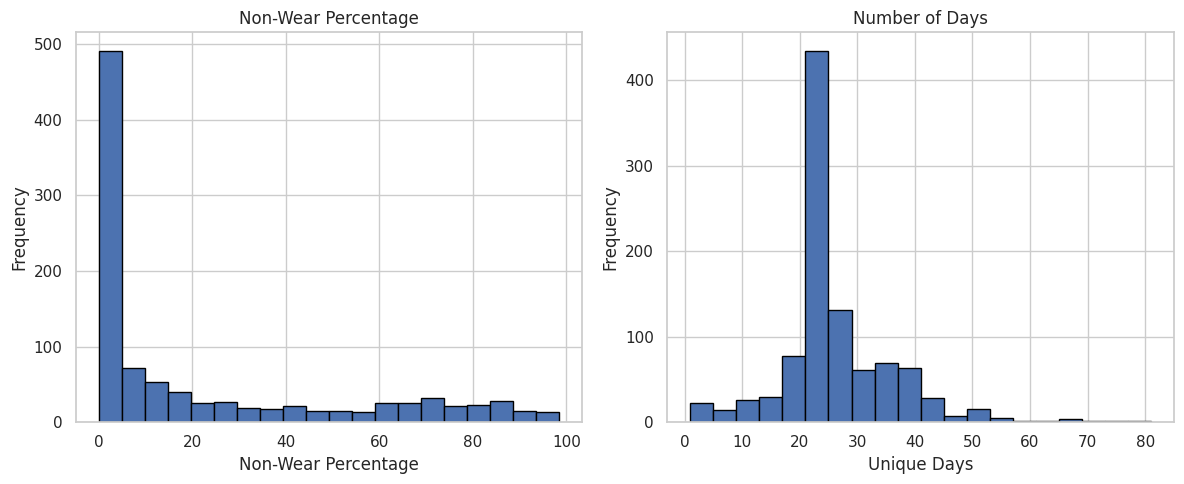

In [71]:
# Biểu đồ về việc sử dụng thiết bị
# non_wear_percentage
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(stats_df['non_wear_percentage'], bins=20, edgecolor='black')
plt.title('Non-Wear Percentage')
plt.xlabel('Non-Wear Percentage')
plt.ylabel('Frequency')

# unique_days
plt.subplot(1, 2, 2)
plt.hist(stats_df['unique_days'], bins=20, edgecolor='black')
plt.title('Number of Days')
plt.xlabel('Unique Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Có 996 người tham gia  
Hơn một nửa số đó là không tháo ra trong quá trình theo dõi  
Có những người thực sự đeo đến 80 ngày, khoảng 1 nửa chỉ đeo đến hơn 20 ngày

In [72]:
def plot_parameter_statistics(stats_df, parameter):
    stats_to_plot = ['min', 'max', '50%', 'std']
    stat_labels = ['Min', 'Max', 'Median', 'Std']

    plt.figure(figsize=(14, 5))

    for j, stat in enumerate(stats_to_plot):
        plt.subplot(1, 4, j + 1)
        
        data = stats_df[f'{parameter}_{stat}']
        plt.hist(data, bins=20, alpha=0.7, edgecolor='black')
        
        plt.title(f'{parameter.capitalize()} - {stat_labels[j]}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

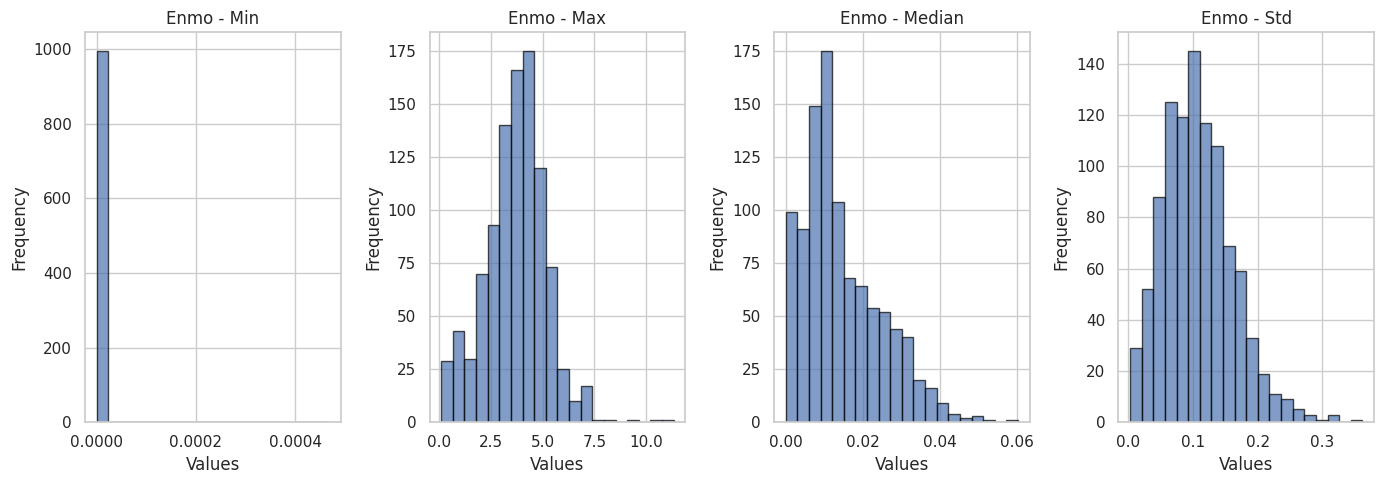

In [73]:
# ENMO
plot_parameter_statistics(stats_df, 'enmo')

Có những người max Enmo = 0 -> thực sự không di chuyển luôn

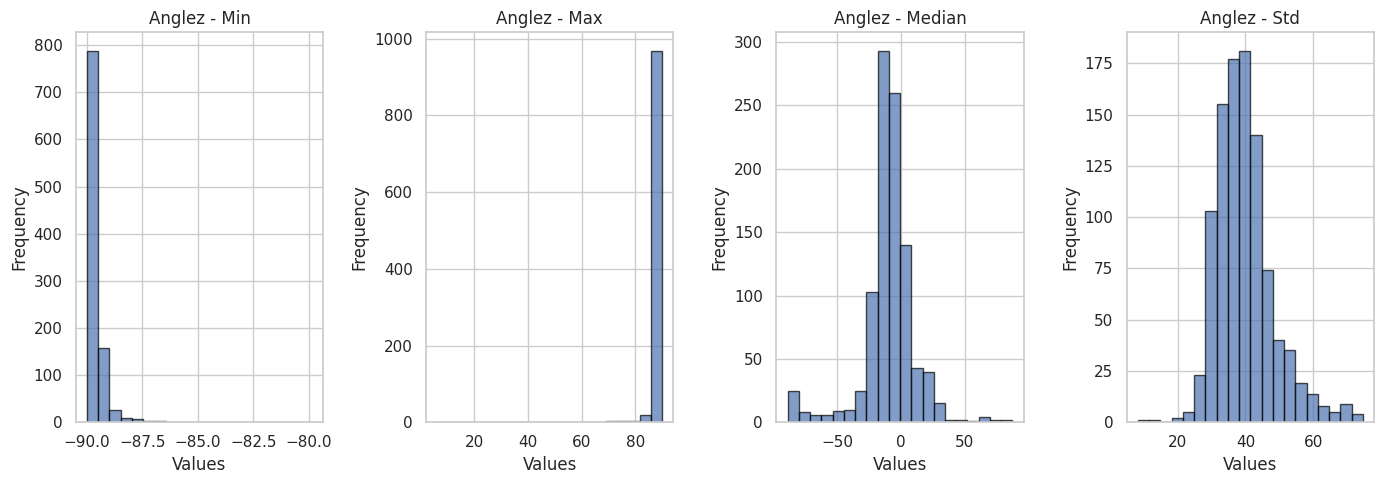

In [74]:
# AngleZ
plot_parameter_statistics(stats_df, 'anglez')

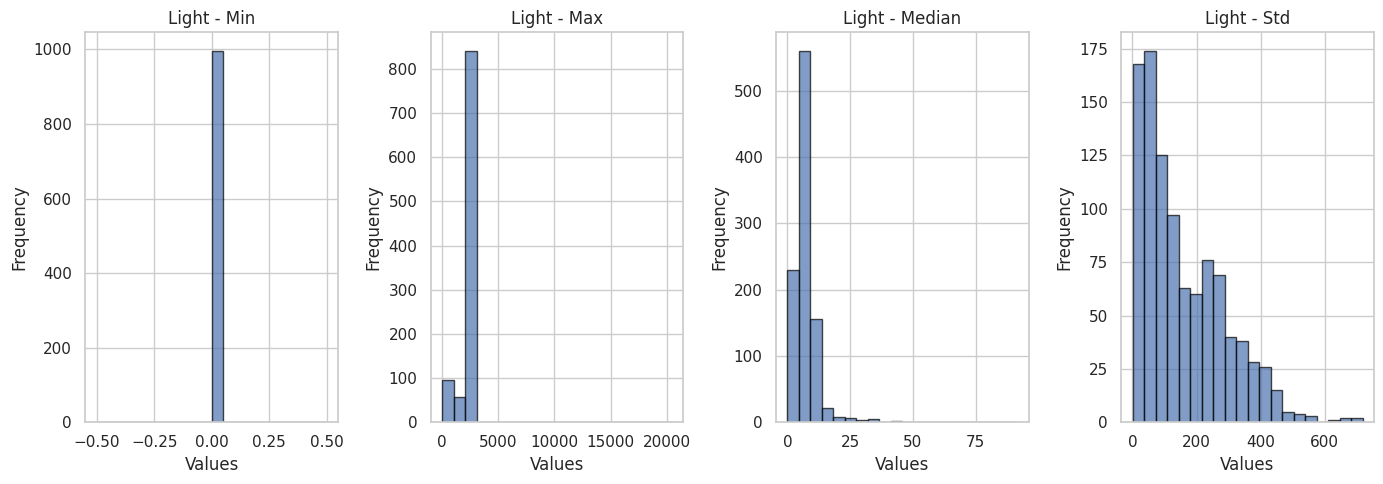

In [75]:
# Light
plot_parameter_statistics(stats_df, 'light')

Đa số là ở chỗ tối (trong nhà, bóng râm)

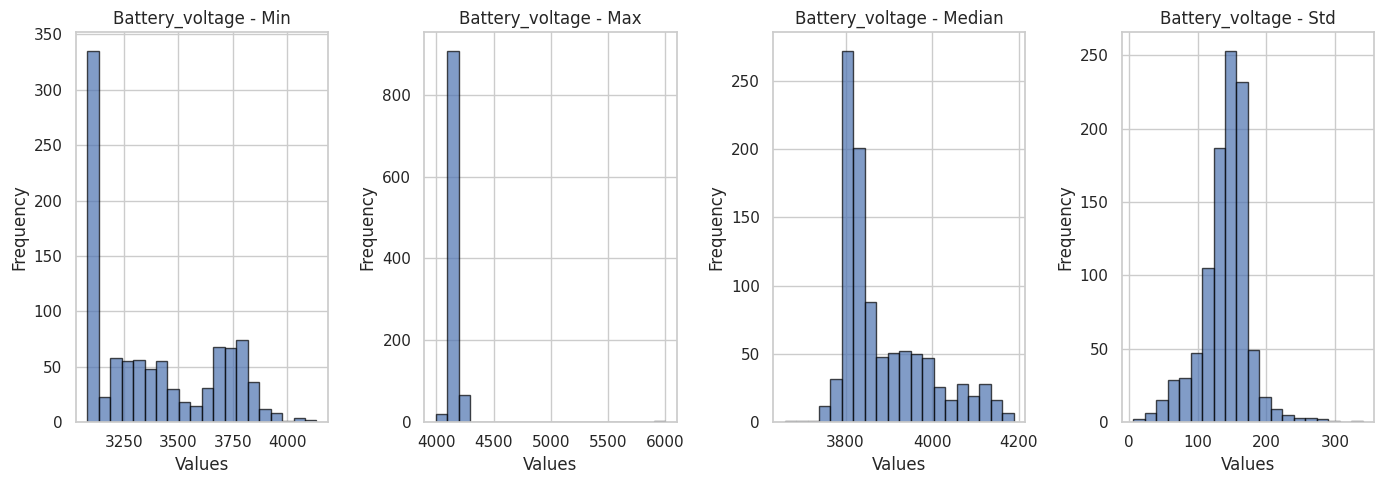

In [76]:
# Battery voltage
plot_parameter_statistics(stats_df, 'battery_voltage')

In [77]:
# Xem những bước được xác định là không chuyển động
worn_data = series_train[series_train['non-wear_flag'] == 0]
worn_data[worn_data['enmo'] == 0]

step         X         Y         Z  enmo     anglez  non-wear_flag  \
603        603 -0.935306 -0.306063 -0.078159   0.0  -4.506195            0.0   
604        604 -0.937813 -0.300503 -0.073774   0.0  -4.297520            0.0   
619        619 -0.943859 -0.243117 -0.171283   0.0  -9.924204            0.0   
1255      1255 -0.626270 -0.512534 -0.568260   0.0 -35.087368            0.0   
1256      1256 -0.625186 -0.513250 -0.569168   0.0 -35.096882            0.0   
...        ...       ...       ...       ...   ...        ...            ...   
358712  358712  0.053089 -0.048588 -0.987723   0.0 -85.888626            0.0   
358713  358713  0.053089 -0.048707 -0.988190   0.0 -85.895355            0.0   
358715  358715  0.053011 -0.048627 -0.987930   0.0 -85.856583            0.0   
358716  358716  0.052867 -0.048654 -0.988488   0.0 -85.904152            0.0   
362496  362496  0.026788 -0.042975 -0.989864   0.0 -87.008324            0.0   

            light  battery_voltage     time_of_day  weekday  quarter  \
603     10.216327      4093.000000  47235000000000        2        1   
604     10.263266      4093.000000  47240000000000        2        1   
619     10.967347      4093.000000  47315000000000        2        1   
1255    17.500000      4087.000000  50495000000000        2        1   
1256    17.000000      4087.000000  50500000000000        2        1   
...           ...              ...             ...      ...      ...   
358712   0.627532      3484.666748  23380000000000        2        1   
358713   0.627614      3484.500000  23385000000000        2        1   
358715   0.627776      3484.166748  23395000000000        2        1   
358716   0.627858      3484.000000  23400000000000        2        1   
362496   9.799012      3395.000000  42300000000000        2        1   

        relative_date_PCIAT  time_of_day_hours   day_time day_period  \
603                     0.0          13.120833   0.546701        day   
604                     0.0          13.122222   0.546759        day   
619                     0.0          13.143056   0.547627        day   
1255                    0.0          14.026389   0.584433        day   
1256                    0.0          14.027778   0.584491        day   
...                     ...                ...        ...        ...   
358712                 21.0           6.494444  21.270602      night   
358713                 21.0           6.495833  21.270660      night   
358715                 21.0           6.498611  21.270775      night   
358716                 21.0           6.500000  21.270833      night   
362496                 21.0          11.750000  21.489583        day   

        time_diff  measurement_after_gap  
603           5.0                   True  
604           5.0                   True  
619           5.0                   True  
1255          5.0                   True  
1256          5.0                   True  
...           ...                    ...  
358712        5.0                   True  
358713        5.0                   True  
358715        5.0                   True  
358716        5.0                   True  
362496        5.0                   True  

[27003 rows x 18 columns]

In [78]:
# Tính các khoảng thời gian không chuyển động (gộp các step liên tiếp có enmo = 0)
no_motion = worn_data['enmo'] == 0

motion_group = (
    (no_motion != no_motion.shift()) |
    (worn_data['measurement_after_gap'])
).cumsum()

no_motion_periods = worn_data[no_motion].groupby(
    motion_group
)['day_time'].agg(['min', 'max'])

no_motion_periods['duration_sec'] = (
    (no_motion_periods['max'] - no_motion_periods['min']) * 86400
).round(0).astype(int)

print(f"Min duration in seconds: {no_motion_periods['duration_sec'].min()}")
print(f"Max duration in seconds: {no_motion_periods['duration_sec'].max()}")

Min duration in seconds: 0
Max duration in seconds: 0


In [79]:
# Do những bản ghi có enmo = 0 được ghi mỗi 5 giây một --> cần + thêm 5 để tính tổng time không chuyển động
no_motion_periods['duration_sec'] += 5

print("Total duration in hours:", no_motion_periods['duration_sec'].sum() / 3600)
no_motion_periods.sort_values(by='duration_sec')

Total duration in hours: 37.50416666666667


min        max  duration_sec
604      0.546701   0.546701             5
282022  16.884491  16.884491             5
282021  16.884433  16.884433             5
282020  16.884375  16.884375             5
282019  16.884317  16.884317             5
...           ...        ...           ...
128790   8.016898   8.016898             5
128789   8.016840   8.016840             5
128788   8.016782   8.016782             5
128816   8.018403   8.018403             5
350800  21.489583  21.489583             5

[27003 rows x 3 columns]

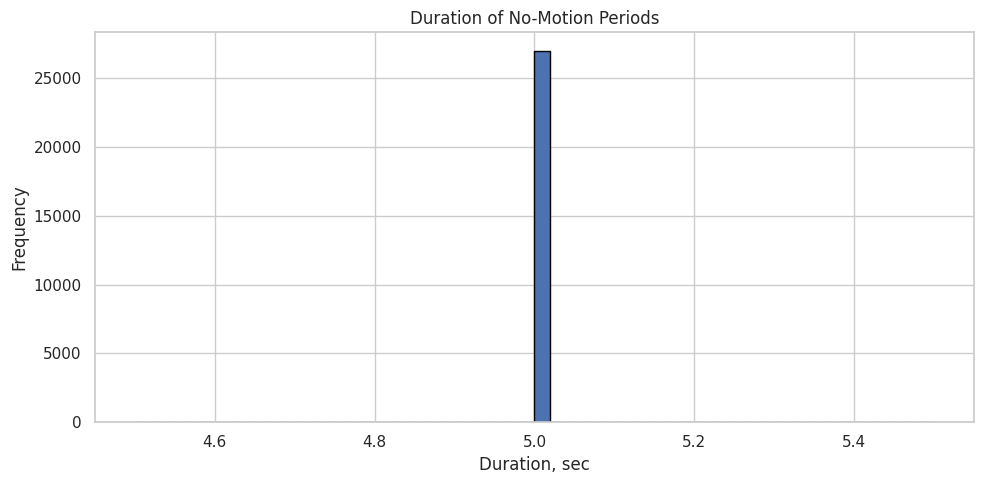

In [80]:
# Biểu đồ phân phối của step không chuyển động
plt.figure(figsize=(10, 5))

plt.hist(no_motion_periods.loc[:, 'duration_sec'],
         bins=50, edgecolor='black')
plt.xlabel('Duration, sec')
plt.ylabel('Frequency')
plt.title('Duration of No-Motion Periods')

plt.tight_layout()
plt.show()

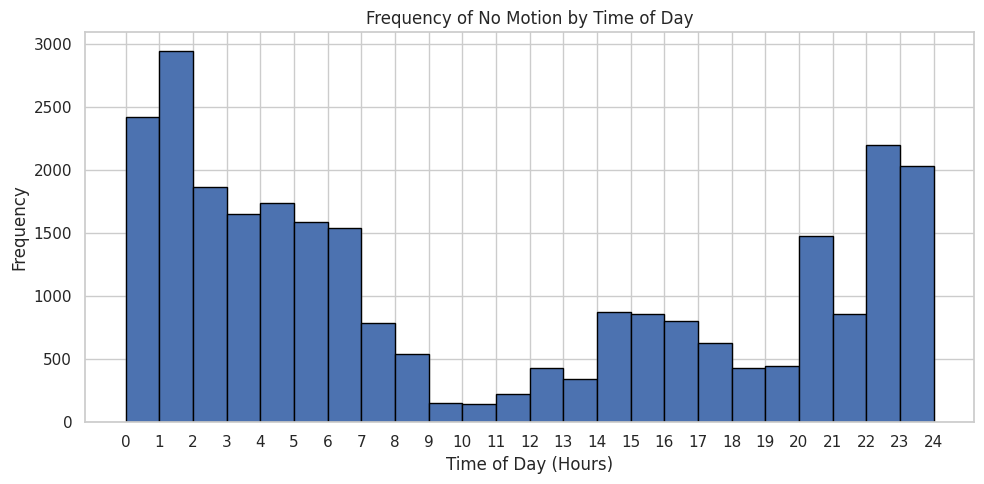

In [81]:
# Phân phối của các step không chuyển động theo thời gian trong ngày
plt.figure(figsize=(10, 5))
plt.hist(worn_data[no_motion]['time_of_day_hours'],
         bins=24, range=(0, 24), edgecolor='black')
plt.title('Frequency of No Motion by Time of Day')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Frequency')
plt.xticks(range(0, 25))
plt.tight_layout()
plt.show()

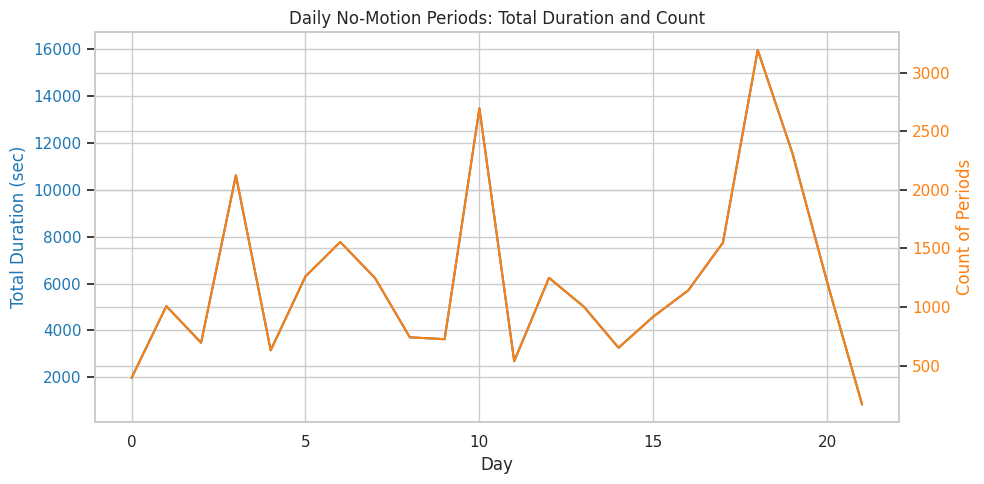

In [82]:
# Sự ổn định của thời gian không chuyển động qua các ngày
no_motion_periods['day'] = no_motion_periods['min'].astype(int)

daily_stats = no_motion_periods.groupby(no_motion_periods['day']) \
    .agg(total_duration=('duration_sec', 'sum'),
         count_periods=('duration_sec', 'size'))


fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Duration (sec)', color=color)
ax1.plot(daily_stats.index, daily_stats['total_duration'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Count of Periods', color=color)
ax2.plot(daily_stats.index, daily_stats['count_periods'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Daily No-Motion Periods: Total Duration and Count')
fig.tight_layout()
plt.show()

Để xử lý sự khác biệt về thời gian đeo thiết bị giữa các người tham gia, cần tính các giá trị tương đối bằng cách chuẩn hóa dữ liệu theo tổng thời gian đeo thiết bị:  
**- Tổng thời gian không chuyển động mỗi ngày**  
**- Số lần không chuyển động mỗi ngày**

In [83]:
# Feature Engineering
features = daily_stats[['total_duration', 'count_periods']].agg(
    ['median', 'max', 'std']
).T.unstack().to_frame().T

features.columns = ['_'.join(col) for col in features.columns]

features

median_total_duration  median_count_periods  max_total_duration  \
0                 5370.0                1074.0             15970.0   

   max_count_periods  std_total_duration  std_count_periods  
0             3194.0         3807.159189         761.431838

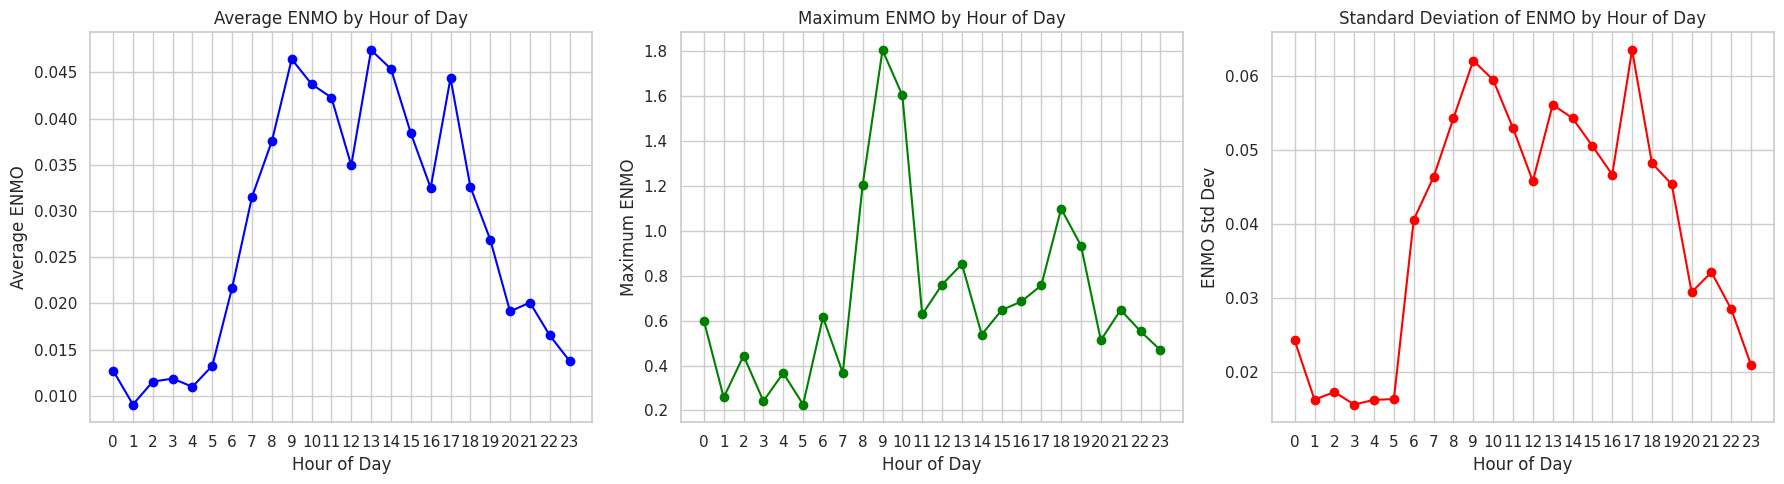

In [84]:
# Phân tích nhịp sinh học dựa vào ENMO 
hourly_activity = worn_data.groupby(
    worn_data['time_of_day_hours'].astype(int)
)['enmo'].agg(['mean', 'max', 'std'])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# average ENMO
axes[0].plot(hourly_activity.index, hourly_activity['mean'], marker='o', color='blue')
axes[0].set_xticks(hourly_activity.index)
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average ENMO')
axes[0].set_title('Average ENMO by Hour of Day')
axes[0].grid(True)

# maximum ENMO
axes[1].plot(hourly_activity.index, hourly_activity['max'], marker='o', color='green')
axes[1].set_xticks(hourly_activity.index)
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Maximum ENMO')
axes[1].set_title('Maximum ENMO by Hour of Day')
axes[1].grid(True)

# standard deviation of ENMO
axes[2].plot(hourly_activity.index, hourly_activity['std'], marker='o', color='red')
axes[2].set_xticks(hourly_activity.index)
axes[2].set_xlabel('Hour of Day')
axes[2].set_ylabel('ENMO Std Dev')
axes[2].set_title('Standard Deviation of ENMO by Hour of Day')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Có thể lấy thời gian ngủ và dậy để làm feature  
Các đặc trưng:  
-**Độ lệch chuẩn của các giá trị trung bình hàng giờ mỗi ngày**: Biểu thị sự khác biệt giữa các giờ trong ngày.  
-**Giờ có hoạt động cao nhất**: Xác định giờ mà hoạt động đạt mức cao nhất  
-**Entropy**: Mức độ phân bố đều của hoạt động trong suốt một ngày  
Có thể giúp xác định các mẫu hoạt động bất thường, chẳng hạn như thiếu ngủ (low night entropy) hoặc hoạt động ban ngày quá ít (low day std_across_hours)

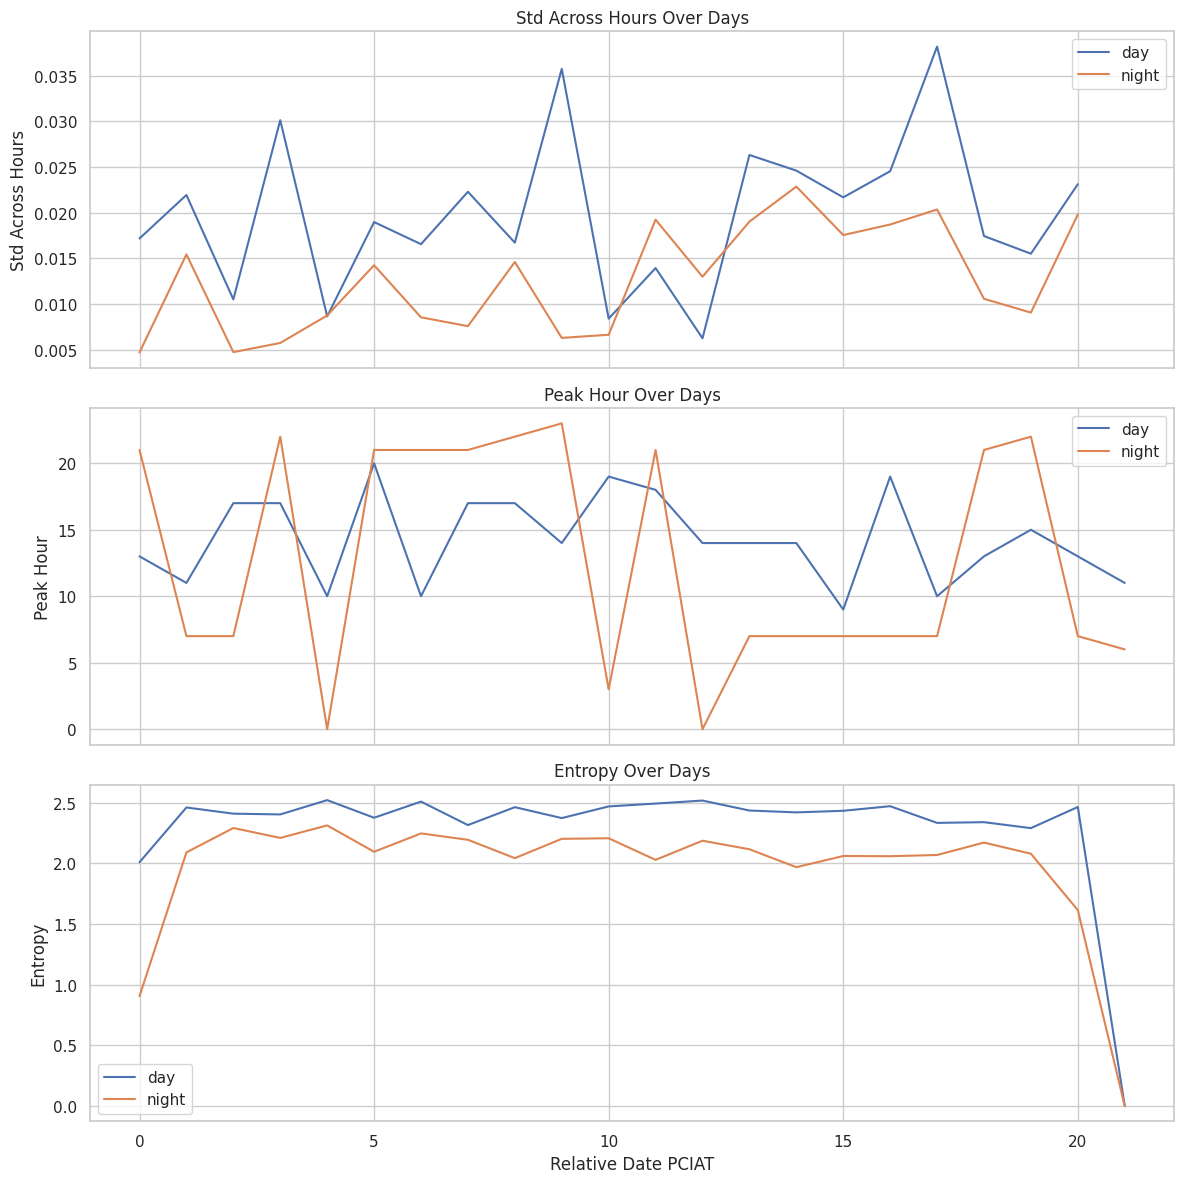

In [85]:
# Feature Engineering
hourly_activity = worn_data.groupby(
    [worn_data['relative_date_PCIAT'].astype(int),
     worn_data['time_of_day_hours'].astype(int),
     worn_data['day_period']]
)['enmo'].agg(['mean', 'max'])

features = hourly_activity['mean'].groupby(
    ['relative_date_PCIAT', 'day_period']
).agg(
    std_across_hours='std',
    peak_hour=lambda x: x.idxmax()[1],
    entropy=lambda x: -(x / x.sum() * np.log(x / x.sum() + 1e-9)).sum()
)

fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot std_across_hours
for period in ['day', 'night']:
    subset = features.xs(period, level='day_period')
    axes[0].plot(subset.index, subset['std_across_hours'], label=period)

axes[0].set_title('Std Across Hours Over Days')
axes[0].set_ylabel('Std Across Hours')
axes[0].legend()

# Plot peak_hour
for period in ['day', 'night']:
    subset = features.xs(period, level='day_period')
    axes[1].plot(subset.index, subset['peak_hour'], label=period)

axes[1].set_title('Peak Hour Over Days')
axes[1].set_ylabel('Peak Hour')
axes[1].legend()

# Plot entropy
for period in ['day', 'night']:
    subset = features.xs(period, level='day_period')
    axes[2].plot(subset.index, subset['entropy'], label=period)

axes[2].set_title('Entropy Over Days')
axes[2].set_xlabel('Relative Date PCIAT')
axes[2].set_ylabel('Entropy')
axes[2].legend()

plt.tight_layout()
plt.show()

Độ lệch chuẩn hàng giờ cao hơn vào ban ngày (biểu thị sự thay đổi lớn hơn trong hoạt động ban ngày)  
Giờ cao điểm ban ngày thay đổi nhiều, trong khi ban đêm chủ yếu tập trung vào buổi tối hoặc sáng sớm  
Entropy cao hơn vào ban ngày, cho thấy hoạt động trong ngày phân bố đồng đều hơn  

In [86]:
day_features = features.xs('day', level='day_period').agg(
    ['median', 'max', 'std']
).stack().to_frame().T
day_features.columns = [
    f'{stat}_{feature}_day' for stat, feature in day_features.columns
]

night_features = features.xs('night', level='day_period').agg(
    ['median', 'max', 'std']
).stack().to_frame().T
night_features.columns = [
    f'{stat}_{feature}_night' for stat, feature in night_features.columns
]

features = pd.concat([day_features, night_features], axis=1)
features

median_std_across_hours_day  median_peak_hour_day  median_entropy_day  \
0                     0.018957                  14.0            2.427315   

   max_std_across_hours_day  max_peak_hour_day  max_entropy_day  \
0                  0.038165               20.0         2.521818   

   std_std_across_hours_day  std_peak_hour_day  std_entropy_day  \
0                  0.008431           3.314993         0.524584   

   median_std_across_hours_night  median_peak_hour_night  \
0                       0.012979                     7.0   

   median_entropy_night  max_std_across_hours_night  max_peak_hour_night  \
0              2.093383                    0.022844                 23.0   

   max_entropy_night  std_std_across_hours_night  std_peak_hour_night  \
0           2.313267                     0.00591             8.452567   

   std_entropy_night  
0           0.527509

Phân tích hoạt động thể chất cường độ vừa đến mạnh (MVPA - Moderate to Vigorous Physical Activity) dựa trên ngưỡng giá trị ENMO.  
Tính toán thời gian của các khoảng thời gian MVPA được phát hiện (MVPA bouts)  
ENMO là chỉ số đo mức độ chuyển động. Một giá trị ENMO cao hơn một ngưỡng nhất định được coi là hoạt động thể chất cường độ vừa đến mạnh.  
Một MVPA bout là một khoảng thời gian liên tục mà giá trị ENMO duy trì trên ngưỡng.  
Đôi khi có khoảng thời gian ngắn bị xuống dưới ngưỡng (có thể do nhiễu) --> Smooothing: Cho phép một khoảng gián đoạn ngắn không phá vỡ bout liên tục

/tmp/ipykernel_30/4248514620.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worn_data['is_mvpa'] = worn_data['enmo'] > mvpa_threshold
/tmp/ipykernel_30/4248514620.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worn_data['mvpa_merged_group'] = merge_mvpa_groups(worn_data)


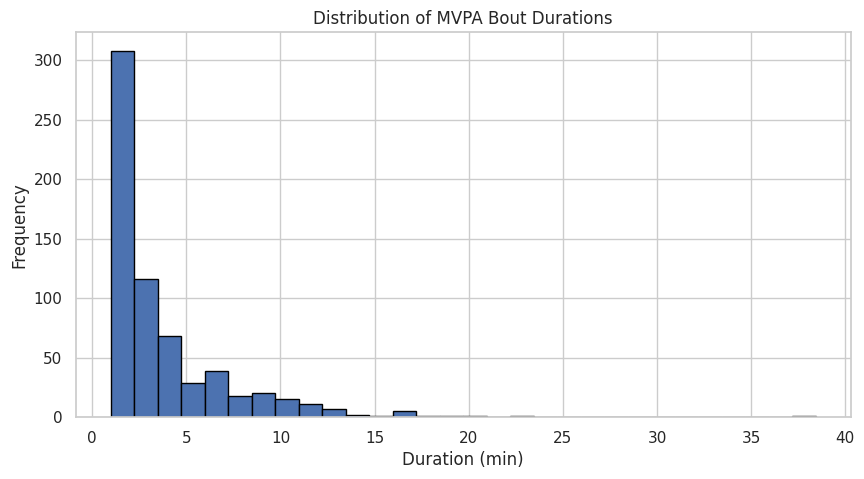

In [87]:
# Xử lý

mvpa_threshold = 0.1
merge_gap = 60

# B1: Xác định các khoảng MVPA đơn lẻ
# B2: Xem giữa khoảng cách giữa các khoảng đang có (nếu < merge_gap = 60) --> merge
# B3: Loại bỏ các đoạn nhỏ hơn allowed_gap

def merge_mvpa_groups(df, allowed_gap=60, merge_gap=60):
    last_mvpa_time = df['day_time'].where(df['is_mvpa']).ffill().shift()
    
    mvpa_time_diff = (
        (df['day_time'] - last_mvpa_time) * 86400
    ).round(0)
    
    mvpa_group = (
        (df['is_mvpa'] != df['is_mvpa'].shift()) |
        (df['time_diff'] >= allowed_gap)
    ).cumsum()
    
    is_mvpa_start = (
        (mvpa_group != mvpa_group.shift()) &
        df['is_mvpa']
    )
    
    group_increment = is_mvpa_start & (
        (mvpa_time_diff >= merge_gap) | last_mvpa_time.isnull()
    )
    
    merged_group = group_increment.cumsum()
    merged_group.loc[~df['is_mvpa']] = np.nan
    
    return merged_group

worn_data['is_mvpa'] = worn_data['enmo'] > mvpa_threshold
worn_data['mvpa_merged_group'] = merge_mvpa_groups(worn_data)

mvpa_periods = worn_data[
    worn_data['is_mvpa']
].groupby('mvpa_merged_group')['day_time'].agg(['min', 'max'])

mvpa_periods['duration_sec'] = (
    mvpa_periods['max'] - mvpa_periods['min']
) * 86400  # days to seconds

mvpa_periods = mvpa_periods[mvpa_periods['duration_sec'] >= 60]
mvpa_periods['duration_min'] = mvpa_periods['duration_sec'] / 60

mvpa_periods.sort_values(by='duration_sec')

plt.figure(figsize=(10, 5))
plt.hist(mvpa_periods['duration_min'], bins=30, edgecolor='black')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of MVPA Bout Durations')
plt.show()

In [88]:
# Thống kê
summary_stats = mvpa_periods['duration_min'].describe()

short_mvpa_count = mvpa_periods[mvpa_periods['duration_min'] < 10].shape[0]
long_mvpa_count = mvpa_periods[mvpa_periods['duration_min'] >= 10].shape[0]

print(f"Summary Statistics:\n{summary_stats}\n")
print(f"Short MVPA periods (< 10 min): {short_mvpa_count}")
print(f"Long MVPA periods (>= 10 min): {long_mvpa_count}")

Summary Statistics:
count    644.000000
mean       3.740813
std        3.583536
min        1.000000
25%        1.500000
50%        2.250000
75%        4.520833
max       38.416667
Name: duration_min, dtype: float64

Short MVPA periods (< 10 min): 602
Long MVPA periods (>= 10 min): 42


Đa số là nhỏ hơn 10 phút  
Có thể lấy **số lượng MVPA periods** và **thời gian** của chúng làm feature

/tmp/ipykernel_30/3781595145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worn_data.drop(['is_mvpa', 'mvpa_merged_group'], axis=1, inplace=True)


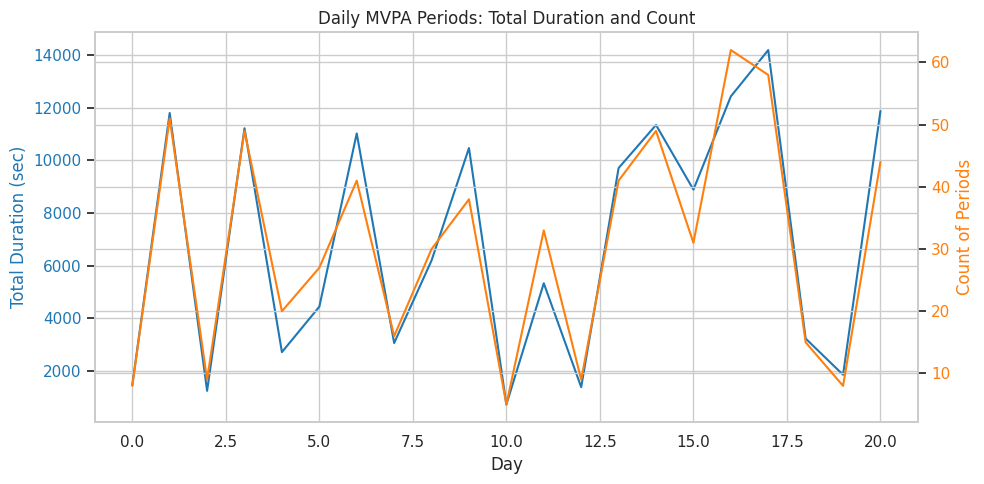

In [89]:
worn_data.drop(['is_mvpa', 'mvpa_merged_group'], axis=1, inplace=True)
mvpa_periods['day'] = mvpa_periods['min'].astype(int)

daily_stats = mvpa_periods.groupby(mvpa_periods['day']) \
    .agg(total_duration=('duration_sec', 'sum'),
         count_periods=('duration_sec', 'size'))


fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Duration (sec)', color=color)
ax1.plot(daily_stats.index, daily_stats['total_duration'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Count of Periods', color=color)
ax2.plot(daily_stats.index, daily_stats['count_periods'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Daily MVPA Periods: Total Duration and Count')
fig.tight_layout()
plt.show()

Qua đồ thị có thể thấy **lượng thời gian** và **số lượng MVPA periods** có mối tương quan chặt chẻ  
--> có thể chỉ giữ 1 trong 2

In [90]:
# Feature Engineering
features = daily_stats[['total_duration', 'count_periods']].agg(
    ['median', 'max', 'std']
).T.unstack().to_frame().T

features.columns = ['_'.join(col) for col in features.columns]

features

median_total_duration  median_count_periods  max_total_duration  \
0                 6195.0                  31.0             14185.0   

   max_count_periods  std_total_duration  std_count_periods  
0               62.0         4595.596935          17.998148

In [91]:
# Sự chuyển đổi giữa các mức độ hoạt động (low, moderate, vigorous) (đang bị lỗi gì đó)
mvpa_threshold = 0.1
vig_threshold = 0.5

worn_data['activity_type'] = pd.cut(
    worn_data['enmo'],
    bins=[-np.inf, mvpa_threshold, vig_threshold, np.inf],
    labels=['low', 'moderate', 'vigorous']
)
activity_group = (
        (worn_data['activity_type'] != worn_data['activity_type'].shift()) |
        (worn_data['measurement_after_gap'])
).cumsum()

activity_periods = worn_data.groupby(activity_group).agg(
    min=('day_time', 'min'),
    max=('day_time', 'max'),
    activity_type=('activity_type', 'first')
)
activity_periods['duration_sec'] = (
    activity_periods['max'] - activity_periods['min']
) * 86400 + 5 

activity_periods = activity_periods[activity_periods['duration_sec'] >= 60]
activity_periods['duration_min'] = activity_periods['duration_sec'] / 60

activity_periods['day'] = activity_periods['min'].astype(int)
activity_periods['transition_num'] = (
    activity_periods.groupby('day')['activity_type']
    .apply(lambda x: (x != x.shift()).cumsum())
    .reset_index(level=0, drop=True)
)

activity_periods.sort_values(by='duration_sec')

/tmp/ipykernel_30/2886106693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worn_data['activity_type'] = pd.cut(


Empty DataFrame
Columns: [min, max, activity_type, duration_sec, duration_min, day, transition_num]
Index: []

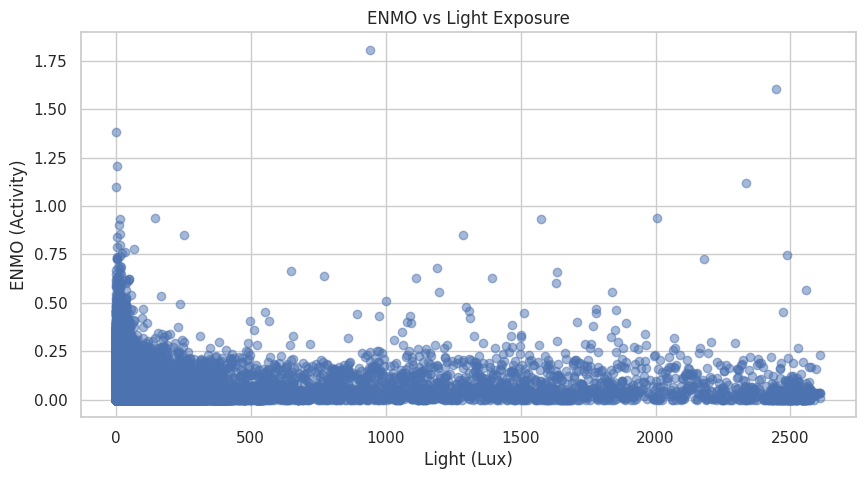

Correlation between Light and ENMO: 0.08162742029178845


In [92]:
# Phân tích sự thay đổi của ENMO theo mức độ tiếp xúc ánh sáng
plt.figure(figsize=(10, 5))
plt.scatter(worn_data['light'], worn_data['enmo'], alpha=0.5)
plt.xlabel('Light (Lux)')
plt.ylabel('ENMO (Activity)')
plt.title('ENMO vs Light Exposure')
plt.show()

correlation_light_enmo = worn_data[['light', 'enmo']].corr().iloc[0, 1]
print(f"Correlation between Light and ENMO: {correlation_light_enmo}")

Tương quan rất nhỏ  
Lượng sáng cao cùng ENMO cao là hợp lý --> sẽ đem lại thông tin rằng hoạt động nhiều  
Tuy nhiên đa số lượng sáng thu được rất nhỏ (đã tính ở các đoạn phân tích trước)

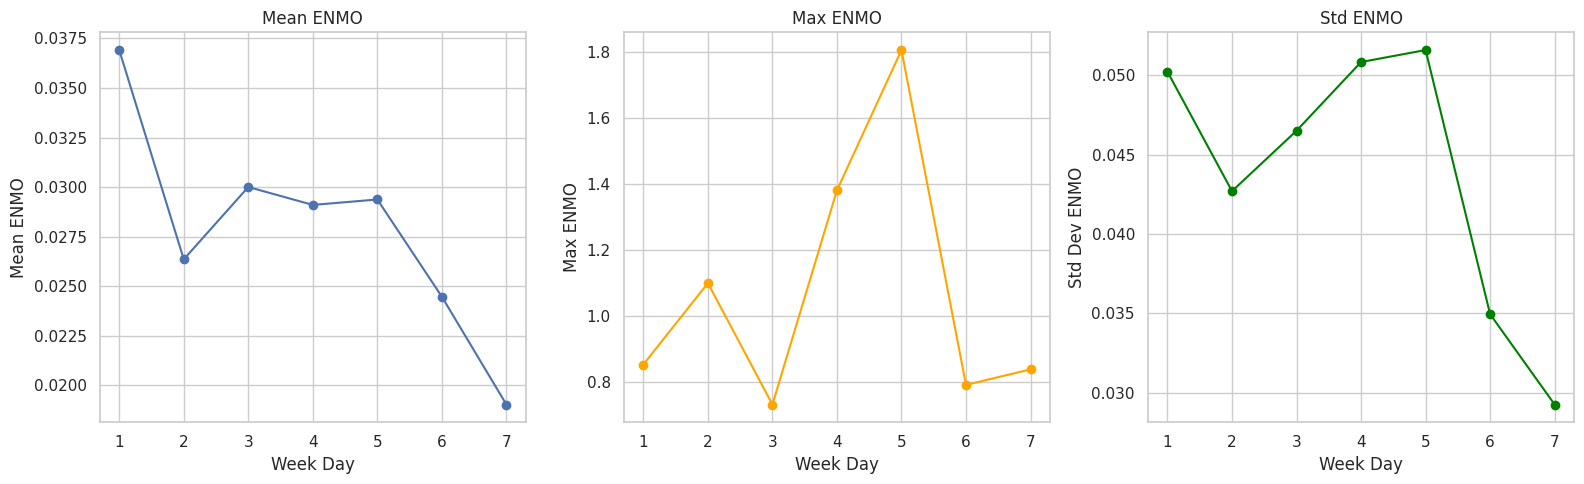

In [93]:
# Phân tích hoạt động theo mùa và theo tuần
daily_activity = worn_data.groupby('weekday')['enmo'].agg(['mean', 'max', 'std', 'count'])

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(daily_activity.index, daily_activity['mean'], marker='o')
plt.title('Mean ENMO')
plt.xlabel('Week Day')
plt.ylabel('Mean ENMO')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(daily_activity.index, daily_activity['max'], marker='o', color='orange')
plt.title('Max ENMO')
plt.xlabel('Week Day')
plt.ylabel('Max ENMO')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(daily_activity.index, daily_activity['std'], marker='o', color='green')
plt.title('Std ENMO')
plt.xlabel('Week Day')
plt.ylabel('Std Dev ENMO')
plt.grid(True)

plt.tight_layout()
plt.show()

hoạt động giảm vào cuối tuần:)) (khá khó hiểu

In [94]:
daily_activity = daily_activity.reset_index()
daily_activity.columns = ['Weekday', 'Mean ENMO', 'Max ENMO', 'Std ENMO', 'Count']
daily_activity

Weekday  Mean ENMO  Max ENMO  Std ENMO  Count
0        1   0.036917  0.852396  0.050229  49321
1        2   0.026361  1.099253  0.042704  42279
2        3   0.030010  0.731013  0.046513  51840
3        4   0.029106  1.380727  0.050841  51840
4        5   0.029379  1.806151  0.051595  51840
5        6   0.024476  0.790583  0.034952  51840
6        7   0.019038  0.837640  0.029261  51840

/tmp/ipykernel_30/856177057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worn_data['week'] = worn_data['relative_date_PCIAT'] // 7


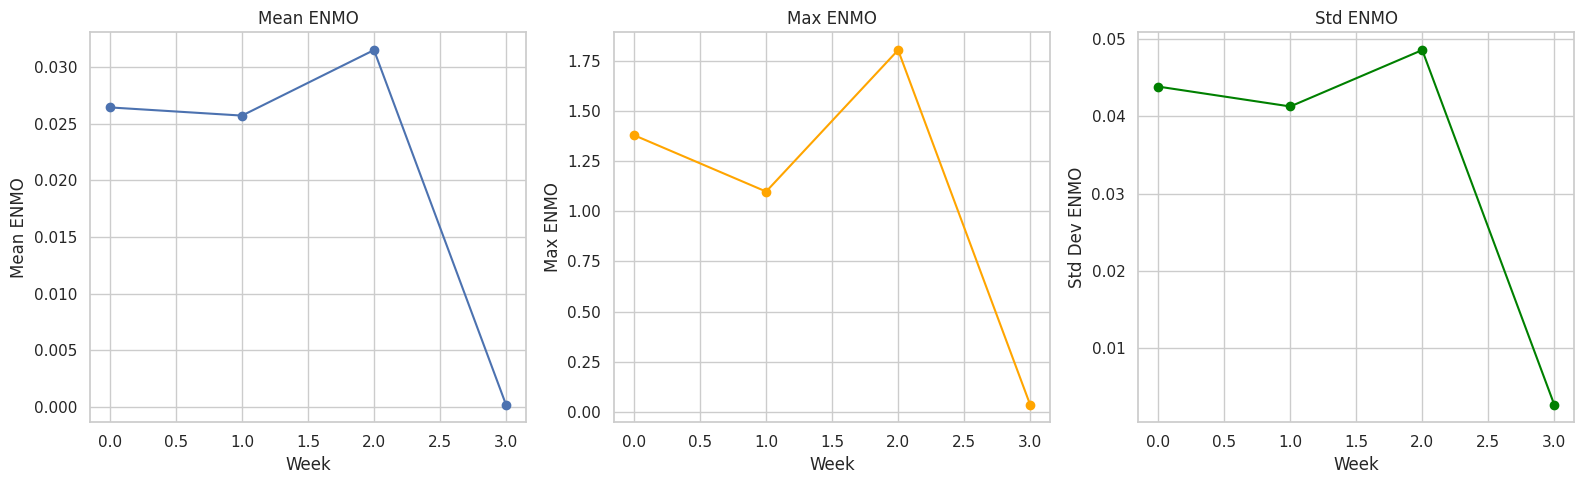

In [95]:
## By WEEK
worn_data['week'] = worn_data['relative_date_PCIAT'] // 7
weekly_activity = worn_data.groupby('week')['enmo'].agg(['mean', 'max', 'std', 'count'])

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(weekly_activity.index, weekly_activity['mean'], marker='o')
plt.title('Mean ENMO')
plt.xlabel('Week')
plt.ylabel('Mean ENMO')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(weekly_activity.index, weekly_activity['max'], marker='o', color='orange')
plt.title('Max ENMO')
plt.xlabel('Week')
plt.ylabel('Max ENMO')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(weekly_activity.index, weekly_activity['std'], marker='o', color='green')
plt.title('Std ENMO')
plt.xlabel('Week')
plt.ylabel('Std Dev ENMO')
plt.grid(True)

plt.tight_layout()
plt.show()

In [96]:
weekly_activity = weekly_activity.reset_index()
weekly_activity.columns = ['Week', 'Mean ENMO', 'Max ENMO', 'Std ENMO', 'Count']
weekly_activity

Week  Mean ENMO  Max ENMO  Std ENMO   Count
0   0.0   0.026426  1.380727  0.043863  112116
1   1.0   0.025706  1.099253  0.041286  120061
2   2.0   0.031487  1.806151  0.048600  118441
3   3.0   0.000216  0.035519  0.002639     182

In [97]:
season_activity = worn_data.groupby('quarter')['enmo'].agg(['mean', 'max', 'std', 'count'])
season_activity = season_activity.reset_index()
season_activity.columns = ['Season', 'Mean ENMO', 'Max ENMO', 'Std ENMO', 'Count']
season_activity

Season  Mean ENMO  Max ENMO  Std ENMO   Count
0       1   0.027875  1.806151  0.044753  350800